Dataset Link:
https://drive.google.com/drive/folders/1x3d-azCHR9dvFkjN7jiHEaexF_Z7BSft

test Images Link:
https://drive.google.com/drive/folders/1ceIdoHmJKZriDhU3dFy5bUJLuDRPpY31

CSV file:
https://drive.google.com/drive/folders/1foFiKd85qc3u4h64XC2jdZzw7nbjO8pb# New Section

# Importing Libraries

In [ ]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical variables
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer from NLTK for text preprocessing
from nltk.corpus import stopwords  # Import stopwords from NLTK for text preprocessing
from nltk import word_tokenize  # Import word_tokenize from NLTK for tokenization
import re  # Import the 're' module for regular expressions
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for text vectorization
import warnings  # Import the 'warnings' module to suppress warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

# Loading and Exploring the Dataset

In [ ]:
# Load the dataset
# This dataset is from Kaggle: "https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset"
#df = pd.read_csv('styles.csv', error_bad_lines=False, warn_bad_lines=False)

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path_styles = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/styles.csv'
path_images = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/images2'

In [ ]:
df = pd.read_csv(path_styles,error_bad_lines=False,warn_bad_lines=False)


In [ ]:
# Display the first few rows of the dataset
df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

Let's have a look at input variables

1. **id**: A unique identifier for each product.

2. **gender**: The gender category to which the product is marketed, such as Men, Women, Boys, Girls, or Unisex.

3. **masterCategory**: The broad category to which the product belongs, such as Apparel, Accessories, Footwear, Personal Care, or Innerwear.

4. **subCategory**: A more specific category within the master category, indicating the type of product, e.g., Topwear, Bottomwear, Watches, Shoes, etc.

5. **articleType**: The specific type or style of the product, such as Shirts, Jeans, Handbags, Flip Flops, etc.

6. **baseColour**: The primary color of the product.

7. **season**: The season for which the product is suitable, e.g., Fall, Summer, Winter, Spring.

8. **year**: The year in which the product was released or made available.

9. **usage**: The intended usage or purpose of the product, such as Casual, Formal, Sports, Ethnic, etc.

10. **productDisplayName**: The name or display label of the product.



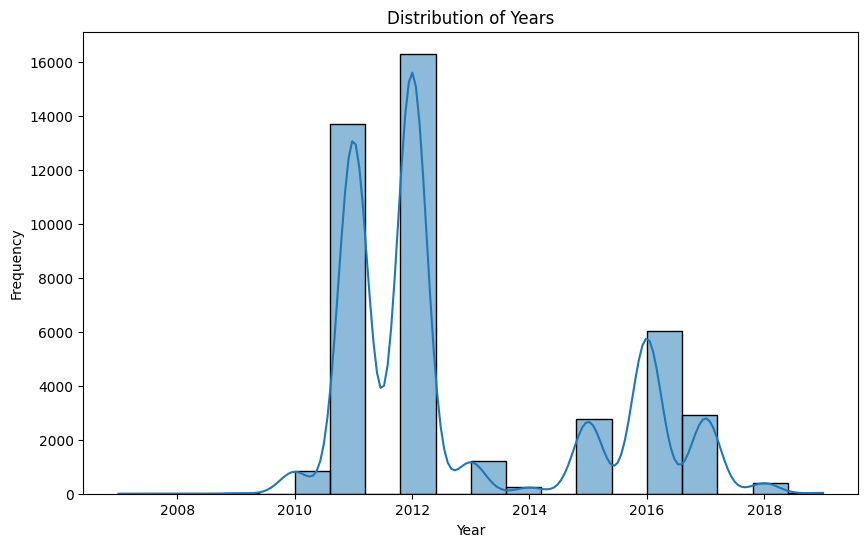

In [ ]:
# Visualize the distribution of 'year'
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=20, kde=True)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

In [ ]:
# Explore the 'season' column
season_counts = df['season'].value_counts()
print("Season Counts:")
print(season_counts)

# Data Cleaning and Preprocessing

In [ ]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
# Get the shape of the dataset
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(44424, 10)


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [ ]:
# Remove rows with missing values in specific columns
df = df.dropna(subset=['baseColour', 'season', 'usage', 'productDisplayName'])

In [ ]:
# Check for missing values again
print("Missing Values after dropping rows:")
print(df.isnull().sum())

Missing Values after dropping rows:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [ ]:
# Convert the 'year' column to integer type
#df['year'] = df['year'].astype('int')
#remove missing values

styles_df = df.dropna(subset=['baseColour','season','usage','productDisplayName'])

In [ ]:
# Display column names
print("Column Names:")
print(df.columns)

Column Names:
Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [ ]:
# Get the number of unique values in each column
print("Number of Unique Values in Each Column:")
print(df.nunique())

Number of Unique Values in Each Column:
id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64


In [ ]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Gender and Season Analysis

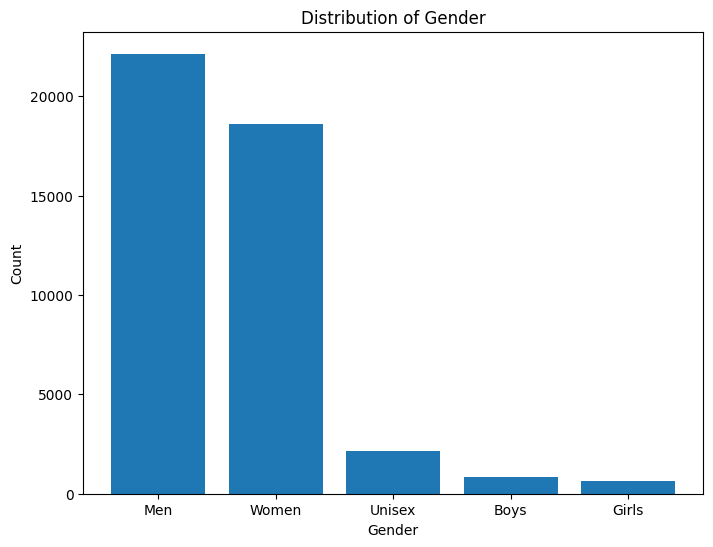

In [ ]:
# Visualize the gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

### INSIGHTS on Gender and Seasonal Analysis
1. Gender count iindicatesompare to women , girls and boys this indicate that men orirnted products are highly available.
2. Seasonal and Gender Graph : The countplot shows how different seasons (e.g., Spring, Summer, Fall, Winter) are distributed among different genders
3. We can interprete that during summer, males preferences are hight . It helps to take decision that summer trends and fashion can be increaed to increase threlated. Like Cotton Shirts, T shirts and son on.
4. Below bargarphs related to subcategories ansalysis on gender and usage, we can interprete that casuals are purchaced more. hence causual can wear can be increased.
5. Mens casual wear is more in summer.
6. women's Topwear and casual are high in summer and also in 2010,2012.
7. Women wrist watches are elevated in the year 2012
8. For both men and women yearwise trens shows that topwear is more in the year between 2010-2012

In [ ]:
# Filter data for men and women
men = df[df['gender'] == 'Men']
women = df[df['gender'] == 'Women']

# Visualizing Subcategory Trends

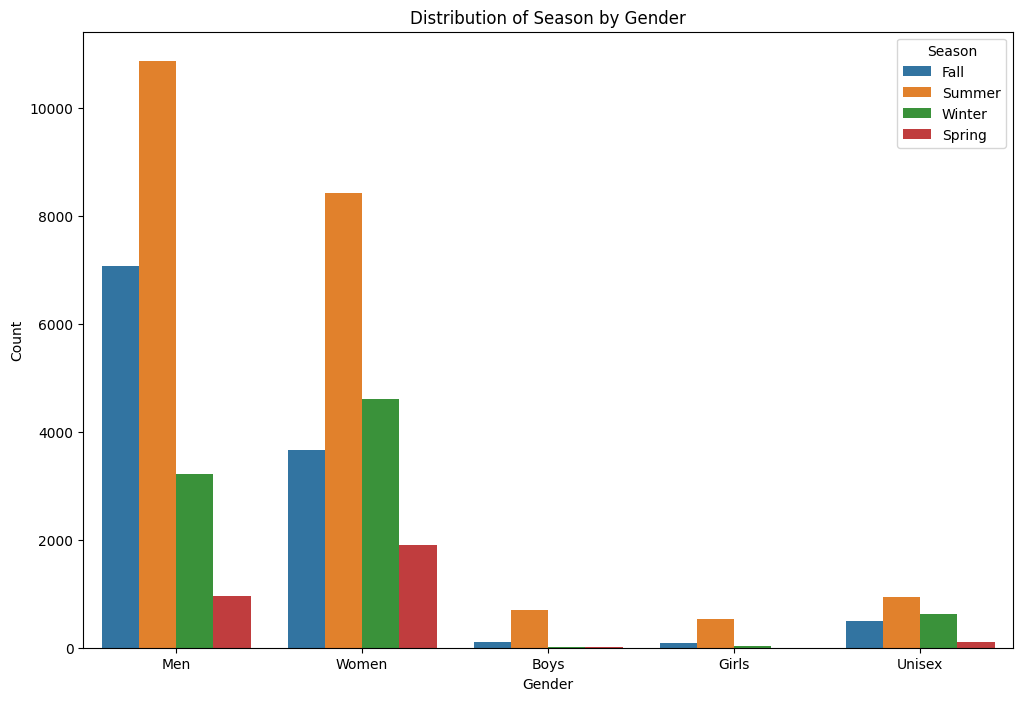

In [ ]:
# Explore the distribution of 'season' within each gender
plt.figure(figsize=(12, 8))
sns.countplot(x='gender', data=df, hue='season')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Season by Gender')
plt.legend(title='Season')
plt.show()

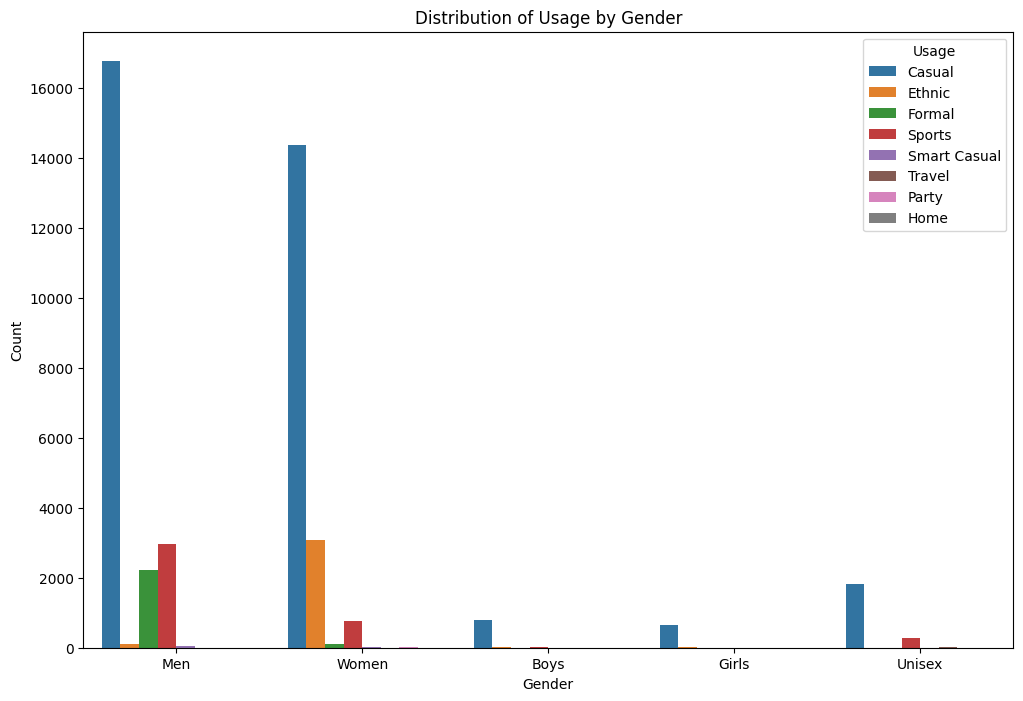

In [ ]:
# Explore the distribution of 'usage' within each gender
plt.figure(figsize=(12, 8))
sns.countplot(x='gender', data=df, hue='usage')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Usage by Gender')
plt.legend(title='Usage')
plt.show()

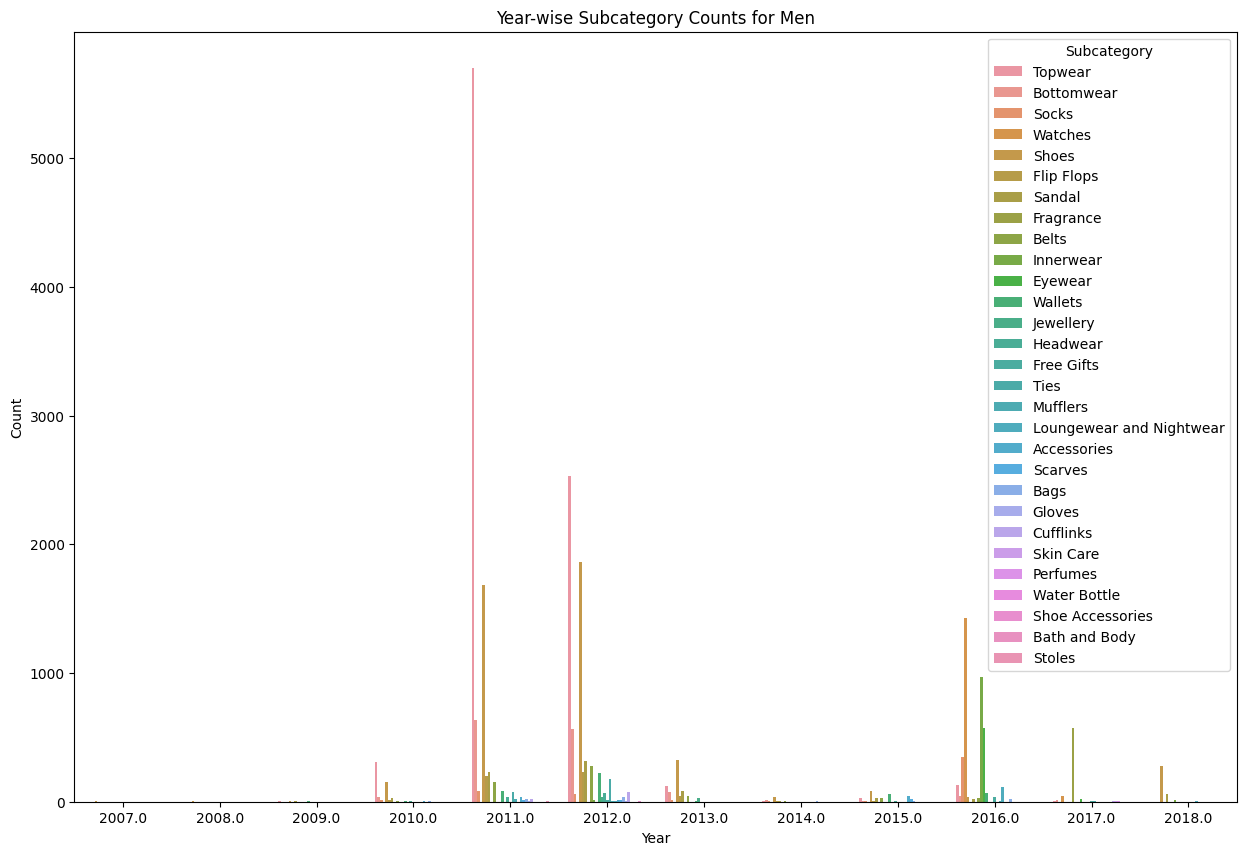

In [ ]:
# Plot year-wise subcategory counts for men
plt.figure(figsize=(15, 10))
sns.countplot(x='year', data=men, hue='subCategory')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Subcategory Counts for Men')
plt.legend(title='Subcategory')
plt.show()

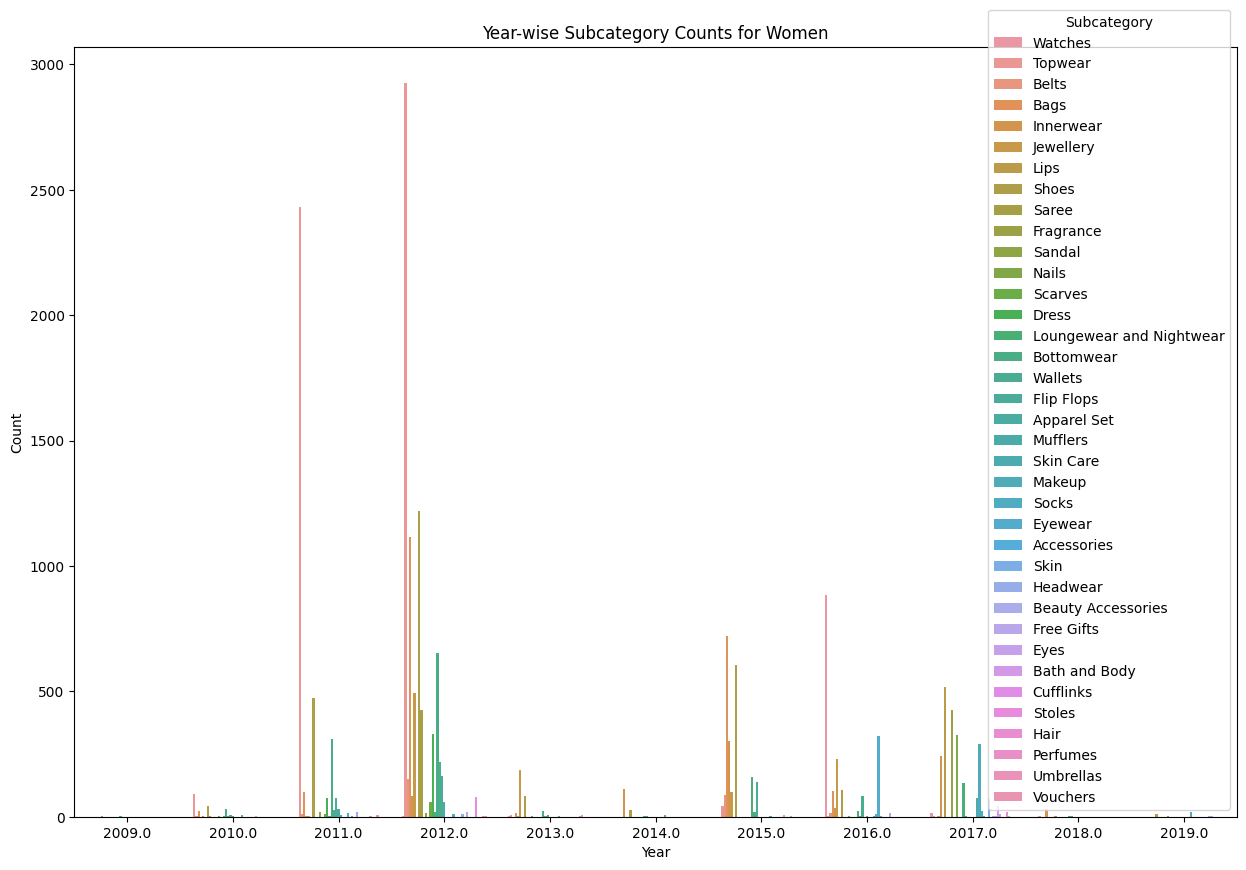

In [ ]:
# Plot year-wise subcategory counts for women
plt.figure(figsize=(15, 10))
sns.countplot(x='year', data=women, hue='subCategory')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Subcategory Counts for Women')
plt.legend(title='Subcategory')
plt.show()

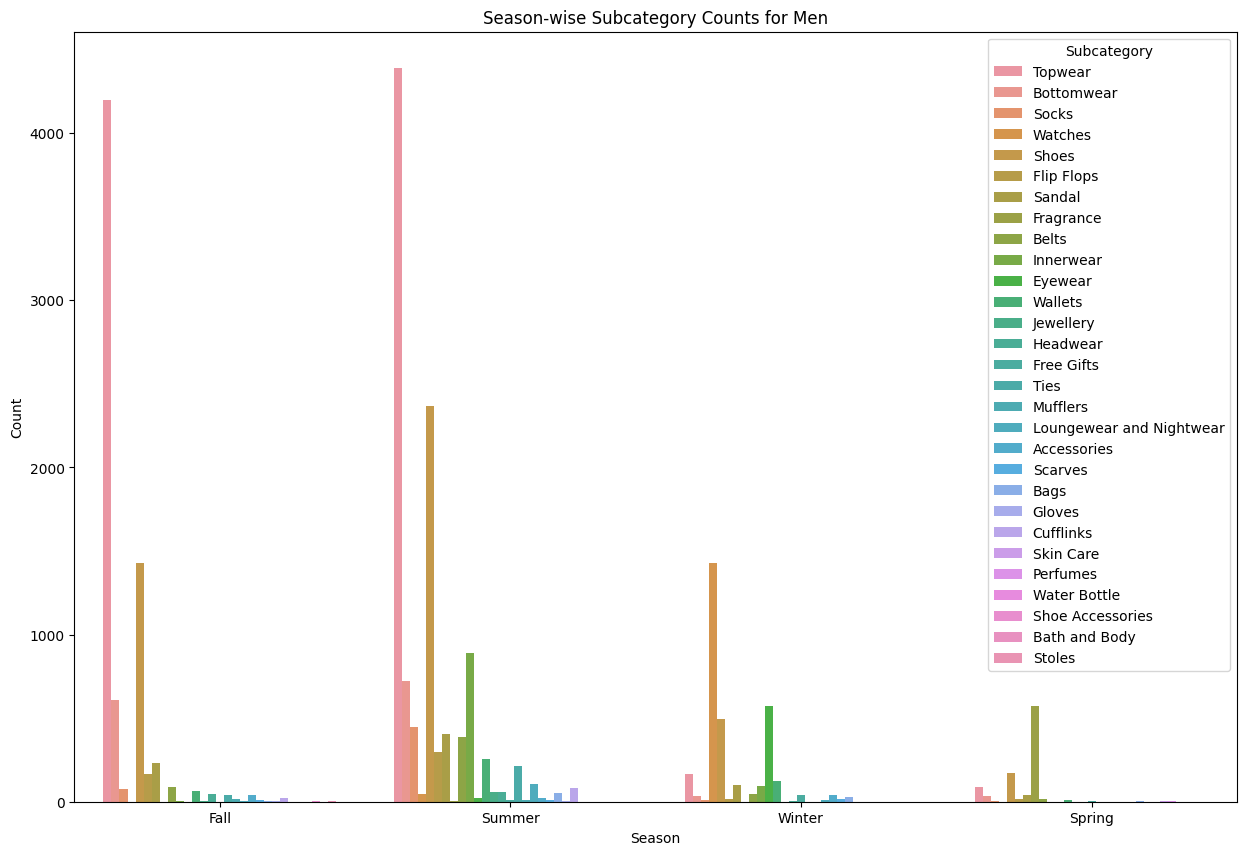

In [ ]:
# Plot season-wise subcategory counts for men
plt.figure(figsize=(15, 10))
sns.countplot(x='season', data=men, hue='subCategory')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season-wise Subcategory Counts for Men')
plt.legend(title='Subcategory')
plt.show()

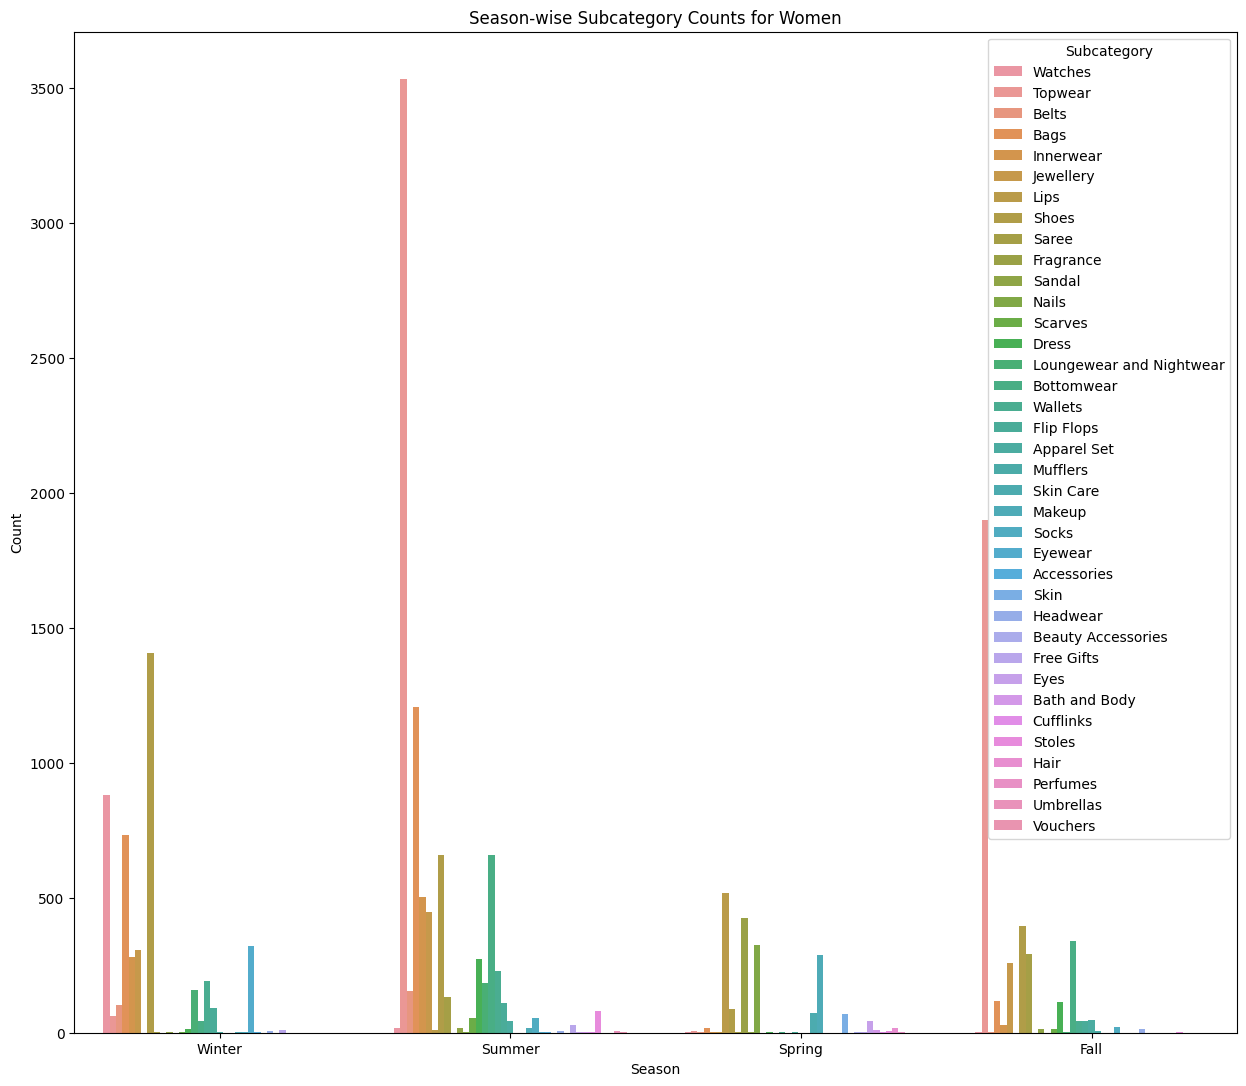

In [ ]:
# Plot season-wise subcategory counts for women
plt.figure(figsize=(15, 13))
sns.countplot(x='season', data=women, hue='subCategory')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season-wise Subcategory Counts for Women')
plt.legend(title='Subcategory')
plt.show()

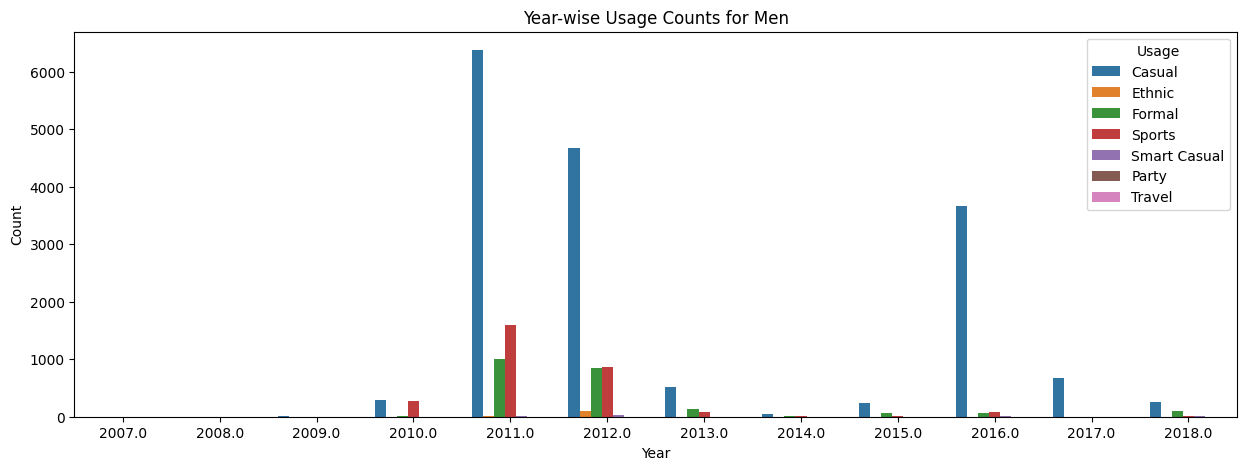

In [ ]:
# Plot year-wise usage counts for men
plt.figure(figsize=(15, 5))
sns.countplot(x='year', data=men, hue='usage')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Usage Counts for Men')
plt.legend(title='Usage')
plt.show()

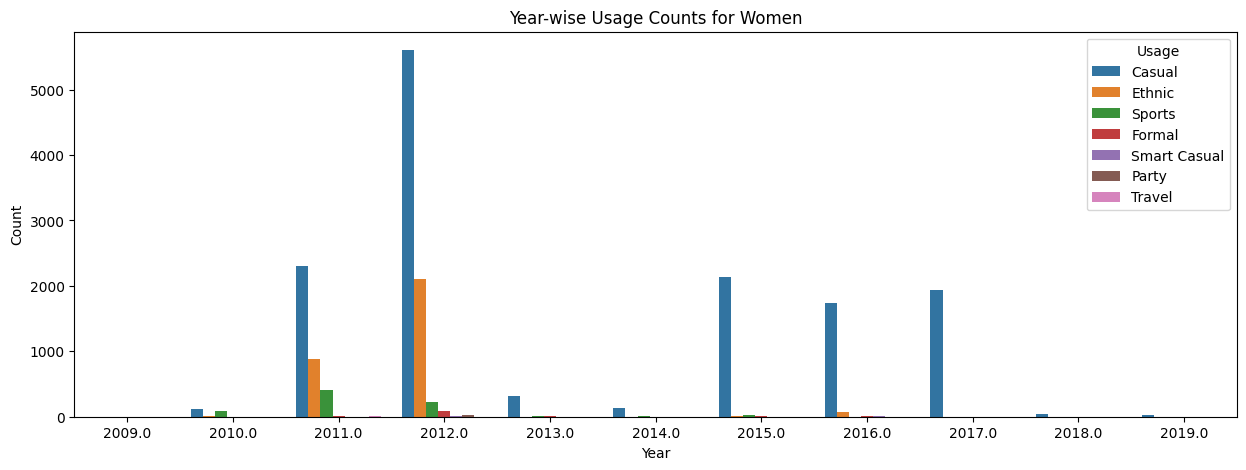

In [ ]:
# Plot year-wise usage counts for women
plt.figure(figsize=(15, 5))
sns.countplot(x='year', data=women, hue='usage')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Usage Counts for Women')
plt.legend(title='Usage')
plt.show()

In [ ]:
# Calculate top subcategories year-wise for men
men_subcategory_counts = men.groupby(['year', 'subCategory'])['id'].count().reset_index()
top_subcategories_yearwise_men = men_subcategory_counts.groupby('year').apply(lambda x: x.nlargest(5, 'id'))

In [ ]:
# Calculate top subcategories year-wise for women
women_subcategory_counts = women.groupby(['year', 'subCategory'])['id'].count().reset_index()
top_subcategories_yearwise_women = women_subcategory_counts.groupby('year').apply(lambda x: x.nlargest(5, 'id'))

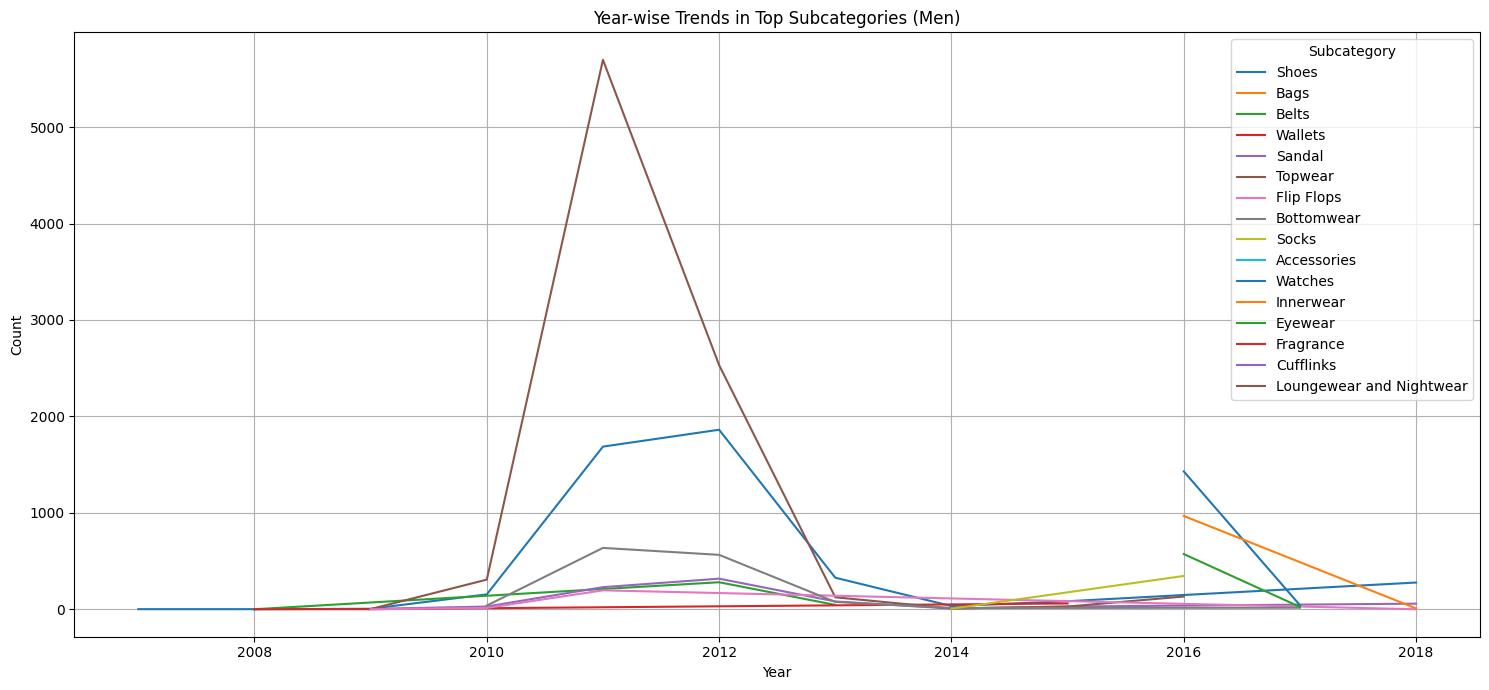

In [ ]:
# Plot year-wise trends for top subcategories for men
plt.figure(figsize=(15, 7))
for subcategory in top_subcategories_yearwise_men['subCategory'].unique():
    data = top_subcategories_yearwise_men[top_subcategories_yearwise_men['subCategory'] == subcategory]
    plt.plot(data['year'], data['id'], label=subcategory)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Trends in Top Subcategories (Men)')
plt.legend(title='Subcategory')
plt.grid(True)
plt.tight_layout()
plt.show()

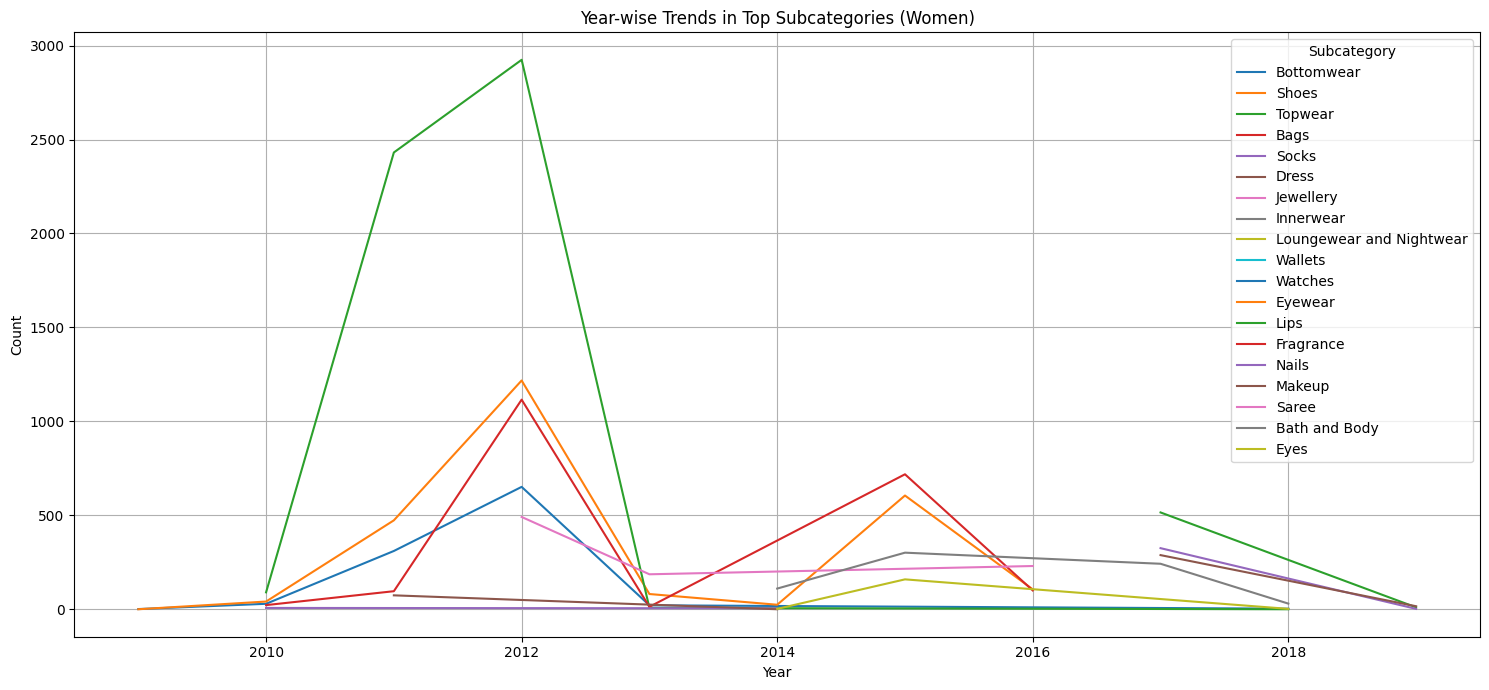

In [ ]:
# Plot year-wise trends for top subcategories for women
plt.figure(figsize=(15, 7))
for subcategory in top_subcategories_yearwise_women['subCategory'].unique():
    data = top_subcategories_yearwise_women[top_subcategories_yearwise_women['subCategory'] == subcategory]
    plt.plot(data['year'], data['id'], label=subcategory)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Trends in Top Subcategories (Women)')
plt.legend(title='Subcategory')
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Article Recommendation

In [ ]:
# Function to recommend seasonal articles
def recommend_seasonal_articles(df, target_season):
    recommended_articles = df[df['season'] == target_season]['articleType'].value_counts()[:10].index.tolist()
    return recommended_articles

In [ ]:
# Define the list of available seasons
available_seasons = ['Fall', 'Summer', 'Winter', 'Spring']

# Ask the user to define the target season, ensuring it's a valid choice
while True:
    target_season = input("Enter the target season (e.g., Summer, Winter, Fall, Spring): ")
    if target_season in available_seasons:
        break
    else:
        print("Invalid season. Please choose from:", available_seasons)

recommended_articles = recommend_seasonal_articles(df, target_season)
# Print the recommended articleTypes
print(f"Recommended articleTypes for {target_season}:")
for i, article in enumerate(recommended_articles, 1):
    print(f"{i}. {article}")

Enter the target season (e.g., Summer, Winter, Fall, Spring): Fall
Recommended articleTypes for Fall:
1. Tshirts
2. Shirts
3. Casual Shoes
4. Sports Shoes
5. Kurtas
6. Tops
7. Sarees
8. Sandals
9. Flip Flops
10. Sweatshirts


# Text Data Analysis and Clustering

In [ ]:
# Function to preprocess text data
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Removing punctuation and special characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Removing stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


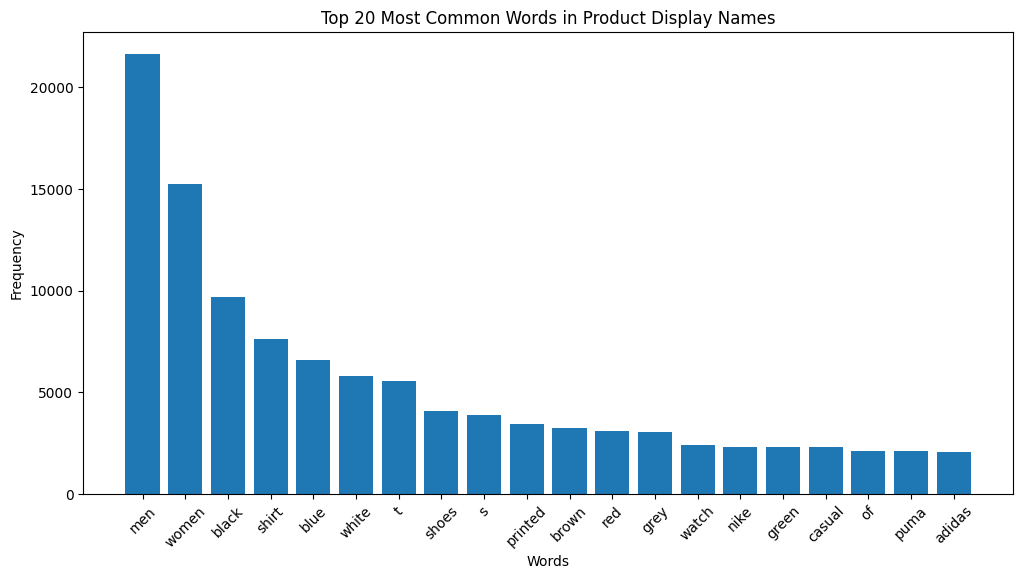

In [ ]:
import pandas as pd
import nltk
import re

# Assuming you have a DataFrame named 'df' with a 'productDisplayName' column

# Remove NaN values from the 'productDisplayName' column
df1 = df.dropna(subset=['productDisplayName'])

# Download NLTK data (if not already downloaded)
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    return text

# Apply the text preprocessing function to the 'productDisplayName' column
df1['cleaned_productDisplayName'] = df1['productDisplayName'].apply(preprocess_text)
# Extract the preprocessed text data as a list
data = df1['cleaned_productDisplayName'].tolist()

from collections import Counter
import matplotlib.pyplot as plt

# Create a list of all words in the preprocessed text
all_words = ' '.join(data).split()

# Calculate word frequencies
word_freq = Counter(all_words)

# Plot the most common words
common_words = word_freq.most_common(20)  # Adjust the number as needed
words, frequencies = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Product Display Names')
plt.xticks(rotation=45)
plt.show()


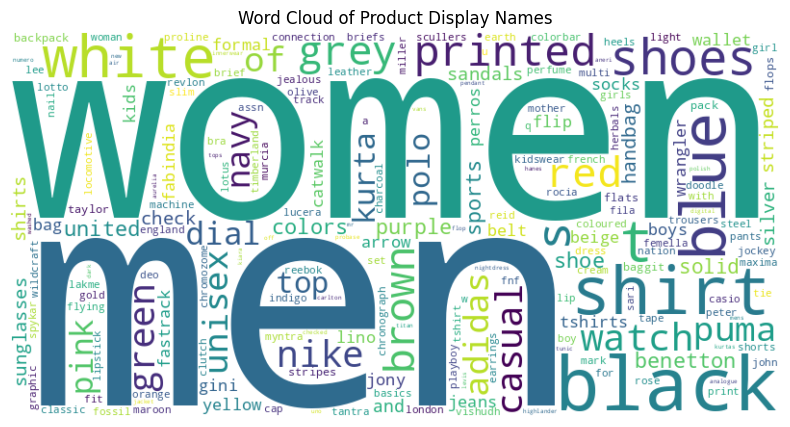

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Display Names')
plt.show()

# INSIGHTS using Word cloud and words from product display



1. The white, black , blue could most chosen colors realted to men and women products.


  0%|          | 0/600 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/600 [00:01<19:18,  1.93s/it]

1/1 [==============================] - 0s 179ms/step


  0%|          | 2/600 [00:02<11:26,  1.15s/it]

1/1 [==============================] - 0s 185ms/step


  0%|          | 3/600 [00:03<09:00,  1.10it/s]

1/1 [==============================] - 0s 175ms/step


  1%|          | 4/600 [00:03<08:22,  1.19it/s]

1/1 [==============================] - 0s 187ms/step


  1%|          | 5/600 [00:04<08:14,  1.20it/s]

1/1 [==============================] - 0s 170ms/step


  1%|          | 6/600 [00:05<07:23,  1.34it/s]

1/1 [==============================] - 0s 495ms/step


  1%|          | 7/600 [00:06<08:19,  1.19it/s]

1/1 [==============================] - 0s 290ms/step


  1%|▏         | 8/600 [00:07<10:49,  1.10s/it]

1/1 [==============================] - 0s 351ms/step


  2%|▏         | 9/600 [00:09<11:18,  1.15s/it]

1/1 [==============================] - 0s 315ms/step


  2%|▏         | 10/600 [00:09<09:00,  1.09it/s]

1/1 [==============================] - 0s 321ms/step


  2%|▏         | 11/600 [00:10<07:28,  1.31it/s]

1/1 [==============================] - 0s 465ms/step


  2%|▏         | 12/600 [00:10<07:18,  1.34it/s]

1/1 [==============================] - 0s 315ms/step


  2%|▏         | 13/600 [00:11<06:19,  1.55it/s]

1/1 [==============================] - 0s 313ms/step


  2%|▏         | 14/600 [00:11<05:32,  1.76it/s]

1/1 [==============================] - 0s 313ms/step


  2%|▎         | 15/600 [00:11<05:00,  1.95it/s]

1/1 [==============================] - 0s 318ms/step


  3%|▎         | 16/600 [00:12<04:38,  2.09it/s]

1/1 [==============================] - 0s 292ms/step


  3%|▎         | 17/600 [00:12<04:26,  2.19it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 18/600 [00:13<04:10,  2.32it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 19/600 [00:13<03:34,  2.71it/s]

1/1 [==============================] - 0s 181ms/step


  3%|▎         | 20/600 [00:13<03:09,  3.05it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▎         | 21/600 [00:13<02:51,  3.37it/s]

1/1 [==============================] - 0s 184ms/step


  4%|▎         | 22/600 [00:14<02:41,  3.59it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 23/600 [00:14<02:31,  3.82it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 24/600 [00:14<02:24,  3.98it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 25/600 [00:14<02:20,  4.09it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▍         | 26/600 [00:15<02:41,  3.54it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 27/600 [00:15<02:31,  3.78it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▍         | 28/600 [00:15<02:25,  3.93it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▍         | 29/600 [00:15<02:19,  4.08it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▌         | 30/600 [00:15<02:17,  4.14it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 31/600 [00:16<02:14,  4.24it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▌         | 32/600 [00:16<02:13,  4.26it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 33/600 [00:16<02:11,  4.31it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 34/600 [00:16<02:11,  4.31it/s]

1/1 [==============================] - 0s 189ms/step


  6%|▌         | 35/600 [00:17<02:12,  4.27it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▌         | 36/600 [00:17<02:10,  4.31it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 37/600 [00:17<02:09,  4.34it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▋         | 38/600 [00:17<02:08,  4.36it/s]

1/1 [==============================] - 0s 186ms/step


  6%|▋         | 39/600 [00:18<02:09,  4.34it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 40/600 [00:18<02:08,  4.35it/s]

1/1 [==============================] - 0s 183ms/step


  7%|▋         | 41/600 [00:18<02:09,  4.32it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 42/600 [00:18<02:10,  4.28it/s]

1/1 [==============================] - 0s 183ms/step


  7%|▋         | 43/600 [00:18<02:10,  4.27it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 44/600 [00:19<02:10,  4.27it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 45/600 [00:19<02:09,  4.30it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 46/600 [00:19<02:07,  4.34it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 47/600 [00:19<02:06,  4.37it/s]

1/1 [==============================] - 0s 184ms/step


  8%|▊         | 48/600 [00:20<02:07,  4.32it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 49/600 [00:20<02:30,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


  8%|▊         | 50/600 [00:20<02:24,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 51/600 [00:20<02:19,  3.95it/s]

1/1 [==============================] - 0s 182ms/step


  9%|▊         | 52/600 [00:21<02:15,  4.05it/s]

1/1 [==============================] - 0s 186ms/step


  9%|▉         | 53/600 [00:21<02:13,  4.09it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▉         | 54/600 [00:21<02:33,  3.55it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▉         | 55/600 [00:22<02:24,  3.77it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 56/600 [00:22<02:21,  3.83it/s]

1/1 [==============================] - 0s 171ms/step


 10%|▉         | 57/600 [00:22<02:16,  3.98it/s]

1/1 [==============================] - 0s 205ms/step


 10%|▉         | 58/600 [00:22<02:35,  3.49it/s]

1/1 [==============================] - 0s 313ms/step


 10%|▉         | 59/600 [00:23<02:50,  3.16it/s]

1/1 [==============================] - 0s 320ms/step


 10%|█         | 60/600 [00:23<03:03,  2.94it/s]

1/1 [==============================] - 0s 297ms/step


 10%|█         | 61/600 [00:24<03:09,  2.85it/s]

1/1 [==============================] - 0s 310ms/step


 10%|█         | 62/600 [00:24<03:15,  2.75it/s]

1/1 [==============================] - 0s 293ms/step


 10%|█         | 63/600 [00:24<03:20,  2.68it/s]

1/1 [==============================] - 0s 309ms/step


 11%|█         | 64/600 [00:25<03:23,  2.63it/s]

1/1 [==============================] - 0s 303ms/step


 11%|█         | 65/600 [00:25<03:25,  2.60it/s]

1/1 [==============================] - 0s 309ms/step


 11%|█         | 66/600 [00:26<03:25,  2.60it/s]

1/1 [==============================] - 0s 292ms/step


 11%|█         | 67/600 [00:26<03:22,  2.64it/s]

1/1 [==============================] - 0s 300ms/step


 11%|█▏        | 68/600 [00:26<03:19,  2.66it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 69/600 [00:27<02:59,  2.96it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 70/600 [00:27<02:40,  3.30it/s]

1/1 [==============================] - 0s 190ms/step


 12%|█▏        | 71/600 [00:27<02:31,  3.49it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 72/600 [00:27<02:21,  3.73it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 73/600 [00:27<02:14,  3.92it/s]

1/1 [==============================] - 0s 167ms/step


 12%|█▏        | 74/600 [00:28<02:09,  4.05it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▎        | 75/600 [00:28<02:07,  4.13it/s]

1/1 [==============================] - 0s 169ms/step


 13%|█▎        | 76/600 [00:28<02:05,  4.19it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 77/600 [00:28<02:03,  4.24it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 78/600 [00:29<02:01,  4.30it/s]

1/1 [==============================] - 0s 168ms/step


 13%|█▎        | 79/600 [00:29<01:58,  4.38it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█▎        | 80/600 [00:29<01:59,  4.34it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▎        | 81/600 [00:29<01:58,  4.36it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▎        | 82/600 [00:29<01:58,  4.37it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▍        | 83/600 [00:30<01:57,  4.42it/s]

1/1 [==============================] - 0s 180ms/step


 14%|█▍        | 84/600 [00:30<01:57,  4.40it/s]

1/1 [==============================] - 0s 168ms/step


 14%|█▍        | 85/600 [00:30<01:55,  4.44it/s]

1/1 [==============================] - 0s 179ms/step


 14%|█▍        | 86/600 [00:31<02:17,  3.74it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 87/600 [00:31<02:09,  3.96it/s]

1/1 [==============================] - 0s 187ms/step


 15%|█▍        | 88/600 [00:31<02:07,  4.01it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▍        | 89/600 [00:31<02:03,  4.14it/s]

1/1 [==============================] - 0s 179ms/step


 15%|█▌        | 90/600 [00:31<02:02,  4.16it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 91/600 [00:32<01:59,  4.25it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 92/600 [00:32<01:56,  4.34it/s]

1/1 [==============================] - 0s 181ms/step


 16%|█▌        | 93/600 [00:32<01:58,  4.28it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 94/600 [00:32<01:56,  4.34it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 95/600 [00:33<01:55,  4.36it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 96/600 [00:33<01:55,  4.38it/s]

1/1 [==============================] - 0s 181ms/step


 16%|█▌        | 97/600 [00:33<01:55,  4.37it/s]

1/1 [==============================] - 0s 169ms/step


 16%|█▋        | 98/600 [00:33<01:55,  4.34it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▋        | 99/600 [00:33<01:54,  4.37it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 100/600 [00:34<01:54,  4.37it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 101/600 [00:34<01:53,  4.40it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█▋        | 102/600 [00:34<01:54,  4.35it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 103/600 [00:34<01:52,  4.40it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 104/600 [00:35<01:53,  4.35it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 105/600 [00:35<01:53,  4.37it/s]

1/1 [==============================] - 0s 188ms/step


 18%|█▊        | 106/600 [00:35<01:55,  4.28it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 107/600 [00:35<01:54,  4.30it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 108/600 [00:36<01:54,  4.31it/s]

1/1 [==============================] - 0s 168ms/step


 18%|█▊        | 109/600 [00:36<01:52,  4.37it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 110/600 [00:36<01:53,  4.33it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 111/600 [00:36<01:52,  4.34it/s]

1/1 [==============================] - 0s 276ms/step


 19%|█▊        | 112/600 [00:37<02:15,  3.61it/s]

1/1 [==============================] - 0s 301ms/step


 19%|█▉        | 113/600 [00:37<02:32,  3.19it/s]

1/1 [==============================] - 0s 327ms/step


 19%|█▉        | 114/600 [00:37<02:46,  2.93it/s]

1/1 [==============================] - 0s 299ms/step


 19%|█▉        | 115/600 [00:38<02:54,  2.78it/s]

1/1 [==============================] - 0s 314ms/step


 19%|█▉        | 116/600 [00:38<02:58,  2.71it/s]

1/1 [==============================] - 0s 304ms/step


 20%|█▉        | 117/600 [00:39<03:03,  2.64it/s]

1/1 [==============================] - 0s 299ms/step


 20%|█▉        | 118/600 [00:39<03:01,  2.66it/s]

1/1 [==============================] - 0s 298ms/step


 20%|█▉        | 119/600 [00:39<03:05,  2.60it/s]

1/1 [==============================] - 0s 318ms/step


 20%|██        | 120/600 [00:40<03:05,  2.58it/s]

1/1 [==============================] - 0s 294ms/step


 20%|██        | 121/600 [00:40<03:06,  2.56it/s]

1/1 [==============================] - 0s 301ms/step


 20%|██        | 122/600 [00:41<03:05,  2.58it/s]

1/1 [==============================] - 0s 171ms/step


 20%|██        | 123/600 [00:41<02:42,  2.93it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 124/600 [00:41<02:47,  2.85it/s]

1/1 [==============================] - 0s 184ms/step


 21%|██        | 125/600 [00:41<02:30,  3.15it/s]

1/1 [==============================] - 0s 182ms/step


 21%|██        | 126/600 [00:42<02:18,  3.42it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 127/600 [00:42<02:09,  3.66it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██▏       | 128/600 [00:42<02:03,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


 22%|██▏       | 129/600 [00:42<01:59,  3.93it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 130/600 [00:43<01:57,  4.00it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 131/600 [00:43<01:55,  4.08it/s]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 132/600 [00:43<02:12,  3.53it/s]

1/1 [==============================] - 0s 181ms/step


 22%|██▏       | 133/600 [00:43<02:05,  3.71it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 134/600 [00:44<01:59,  3.89it/s]

1/1 [==============================] - 0s 181ms/step


 22%|██▎       | 135/600 [00:44<01:56,  3.99it/s]

1/1 [==============================] - 0s 168ms/step


 23%|██▎       | 136/600 [00:44<01:52,  4.12it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 137/600 [00:44<01:51,  4.16it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 138/600 [00:45<01:51,  4.14it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 139/600 [00:45<01:50,  4.17it/s]

1/1 [==============================] - 0s 181ms/step


 23%|██▎       | 140/600 [00:45<02:08,  3.57it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██▎       | 141/600 [00:46<02:20,  3.27it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▎       | 142/600 [00:46<02:09,  3.54it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 143/600 [00:46<02:20,  3.25it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 144/600 [00:47<02:28,  3.07it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██▍       | 145/600 [00:47<02:34,  2.95it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 146/600 [00:47<02:19,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


 24%|██▍       | 147/600 [00:47<02:09,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▍       | 148/600 [00:48<02:03,  3.65it/s]

1/1 [==============================] - 0s 171ms/step


 25%|██▍       | 149/600 [00:48<01:56,  3.86it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▌       | 150/600 [00:48<01:52,  3.99it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 151/600 [00:48<01:50,  4.06it/s]

1/1 [==============================] - 0s 182ms/step


 25%|██▌       | 152/600 [00:49<01:48,  4.12it/s]

1/1 [==============================] - 0s 179ms/step


 26%|██▌       | 153/600 [00:49<02:05,  3.56it/s]

1/1 [==============================] - 0s 177ms/step


 26%|██▌       | 154/600 [00:49<01:58,  3.76it/s]

1/1 [==============================] - 0s 172ms/step


 26%|██▌       | 155/600 [00:49<01:53,  3.93it/s]

1/1 [==============================] - 0s 192ms/step


 26%|██▌       | 156/600 [00:50<02:08,  3.45it/s]

1/1 [==============================] - 0s 177ms/step


 26%|██▌       | 157/600 [00:50<02:00,  3.66it/s]

1/1 [==============================] - 0s 167ms/step


 26%|██▋       | 158/600 [00:50<01:53,  3.90it/s]

1/1 [==============================] - 0s 184ms/step


 26%|██▋       | 159/600 [00:51<02:08,  3.43it/s]

1/1 [==============================] - 0s 297ms/step


 27%|██▋       | 160/600 [00:51<02:19,  3.16it/s]

1/1 [==============================] - 0s 309ms/step


 27%|██▋       | 161/600 [00:51<02:30,  2.91it/s]

1/1 [==============================] - 0s 325ms/step


 27%|██▋       | 162/600 [00:52<02:37,  2.78it/s]

1/1 [==============================] - 0s 327ms/step


 27%|██▋       | 163/600 [00:52<02:42,  2.68it/s]

1/1 [==============================] - 0s 307ms/step


 27%|██▋       | 164/600 [00:53<02:46,  2.61it/s]

1/1 [==============================] - 0s 315ms/step


 28%|██▊       | 165/600 [00:53<02:49,  2.56it/s]

1/1 [==============================] - 0s 300ms/step


 28%|██▊       | 166/600 [00:53<02:51,  2.54it/s]

1/1 [==============================] - 0s 309ms/step


 28%|██▊       | 167/600 [00:54<02:48,  2.56it/s]

1/1 [==============================] - 0s 297ms/step


 28%|██▊       | 168/600 [00:54<02:51,  2.52it/s]

1/1 [==============================] - 0s 306ms/step


 28%|██▊       | 169/600 [00:55<02:49,  2.55it/s]

1/1 [==============================] - 0s 252ms/step


 28%|██▊       | 170/600 [00:55<02:42,  2.65it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██▊       | 171/600 [00:55<02:23,  2.99it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▊       | 172/600 [00:55<02:11,  3.26it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▉       | 173/600 [00:56<02:00,  3.53it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 174/600 [00:56<01:54,  3.72it/s]

1/1 [==============================] - 0s 180ms/step


 29%|██▉       | 175/600 [00:56<01:51,  3.82it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 176/600 [00:56<01:48,  3.91it/s]

1/1 [==============================] - 0s 178ms/step


 30%|██▉       | 177/600 [00:57<01:45,  4.02it/s]

1/1 [==============================] - 0s 175ms/step


 30%|██▉       | 178/600 [00:57<01:42,  4.12it/s]

1/1 [==============================] - 0s 185ms/step


 30%|██▉       | 179/600 [00:57<01:42,  4.11it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███       | 180/600 [00:57<01:42,  4.10it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███       | 181/600 [00:58<01:40,  4.18it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███       | 182/600 [00:58<01:39,  4.22it/s]

1/1 [==============================] - 0s 185ms/step


 30%|███       | 183/600 [00:58<01:39,  4.20it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 184/600 [00:58<01:55,  3.59it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 185/600 [00:59<01:49,  3.81it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 186/600 [00:59<01:44,  3.95it/s]

1/1 [==============================] - 0s 188ms/step


 31%|███       | 187/600 [00:59<01:43,  3.99it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███▏      | 188/600 [00:59<01:41,  4.04it/s]

1/1 [==============================] - 0s 174ms/step


 32%|███▏      | 189/600 [01:00<01:39,  4.15it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 190/600 [01:00<01:37,  4.20it/s]

1/1 [==============================] - 0s 189ms/step


 32%|███▏      | 191/600 [01:00<01:38,  4.16it/s]

1/1 [==============================] - 0s 183ms/step


 32%|███▏      | 192/600 [01:00<01:54,  3.57it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▏      | 193/600 [01:01<01:47,  3.79it/s]

1/1 [==============================] - 0s 183ms/step


 32%|███▏      | 194/600 [01:01<01:44,  3.89it/s]

1/1 [==============================] - 0s 192ms/step


 32%|███▎      | 195/600 [01:01<01:43,  3.92it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 196/600 [01:01<01:40,  4.02it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 197/600 [01:02<01:38,  4.08it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 198/600 [01:02<01:37,  4.14it/s]

1/1 [==============================] - 0s 199ms/step


 33%|███▎      | 199/600 [01:02<01:52,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 200/600 [01:02<01:46,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▎      | 201/600 [01:03<01:58,  3.36it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▎      | 202/600 [01:03<01:50,  3.59it/s]

1/1 [==============================] - 0s 174ms/step


 34%|███▍      | 203/600 [01:03<01:45,  3.76it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 204/600 [01:03<01:41,  3.89it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▍      | 205/600 [01:04<01:39,  3.99it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 206/600 [01:04<01:37,  4.06it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▍      | 207/600 [01:04<01:38,  4.00it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▍      | 208/600 [01:04<01:36,  4.06it/s]

1/1 [==============================] - 0s 180ms/step


 35%|███▍      | 209/600 [01:05<01:35,  4.09it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███▌      | 210/600 [01:05<01:39,  3.93it/s]

1/1 [==============================] - 0s 317ms/step


 35%|███▌      | 211/600 [01:05<01:57,  3.31it/s]

1/1 [==============================] - 0s 306ms/step


 35%|███▌      | 212/600 [01:06<02:06,  3.07it/s]

1/1 [==============================] - 0s 297ms/step


 36%|███▌      | 213/600 [01:06<02:11,  2.94it/s]

1/1 [==============================] - 0s 308ms/step


 36%|███▌      | 214/600 [01:07<02:20,  2.76it/s]

1/1 [==============================] - 0s 301ms/step


 36%|███▌      | 215/600 [01:07<02:24,  2.66it/s]

1/1 [==============================] - 0s 317ms/step


 36%|███▌      | 216/600 [01:07<02:28,  2.59it/s]

1/1 [==============================] - 0s 287ms/step


 36%|███▌      | 217/600 [01:08<02:28,  2.57it/s]

1/1 [==============================] - 0s 306ms/step


 36%|███▋      | 218/600 [01:08<02:27,  2.59it/s]

1/1 [==============================] - 0s 305ms/step


 36%|███▋      | 219/600 [01:09<02:27,  2.58it/s]

1/1 [==============================] - 0s 303ms/step


 37%|███▋      | 220/600 [01:09<02:27,  2.57it/s]

1/1 [==============================] - 0s 234ms/step


 37%|███▋      | 221/600 [01:09<02:18,  2.73it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 222/600 [01:09<02:03,  3.05it/s]

1/1 [==============================] - 0s 166ms/step


 37%|███▋      | 223/600 [01:10<01:52,  3.36it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 224/600 [01:10<01:44,  3.61it/s]

1/1 [==============================] - 0s 185ms/step


 38%|███▊      | 225/600 [01:10<01:40,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


 38%|███▊      | 226/600 [01:10<01:36,  3.87it/s]

1/1 [==============================] - 0s 172ms/step


 38%|███▊      | 227/600 [01:11<01:33,  3.99it/s]

1/1 [==============================] - 0s 175ms/step


 38%|███▊      | 228/600 [01:11<01:31,  4.05it/s]

1/1 [==============================] - 0s 188ms/step


 38%|███▊      | 229/600 [01:11<01:32,  4.03it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 230/600 [01:11<01:45,  3.52it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 231/600 [01:12<01:39,  3.71it/s]

1/1 [==============================] - 0s 183ms/step


 39%|███▊      | 232/600 [01:12<01:35,  3.85it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▉      | 233/600 [01:12<01:31,  3.99it/s]

1/1 [==============================] - 0s 190ms/step


 39%|███▉      | 234/600 [01:12<01:33,  3.93it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▉      | 235/600 [01:13<01:29,  4.06it/s]

1/1 [==============================] - 0s 173ms/step


 39%|███▉      | 236/600 [01:13<01:28,  4.12it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 237/600 [01:13<01:27,  4.13it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 238/600 [01:13<01:26,  4.17it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 239/600 [01:14<01:26,  4.16it/s]

1/1 [==============================] - 0s 180ms/step


 40%|████      | 240/600 [01:14<01:25,  4.19it/s]

1/1 [==============================] - 0s 175ms/step


 40%|████      | 241/600 [01:14<01:25,  4.20it/s]

1/1 [==============================] - 0s 181ms/step


 40%|████      | 242/600 [01:14<01:25,  4.20it/s]

1/1 [==============================] - 0s 184ms/step


 40%|████      | 243/600 [01:15<01:25,  4.18it/s]

1/1 [==============================] - 0s 179ms/step


 41%|████      | 244/600 [01:15<01:25,  4.18it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 245/600 [01:15<01:24,  4.20it/s]

1/1 [==============================] - 0s 179ms/step


 41%|████      | 246/600 [01:15<01:24,  4.17it/s]

1/1 [==============================] - 0s 183ms/step


 41%|████      | 247/600 [01:16<01:24,  4.20it/s]

1/1 [==============================] - 0s 179ms/step


 41%|████▏     | 248/600 [01:16<01:23,  4.20it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 249/600 [01:16<01:22,  4.25it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 250/600 [01:16<01:22,  4.25it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 251/600 [01:16<01:22,  4.25it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 252/600 [01:17<01:23,  4.15it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 253/600 [01:17<01:37,  3.57it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 254/600 [01:17<01:31,  3.76it/s]

1/1 [==============================] - 0s 188ms/step


 42%|████▎     | 255/600 [01:18<01:29,  3.88it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 256/600 [01:18<01:26,  3.99it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 257/600 [01:18<01:23,  4.09it/s]

1/1 [==============================] - 0s 174ms/step


 43%|████▎     | 258/600 [01:18<01:23,  4.10it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 259/600 [01:19<01:21,  4.20it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 260/600 [01:19<01:21,  4.17it/s]

1/1 [==============================] - 0s 176ms/step


 44%|████▎     | 261/600 [01:19<01:35,  3.56it/s]

1/1 [==============================] - 0s 307ms/step


 44%|████▎     | 262/600 [01:20<01:46,  3.18it/s]

1/1 [==============================] - 0s 303ms/step


 44%|████▍     | 263/600 [01:20<01:54,  2.94it/s]

1/1 [==============================] - 0s 295ms/step


 44%|████▍     | 264/600 [01:20<01:59,  2.82it/s]

1/1 [==============================] - 0s 323ms/step


 44%|████▍     | 265/600 [01:21<02:03,  2.71it/s]

1/1 [==============================] - 0s 303ms/step


 44%|████▍     | 266/600 [01:21<02:04,  2.68it/s]

1/1 [==============================] - 0s 316ms/step


 44%|████▍     | 267/600 [01:21<02:07,  2.62it/s]

1/1 [==============================] - 0s 310ms/step


 45%|████▍     | 268/600 [01:22<02:09,  2.56it/s]

1/1 [==============================] - 0s 331ms/step


 45%|████▍     | 269/600 [01:23<02:41,  2.05it/s]

1/1 [==============================] - 0s 309ms/step


 45%|████▌     | 270/600 [01:23<02:30,  2.19it/s]

1/1 [==============================] - 0s 239ms/step


 45%|████▌     | 271/600 [01:23<02:18,  2.38it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▌     | 272/600 [01:24<01:59,  2.75it/s]

1/1 [==============================] - 0s 184ms/step


 46%|████▌     | 273/600 [01:24<01:47,  3.05it/s]

1/1 [==============================] - 0s 188ms/step


 46%|████▌     | 274/600 [01:24<01:39,  3.28it/s]

1/1 [==============================] - 0s 170ms/step


 46%|████▌     | 275/600 [01:24<01:31,  3.55it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▌     | 276/600 [01:25<01:27,  3.72it/s]

1/1 [==============================] - 0s 187ms/step


 46%|████▌     | 277/600 [01:25<01:36,  3.33it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▋     | 278/600 [01:25<01:43,  3.11it/s]

1/1 [==============================] - 0s 181ms/step


 46%|████▋     | 279/600 [01:26<01:35,  3.36it/s]

1/1 [==============================] - 0s 177ms/step


 47%|████▋     | 280/600 [01:26<01:28,  3.60it/s]

1/1 [==============================] - 0s 175ms/step


 47%|████▋     | 281/600 [01:26<01:25,  3.75it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 282/600 [01:26<01:21,  3.89it/s]

1/1 [==============================] - 0s 175ms/step


 47%|████▋     | 283/600 [01:26<01:19,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 284/600 [01:27<01:18,  4.03it/s]

1/1 [==============================] - 0s 192ms/step


 48%|████▊     | 285/600 [01:27<01:18,  4.00it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 286/600 [01:27<01:16,  4.10it/s]

1/1 [==============================] - 0s 170ms/step


 48%|████▊     | 287/600 [01:27<01:14,  4.18it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 288/600 [01:28<01:12,  4.28it/s]

1/1 [==============================] - 0s 192ms/step


 48%|████▊     | 289/600 [01:28<01:14,  4.20it/s]

1/1 [==============================] - 0s 175ms/step


 48%|████▊     | 290/600 [01:28<01:13,  4.22it/s]

1/1 [==============================] - 0s 168ms/step


 48%|████▊     | 291/600 [01:28<01:11,  4.31it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▊     | 292/600 [01:29<01:12,  4.27it/s]

1/1 [==============================] - 0s 173ms/step


 49%|████▉     | 293/600 [01:29<01:25,  3.61it/s]

1/1 [==============================] - 0s 173ms/step


 49%|████▉     | 294/600 [01:29<01:20,  3.80it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 295/600 [01:29<01:17,  3.95it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 296/600 [01:30<01:14,  4.09it/s]

1/1 [==============================] - 0s 171ms/step


 50%|████▉     | 297/600 [01:30<01:12,  4.16it/s]

1/1 [==============================] - 0s 184ms/step


 50%|████▉     | 298/600 [01:30<01:13,  4.08it/s]

1/1 [==============================] - 0s 172ms/step


 50%|████▉     | 299/600 [01:30<01:12,  4.15it/s]

1/1 [==============================] - 0s 174ms/step


 50%|█████     | 300/600 [01:31<01:12,  4.15it/s]

1/1 [==============================] - 0s 176ms/step


 50%|█████     | 301/600 [01:31<01:54,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 50%|█████     | 302/600 [01:32<01:41,  2.95it/s]

1/1 [==============================] - 0s 176ms/step


 50%|█████     | 303/600 [01:32<01:44,  2.84it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████     | 304/600 [01:32<01:34,  3.15it/s]

1/1 [==============================] - 0s 184ms/step


 51%|█████     | 305/600 [01:32<01:27,  3.39it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████     | 306/600 [01:33<01:21,  3.59it/s]

1/1 [==============================] - 0s 188ms/step


 51%|█████     | 307/600 [01:33<01:30,  3.24it/s]

1/1 [==============================] - 0s 189ms/step


 51%|█████▏    | 308/600 [01:33<01:25,  3.43it/s]

1/1 [==============================] - 0s 294ms/step


 52%|█████▏    | 309/600 [01:34<01:36,  3.01it/s]

1/1 [==============================] - 0s 315ms/step


 52%|█████▏    | 310/600 [01:34<01:41,  2.86it/s]

1/1 [==============================] - 0s 322ms/step


 52%|█████▏    | 311/600 [01:35<01:45,  2.74it/s]

1/1 [==============================] - 0s 318ms/step


 52%|█████▏    | 312/600 [01:35<01:48,  2.66it/s]

1/1 [==============================] - 0s 296ms/step


 52%|█████▏    | 313/600 [01:35<01:47,  2.67it/s]

1/1 [==============================] - 0s 293ms/step


 52%|█████▏    | 314/600 [01:36<01:46,  2.67it/s]

1/1 [==============================] - 0s 300ms/step


 52%|█████▎    | 315/600 [01:36<01:49,  2.61it/s]

1/1 [==============================] - 0s 303ms/step


 53%|█████▎    | 316/600 [01:36<01:51,  2.55it/s]

1/1 [==============================] - 0s 301ms/step


 53%|█████▎    | 317/600 [01:37<01:50,  2.56it/s]

1/1 [==============================] - 0s 301ms/step


 53%|█████▎    | 318/600 [01:37<01:51,  2.52it/s]

1/1 [==============================] - 0s 266ms/step


 53%|█████▎    | 319/600 [01:38<01:46,  2.63it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 320/600 [01:38<01:34,  2.97it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▎    | 321/600 [01:38<01:26,  3.24it/s]

1/1 [==============================] - 0s 194ms/step


 54%|█████▎    | 322/600 [01:38<01:21,  3.41it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 323/600 [01:39<01:16,  3.61it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████▍    | 324/600 [01:39<01:24,  3.27it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▍    | 325/600 [01:39<01:19,  3.46it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 326/600 [01:39<01:14,  3.65it/s]

1/1 [==============================] - 0s 171ms/step


 55%|█████▍    | 327/600 [01:40<01:11,  3.84it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 328/600 [01:40<01:08,  3.95it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 329/600 [01:40<01:07,  4.03it/s]

1/1 [==============================] - 0s 186ms/step


 55%|█████▌    | 330/600 [01:40<01:06,  4.07it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▌    | 331/600 [01:41<01:04,  4.16it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▌    | 332/600 [01:41<01:03,  4.19it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████▌    | 333/600 [01:41<01:04,  4.16it/s]

1/1 [==============================] - 0s 184ms/step


 56%|█████▌    | 334/600 [01:41<01:03,  4.17it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▌    | 335/600 [01:42<01:04,  4.13it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 336/600 [01:42<01:13,  3.57it/s]

1/1 [==============================] - 0s 177ms/step


 56%|█████▌    | 337/600 [01:42<01:09,  3.76it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▋    | 338/600 [01:42<01:08,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▋    | 339/600 [01:43<01:06,  3.92it/s]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 340/600 [01:43<01:04,  4.04it/s]

1/1 [==============================] - 0s 178ms/step


 57%|█████▋    | 341/600 [01:43<01:04,  4.05it/s]

1/1 [==============================] - 0s 188ms/step


 57%|█████▋    | 342/600 [01:43<01:03,  4.05it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 343/600 [01:44<01:02,  4.09it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 344/600 [01:44<01:02,  4.12it/s]

1/1 [==============================] - 0s 177ms/step


 57%|█████▊    | 345/600 [01:44<01:01,  4.14it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████▊    | 346/600 [01:44<01:11,  3.57it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████▊    | 347/600 [01:45<01:17,  3.27it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 348/600 [01:45<01:21,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 58%|█████▊    | 349/600 [01:45<01:14,  3.35it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 350/600 [01:46<01:10,  3.53it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 351/600 [01:46<01:06,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▊    | 352/600 [01:46<01:04,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████▉    | 353/600 [01:46<01:02,  3.97it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 354/600 [01:47<01:00,  4.04it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▉    | 355/600 [01:47<00:59,  4.14it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▉    | 356/600 [01:47<00:58,  4.16it/s]

1/1 [==============================] - 0s 185ms/step


 60%|█████▉    | 357/600 [01:47<00:58,  4.15it/s]

1/1 [==============================] - 0s 194ms/step


 60%|█████▉    | 358/600 [01:48<01:07,  3.58it/s]

1/1 [==============================] - 0s 300ms/step


 60%|█████▉    | 359/600 [01:48<01:15,  3.19it/s]

1/1 [==============================] - 0s 297ms/step


 60%|██████    | 360/600 [01:48<01:19,  3.03it/s]

1/1 [==============================] - 0s 298ms/step


 60%|██████    | 361/600 [01:49<01:22,  2.90it/s]

1/1 [==============================] - 0s 295ms/step


 60%|██████    | 362/600 [01:49<01:26,  2.75it/s]

1/1 [==============================] - 0s 296ms/step


 60%|██████    | 363/600 [01:50<01:26,  2.75it/s]

1/1 [==============================] - 0s 297ms/step


 61%|██████    | 364/600 [01:50<01:26,  2.73it/s]

1/1 [==============================] - 0s 273ms/step


 61%|██████    | 365/600 [01:50<01:25,  2.75it/s]

1/1 [==============================] - 0s 307ms/step


 61%|██████    | 366/600 [01:51<01:27,  2.67it/s]

1/1 [==============================] - 0s 301ms/step


 61%|██████    | 367/600 [01:51<01:27,  2.67it/s]

1/1 [==============================] - 0s 289ms/step


 61%|██████▏   | 368/600 [01:51<01:25,  2.72it/s]

1/1 [==============================] - 0s 297ms/step


 62%|██████▏   | 369/600 [01:52<01:25,  2.70it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 370/600 [01:52<01:16,  3.02it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 371/600 [01:52<01:09,  3.30it/s]

1/1 [==============================] - 0s 188ms/step


 62%|██████▏   | 372/600 [01:53<01:13,  3.09it/s]

1/1 [==============================] - 0s 183ms/step


 62%|██████▏   | 373/600 [01:53<01:08,  3.33it/s]

1/1 [==============================] - 0s 176ms/step


 62%|██████▏   | 374/600 [01:53<01:03,  3.56it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▎   | 375/600 [01:53<01:00,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


 63%|██████▎   | 376/600 [01:54<01:06,  3.35it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 377/600 [01:54<01:02,  3.58it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 378/600 [01:54<00:59,  3.71it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 379/600 [01:55<00:57,  3.86it/s]

1/1 [==============================] - 0s 182ms/step


 63%|██████▎   | 380/600 [01:55<00:55,  3.93it/s]

1/1 [==============================] - 0s 179ms/step


 64%|██████▎   | 381/600 [01:55<00:54,  3.99it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▎   | 382/600 [01:55<00:53,  4.07it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▍   | 383/600 [01:55<00:52,  4.13it/s]

1/1 [==============================] - 0s 182ms/step


 64%|██████▍   | 384/600 [01:56<00:52,  4.13it/s]

1/1 [==============================] - 0s 174ms/step


 64%|██████▍   | 385/600 [01:56<00:51,  4.14it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▍   | 386/600 [01:56<00:51,  4.15it/s]

1/1 [==============================] - 0s 171ms/step


 64%|██████▍   | 387/600 [01:56<00:50,  4.18it/s]

1/1 [==============================] - 0s 172ms/step


 65%|██████▍   | 388/600 [01:57<00:50,  4.24it/s]

1/1 [==============================] - 0s 190ms/step


 65%|██████▍   | 389/600 [01:57<00:50,  4.16it/s]

1/1 [==============================] - 0s 170ms/step


 65%|██████▌   | 390/600 [01:57<00:50,  4.20it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▌   | 391/600 [01:57<00:49,  4.25it/s]

1/1 [==============================] - 0s 177ms/step


 65%|██████▌   | 392/600 [01:58<00:48,  4.27it/s]

1/1 [==============================] - 0s 180ms/step


 66%|██████▌   | 393/600 [01:58<00:48,  4.26it/s]

1/1 [==============================] - 0s 185ms/step


 66%|██████▌   | 394/600 [01:58<00:48,  4.22it/s]

1/1 [==============================] - 0s 171ms/step


 66%|██████▌   | 395/600 [01:58<00:48,  4.24it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 396/600 [01:59<00:48,  4.24it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▌   | 397/600 [01:59<00:48,  4.18it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▋   | 398/600 [01:59<00:49,  4.10it/s]

1/1 [==============================] - 0s 171ms/step


 66%|██████▋   | 399/600 [01:59<00:48,  4.16it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 400/600 [02:00<00:47,  4.23it/s]

1/1 [==============================] - 0s 166ms/step


 67%|██████▋   | 401/600 [02:00<00:46,  4.30it/s]

1/1 [==============================] - 0s 183ms/step


 67%|██████▋   | 402/600 [02:00<00:46,  4.27it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 403/600 [02:00<00:45,  4.32it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 404/600 [02:00<00:45,  4.34it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 405/600 [02:01<00:44,  4.36it/s]

1/1 [==============================] - 0s 178ms/step


 68%|██████▊   | 406/600 [02:01<00:45,  4.29it/s]

1/1 [==============================] - 0s 179ms/step


 68%|██████▊   | 407/600 [02:01<00:45,  4.26it/s]

1/1 [==============================] - 0s 175ms/step


 68%|██████▊   | 408/600 [02:01<00:45,  4.26it/s]

1/1 [==============================] - 0s 181ms/step


 68%|██████▊   | 409/600 [02:02<00:52,  3.63it/s]

1/1 [==============================] - 0s 230ms/step


 68%|██████▊   | 410/600 [02:02<00:57,  3.30it/s]

1/1 [==============================] - 0s 308ms/step


 68%|██████▊   | 411/600 [02:03<01:02,  3.01it/s]

1/1 [==============================] - 0s 303ms/step


 69%|██████▊   | 412/600 [02:03<01:05,  2.89it/s]

1/1 [==============================] - 0s 298ms/step


 69%|██████▉   | 413/600 [02:03<01:09,  2.71it/s]

1/1 [==============================] - 0s 298ms/step


 69%|██████▉   | 414/600 [02:04<01:09,  2.69it/s]

1/1 [==============================] - 0s 307ms/step


 69%|██████▉   | 415/600 [02:04<01:10,  2.63it/s]

1/1 [==============================] - 0s 305ms/step


 69%|██████▉   | 416/600 [02:04<01:10,  2.62it/s]

1/1 [==============================] - 0s 296ms/step


 70%|██████▉   | 417/600 [02:05<01:09,  2.63it/s]

1/1 [==============================] - 0s 304ms/step


 70%|██████▉   | 418/600 [02:05<01:11,  2.53it/s]

1/1 [==============================] - 0s 297ms/step


 70%|██████▉   | 419/600 [02:06<01:11,  2.52it/s]

1/1 [==============================] - 0s 301ms/step


 70%|███████   | 420/600 [02:06<01:10,  2.56it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 421/600 [02:06<01:10,  2.53it/s]

1/1 [==============================] - 0s 174ms/step


 70%|███████   | 422/600 [02:07<01:01,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


 70%|███████   | 423/600 [02:07<00:55,  3.19it/s]

1/1 [==============================] - 0s 182ms/step


 71%|███████   | 424/600 [02:07<00:51,  3.39it/s]

1/1 [==============================] - 0s 182ms/step


 71%|███████   | 425/600 [02:08<00:55,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████   | 426/600 [02:08<00:51,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


 71%|███████   | 427/600 [02:08<00:48,  3.60it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████▏  | 428/600 [02:08<00:46,  3.68it/s]

1/1 [==============================] - 0s 173ms/step


 72%|███████▏  | 429/600 [02:09<00:44,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 72%|███████▏  | 430/600 [02:09<00:50,  3.38it/s]

1/1 [==============================] - 0s 179ms/step


 72%|███████▏  | 431/600 [02:09<00:46,  3.60it/s]

1/1 [==============================] - 0s 180ms/step


 72%|███████▏  | 432/600 [02:09<00:45,  3.72it/s]

1/1 [==============================] - 0s 173ms/step


 72%|███████▏  | 433/600 [02:10<00:50,  3.32it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 434/600 [02:10<00:46,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 72%|███████▎  | 435/600 [02:10<00:44,  3.69it/s]

1/1 [==============================] - 0s 169ms/step


 73%|███████▎  | 436/600 [02:10<00:42,  3.86it/s]

1/1 [==============================] - 0s 178ms/step


 73%|███████▎  | 437/600 [02:11<00:41,  3.96it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 438/600 [02:11<00:40,  4.03it/s]

1/1 [==============================] - 0s 179ms/step


 73%|███████▎  | 439/600 [02:11<00:39,  4.03it/s]

1/1 [==============================] - 0s 168ms/step


 73%|███████▎  | 440/600 [02:11<00:39,  4.03it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▎  | 441/600 [02:12<00:38,  4.13it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▎  | 442/600 [02:12<00:38,  4.14it/s]

1/1 [==============================] - 0s 167ms/step


 74%|███████▍  | 443/600 [02:12<00:37,  4.22it/s]

1/1 [==============================] - 0s 194ms/step


 74%|███████▍  | 444/600 [02:12<00:38,  4.10it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▍  | 445/600 [02:13<00:36,  4.19it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▍  | 446/600 [02:13<00:36,  4.19it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▍  | 447/600 [02:13<00:36,  4.14it/s]

1/1 [==============================] - 0s 183ms/step


 75%|███████▍  | 448/600 [02:13<00:36,  4.12it/s]

1/1 [==============================] - 0s 168ms/step


 75%|███████▍  | 449/600 [02:14<00:35,  4.21it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▌  | 450/600 [02:14<00:35,  4.20it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▌  | 451/600 [02:14<00:35,  4.20it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▌  | 452/600 [02:14<00:35,  4.19it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████▌  | 453/600 [02:15<00:35,  4.14it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████▌  | 454/600 [02:15<00:34,  4.17it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████▌  | 455/600 [02:15<00:34,  4.20it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▌  | 456/600 [02:15<00:34,  4.21it/s]

1/1 [==============================] - 0s 192ms/step


 76%|███████▌  | 457/600 [02:16<00:34,  4.12it/s]

1/1 [==============================] - 0s 180ms/step


 76%|███████▋  | 458/600 [02:16<00:40,  3.54it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████▋  | 459/600 [02:16<00:37,  3.75it/s]

1/1 [==============================] - 0s 281ms/step


 77%|███████▋  | 460/600 [02:16<00:41,  3.37it/s]

1/1 [==============================] - 0s 296ms/step


 77%|███████▋  | 461/600 [02:17<00:44,  3.11it/s]

1/1 [==============================] - 0s 311ms/step


 77%|███████▋  | 462/600 [02:17<00:48,  2.83it/s]

1/1 [==============================] - 0s 316ms/step


 77%|███████▋  | 463/600 [02:18<00:50,  2.74it/s]

1/1 [==============================] - 0s 305ms/step


 77%|███████▋  | 464/600 [02:18<00:51,  2.65it/s]

1/1 [==============================] - 0s 295ms/step


 78%|███████▊  | 465/600 [02:18<00:50,  2.68it/s]

1/1 [==============================] - 0s 312ms/step


 78%|███████▊  | 466/600 [02:19<00:51,  2.61it/s]

1/1 [==============================] - 0s 284ms/step


 78%|███████▊  | 467/600 [02:19<00:50,  2.65it/s]

1/1 [==============================] - 0s 308ms/step


 78%|███████▊  | 468/600 [02:20<00:51,  2.58it/s]

1/1 [==============================] - 0s 298ms/step


 78%|███████▊  | 469/600 [02:20<00:51,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


 78%|███████▊  | 470/600 [02:20<00:50,  2.57it/s]

1/1 [==============================] - 0s 209ms/step


 78%|███████▊  | 471/600 [02:21<00:46,  2.78it/s]

1/1 [==============================] - 0s 170ms/step


 79%|███████▊  | 472/600 [02:21<00:41,  3.08it/s]

1/1 [==============================] - 0s 170ms/step


 79%|███████▉  | 473/600 [02:21<00:37,  3.35it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 474/600 [02:21<00:35,  3.58it/s]

1/1 [==============================] - 0s 183ms/step


 79%|███████▉  | 475/600 [02:22<00:33,  3.72it/s]

1/1 [==============================] - 0s 174ms/step


 79%|███████▉  | 476/600 [02:22<00:32,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


 80%|███████▉  | 477/600 [02:22<00:31,  3.95it/s]

1/1 [==============================] - 0s 190ms/step


 80%|███████▉  | 478/600 [02:22<00:30,  3.94it/s]

1/1 [==============================] - 0s 180ms/step


 80%|███████▉  | 479/600 [02:23<00:30,  4.02it/s]

1/1 [==============================] - 0s 177ms/step


 80%|████████  | 480/600 [02:23<00:29,  4.05it/s]

1/1 [==============================] - 0s 170ms/step


 80%|████████  | 481/600 [02:23<00:28,  4.15it/s]

1/1 [==============================] - 0s 173ms/step


 80%|████████  | 482/600 [02:23<00:28,  4.14it/s]

1/1 [==============================] - 0s 171ms/step


 80%|████████  | 483/600 [02:24<00:28,  4.14it/s]

1/1 [==============================] - 0s 171ms/step


 81%|████████  | 484/600 [02:24<00:28,  4.14it/s]

1/1 [==============================] - 0s 173ms/step


 81%|████████  | 485/600 [02:24<00:27,  4.19it/s]

1/1 [==============================] - 0s 172ms/step


 81%|████████  | 486/600 [02:24<00:27,  4.15it/s]

1/1 [==============================] - 0s 170ms/step


 81%|████████  | 487/600 [02:25<00:26,  4.21it/s]

1/1 [==============================] - 0s 188ms/step


 81%|████████▏ | 488/600 [02:25<00:27,  4.13it/s]

1/1 [==============================] - 0s 174ms/step


 82%|████████▏ | 489/600 [02:25<00:26,  4.18it/s]

1/1 [==============================] - 0s 174ms/step


 82%|████████▏ | 490/600 [02:25<00:26,  4.19it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 491/600 [02:26<00:25,  4.21it/s]

1/1 [==============================] - 0s 180ms/step


 82%|████████▏ | 492/600 [02:26<00:25,  4.16it/s]

1/1 [==============================] - 0s 167ms/step


 82%|████████▏ | 493/600 [02:26<00:25,  4.24it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 494/600 [02:26<00:24,  4.25it/s]

1/1 [==============================] - 0s 181ms/step


 82%|████████▎ | 495/600 [02:27<00:29,  3.60it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 496/600 [02:27<00:27,  3.77it/s]

1/1 [==============================] - 0s 177ms/step


 83%|████████▎ | 497/600 [02:27<00:30,  3.34it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 498/600 [02:27<00:28,  3.57it/s]

1/1 [==============================] - 0s 171ms/step


 83%|████████▎ | 499/600 [02:28<00:26,  3.76it/s]

1/1 [==============================] - 0s 193ms/step


 83%|████████▎ | 500/600 [02:28<00:26,  3.83it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▎ | 501/600 [02:28<00:25,  3.93it/s]

1/1 [==============================] - 0s 182ms/step


 84%|████████▎ | 502/600 [02:28<00:24,  4.01it/s]

1/1 [==============================] - 0s 172ms/step


 84%|████████▍ | 503/600 [02:29<00:23,  4.09it/s]

1/1 [==============================] - 0s 179ms/step


 84%|████████▍ | 504/600 [02:29<00:23,  4.12it/s]

1/1 [==============================] - 0s 173ms/step


 84%|████████▍ | 505/600 [02:29<00:22,  4.13it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 506/600 [02:29<00:22,  4.20it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▍ | 507/600 [02:30<00:22,  4.22it/s]

1/1 [==============================] - 0s 176ms/step


 85%|████████▍ | 508/600 [02:30<00:25,  3.63it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▍ | 509/600 [02:30<00:23,  3.82it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▌ | 510/600 [02:30<00:22,  3.93it/s]

1/1 [==============================] - 0s 220ms/step


 85%|████████▌ | 511/600 [02:31<00:26,  3.42it/s]

1/1 [==============================] - 0s 292ms/step


 85%|████████▌ | 512/600 [02:31<00:28,  3.07it/s]

1/1 [==============================] - 0s 297ms/step


 86%|████████▌ | 513/600 [02:32<00:29,  2.97it/s]

1/1 [==============================] - 0s 307ms/step


 86%|████████▌ | 514/600 [02:32<00:30,  2.82it/s]

1/1 [==============================] - 0s 311ms/step


 86%|████████▌ | 515/600 [02:32<00:30,  2.75it/s]

1/1 [==============================] - 0s 303ms/step


 86%|████████▌ | 516/600 [02:33<00:31,  2.66it/s]

1/1 [==============================] - 0s 328ms/step


 86%|████████▌ | 517/600 [02:33<00:32,  2.58it/s]

1/1 [==============================] - 0s 303ms/step


 86%|████████▋ | 518/600 [02:34<00:32,  2.52it/s]

1/1 [==============================] - 0s 310ms/step


 86%|████████▋ | 519/600 [02:34<00:31,  2.53it/s]

1/1 [==============================] - 0s 292ms/step


 87%|████████▋ | 520/600 [02:34<00:32,  2.47it/s]

1/1 [==============================] - 0s 295ms/step


 87%|████████▋ | 521/600 [02:35<00:32,  2.46it/s]

1/1 [==============================] - 0s 184ms/step


 87%|████████▋ | 522/600 [02:35<00:30,  2.53it/s]

1/1 [==============================] - 0s 171ms/step


 87%|████████▋ | 523/600 [02:35<00:26,  2.89it/s]

1/1 [==============================] - 0s 178ms/step


 87%|████████▋ | 524/600 [02:36<00:23,  3.18it/s]

1/1 [==============================] - 0s 167ms/step


 88%|████████▊ | 525/600 [02:36<00:21,  3.47it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████▊ | 526/600 [02:36<00:20,  3.57it/s]

1/1 [==============================] - 0s 172ms/step


 88%|████████▊ | 527/600 [02:36<00:19,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 88%|████████▊ | 528/600 [02:37<00:18,  3.83it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 529/600 [02:37<00:17,  3.96it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████▊ | 530/600 [02:37<00:17,  3.92it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 531/600 [02:37<00:17,  4.01it/s]

1/1 [==============================] - 0s 177ms/step


 89%|████████▊ | 532/600 [02:38<00:16,  4.04it/s]

1/1 [==============================] - 0s 173ms/step


 89%|████████▉ | 533/600 [02:38<00:16,  4.11it/s]

1/1 [==============================] - 0s 185ms/step


 89%|████████▉ | 534/600 [02:38<00:18,  3.52it/s]

1/1 [==============================] - 0s 176ms/step


 89%|████████▉ | 535/600 [02:38<00:17,  3.68it/s]

1/1 [==============================] - 0s 173ms/step


 89%|████████▉ | 536/600 [02:39<00:17,  3.72it/s]

1/1 [==============================] - 0s 172ms/step


 90%|████████▉ | 537/600 [02:39<00:18,  3.34it/s]

1/1 [==============================] - 0s 175ms/step


 90%|████████▉ | 538/600 [02:39<00:17,  3.56it/s]

1/1 [==============================] - 0s 171ms/step


 90%|████████▉ | 539/600 [02:40<00:18,  3.24it/s]

1/1 [==============================] - 0s 172ms/step


 90%|█████████ | 540/600 [02:40<00:17,  3.52it/s]

1/1 [==============================] - 0s 182ms/step


 90%|█████████ | 541/600 [02:40<00:18,  3.21it/s]

1/1 [==============================] - 0s 174ms/step


 90%|█████████ | 542/600 [02:41<00:16,  3.47it/s]

1/1 [==============================] - 0s 181ms/step


 90%|█████████ | 543/600 [02:41<00:18,  3.16it/s]

1/1 [==============================] - 0s 176ms/step


 91%|█████████ | 544/600 [02:41<00:18,  3.00it/s]

1/1 [==============================] - 0s 177ms/step


 91%|█████████ | 545/600 [02:42<00:16,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 91%|█████████ | 546/600 [02:42<00:15,  3.49it/s]

1/1 [==============================] - 0s 171ms/step


 91%|█████████ | 547/600 [02:42<00:14,  3.69it/s]

1/1 [==============================] - 0s 199ms/step


 91%|█████████▏| 548/600 [02:42<00:15,  3.30it/s]

1/1 [==============================] - 0s 181ms/step


 92%|█████████▏| 549/600 [02:43<00:14,  3.52it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 550/600 [02:43<00:13,  3.70it/s]

1/1 [==============================] - 0s 181ms/step


 92%|█████████▏| 551/600 [02:43<00:13,  3.77it/s]

1/1 [==============================] - 0s 193ms/step


 92%|█████████▏| 552/600 [02:43<00:12,  3.81it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 553/600 [02:44<00:13,  3.37it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 554/600 [02:44<00:12,  3.58it/s]

1/1 [==============================] - 0s 189ms/step


 92%|█████████▎| 555/600 [02:44<00:13,  3.24it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 556/600 [02:45<00:14,  3.06it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 557/600 [02:45<00:14,  2.94it/s]

1/1 [==============================] - 0s 309ms/step


 93%|█████████▎| 558/600 [02:45<00:14,  2.81it/s]

1/1 [==============================] - 0s 302ms/step


 93%|█████████▎| 559/600 [02:46<00:15,  2.69it/s]

1/1 [==============================] - 0s 296ms/step


 93%|█████████▎| 560/600 [02:46<00:15,  2.62it/s]

1/1 [==============================] - 0s 306ms/step


 94%|█████████▎| 561/600 [02:47<00:14,  2.60it/s]

1/1 [==============================] - 0s 310ms/step


 94%|█████████▎| 562/600 [02:47<00:14,  2.56it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████▍| 563/600 [02:47<00:14,  2.56it/s]

1/1 [==============================] - 0s 304ms/step


 94%|█████████▍| 564/600 [02:48<00:14,  2.52it/s]

1/1 [==============================] - 0s 307ms/step


 94%|█████████▍| 565/600 [02:48<00:14,  2.50it/s]

1/1 [==============================] - 0s 309ms/step


 94%|█████████▍| 566/600 [02:49<00:13,  2.46it/s]

1/1 [==============================] - 0s 310ms/step


 94%|█████████▍| 567/600 [02:49<00:13,  2.44it/s]

1/1 [==============================] - 0s 177ms/step


 95%|█████████▍| 568/600 [02:49<00:11,  2.78it/s]

1/1 [==============================] - 0s 180ms/step


 95%|█████████▍| 569/600 [02:50<00:10,  3.04it/s]

1/1 [==============================] - 0s 176ms/step


 95%|█████████▌| 570/600 [02:50<00:09,  3.27it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▌| 571/600 [02:50<00:09,  3.06it/s]

1/1 [==============================] - 0s 186ms/step


 95%|█████████▌| 572/600 [02:51<00:08,  3.33it/s]

1/1 [==============================] - 0s 173ms/step


 96%|█████████▌| 573/600 [02:51<00:07,  3.56it/s]

1/1 [==============================] - 0s 170ms/step


 96%|█████████▌| 574/600 [02:51<00:06,  3.77it/s]

1/1 [==============================] - 0s 173ms/step


 96%|█████████▌| 575/600 [02:51<00:06,  3.86it/s]

1/1 [==============================] - 0s 172ms/step


 96%|█████████▌| 576/600 [02:51<00:06,  3.98it/s]

1/1 [==============================] - 0s 170ms/step


 96%|█████████▌| 577/600 [02:52<00:06,  3.42it/s]

1/1 [==============================] - 0s 172ms/step


 96%|█████████▋| 578/600 [02:52<00:06,  3.65it/s]

1/1 [==============================] - 0s 178ms/step


 96%|█████████▋| 579/600 [02:52<00:06,  3.29it/s]

1/1 [==============================] - 0s 180ms/step


 97%|█████████▋| 580/600 [02:53<00:06,  3.06it/s]

1/1 [==============================] - 0s 177ms/step


 97%|█████████▋| 581/600 [02:53<00:05,  3.33it/s]

1/1 [==============================] - 0s 175ms/step


 97%|█████████▋| 582/600 [02:53<00:05,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 97%|█████████▋| 583/600 [02:54<00:04,  3.65it/s]

1/1 [==============================] - 0s 182ms/step


 97%|█████████▋| 584/600 [02:54<00:04,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 98%|█████████▊| 585/600 [02:54<00:03,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 586/600 [02:54<00:04,  3.41it/s]

1/1 [==============================] - 0s 184ms/step


 98%|█████████▊| 587/600 [02:55<00:03,  3.59it/s]

1/1 [==============================] - 0s 178ms/step


 98%|█████████▊| 588/600 [02:55<00:03,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 98%|█████████▊| 589/600 [02:55<00:02,  3.86it/s]

1/1 [==============================] - 0s 187ms/step


 98%|█████████▊| 590/600 [02:56<00:02,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


 98%|█████████▊| 591/600 [02:56<00:02,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 99%|█████████▊| 592/600 [02:56<00:02,  3.26it/s]

1/1 [==============================] - 0s 170ms/step


 99%|█████████▉| 593/600 [02:56<00:01,  3.51it/s]

1/1 [==============================] - 0s 182ms/step


 99%|█████████▉| 594/600 [02:57<00:01,  3.21it/s]

1/1 [==============================] - 0s 174ms/step


 99%|█████████▉| 595/600 [02:57<00:01,  3.46it/s]

1/1 [==============================] - 0s 175ms/step


 99%|█████████▉| 596/600 [02:57<00:01,  3.66it/s]

1/1 [==============================] - 0s 169ms/step


100%|█████████▉| 597/600 [02:57<00:00,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


100%|█████████▉| 598/600 [02:58<00:00,  3.93it/s]

1/1 [==============================] - 0s 170ms/step


100%|█████████▉| 599/600 [02:58<00:00,  4.00it/s]

1/1 [==============================] - 0s 172ms/step


100%|██████████| 600/600 [02:58<00:00,  3.36it/s]


1/1 [==============================] - 0s 172ms/step
[[528 516 535 546 345]]


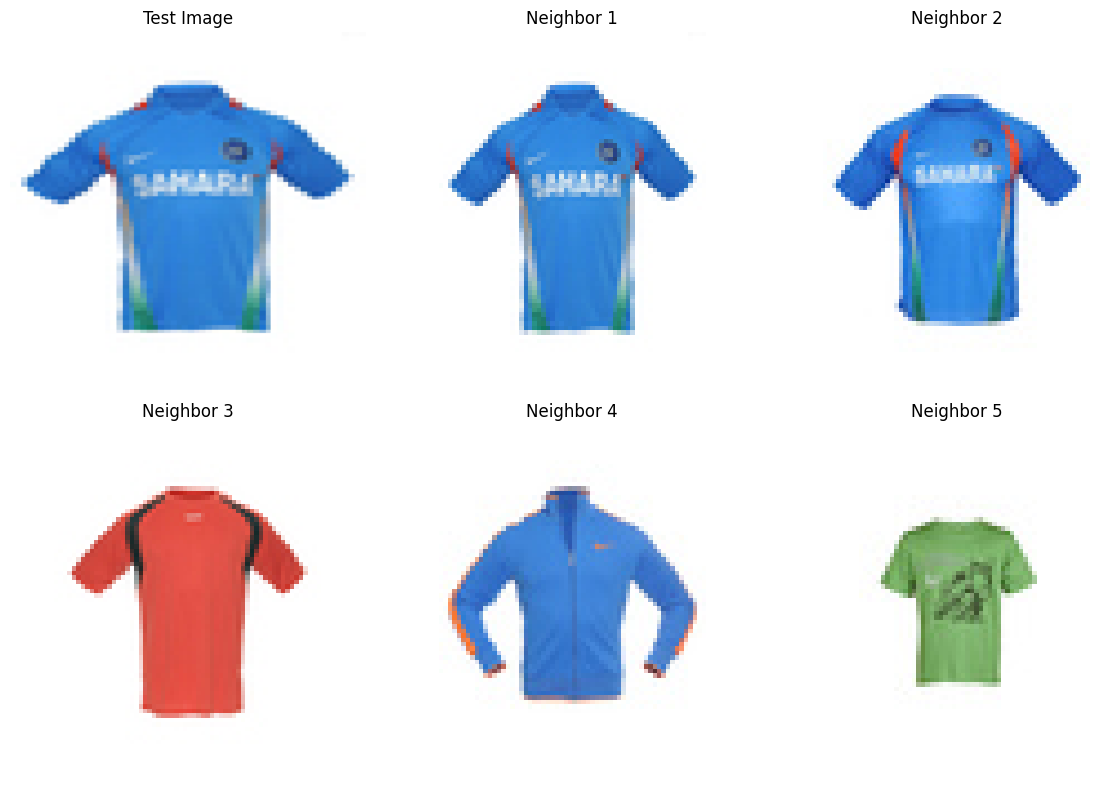

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import keras.applications.resnet
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from numpy.linalg import norm
import os
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow from Google Colab

# Initialize the ResNet model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a new model with GlobalMaxPooling2D
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D()
])

def extract_features(path, model):
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

# Specify the path to your image directory
path_images = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/images2'

filenames = []
for file in os.listdir(path_images):
    filenames.append(os.path.join(path_images, file))

feature_list = []

# Process images and extract features
for file in tqdm(filenames):
    feature_list.append(extract_features(file, model))

# Specify the path to your test image
test_image_path = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/test_image/1164.jpg'

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image_array = image.img_to_array(test_image)
expanded_test_image_array = np.expand_dims(test_image_array, axis=0)
preprocessed_test_image = preprocess_input(expanded_test_image_array)

# Extract features from the test image
test_result = model.predict(preprocessed_test_image).flatten()
normalized_test_result = test_result / norm(test_result)

# Fit the Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

# Find the nearest neighbors of the test image
distances, indices = neighbors.kneighbors([normalized_test_result])

print(indices)

# Display the nearest neighbor images
plt.figure(figsize=(12, 8))

# Display the test image
plt.subplot(2, 3, 1)
plt.imshow(test_image)
plt.title("Test Image")
plt.axis('off')

# Display the nearest neighbor images in a 2x3 grid
for i, file_index in enumerate(indices[0]):
    if i < 5:  # Display up to 5 nearest neighbors
        temp = cv2.imread(filenames[file_index])
        plt.subplot(2, 3, i+2)
        plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
        plt.title(f"Neighbor {i + 1}")
        plt.axis('off')

plt.tight_layout()
plt.show()


# INSIGHT is similary search using fixed test image

  0%|          | 0/600 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/600 [00:01<13:37,  1.36s/it]

1/1 [==============================] - 0s 187ms/step


  0%|          | 2/600 [00:01<07:01,  1.42it/s]

1/1 [==============================] - 0s 178ms/step


  0%|          | 3/600 [00:01<04:50,  2.05it/s]

1/1 [==============================] - 0s 303ms/step


  1%|          | 4/600 [00:02<04:27,  2.23it/s]

1/1 [==============================] - 0s 299ms/step


  1%|          | 5/600 [00:02<04:09,  2.38it/s]

1/1 [==============================] - 0s 298ms/step


  1%|          | 6/600 [00:02<04:05,  2.42it/s]

1/1 [==============================] - 1s 551ms/step


  1%|          | 7/600 [00:03<05:26,  1.82it/s]

1/1 [==============================] - 0s 298ms/step


  1%|▏         | 8/600 [00:04<05:12,  1.89it/s]

1/1 [==============================] - 0s 298ms/step


  2%|▏         | 9/600 [00:04<04:43,  2.09it/s]

1/1 [==============================] - 0s 306ms/step


  2%|▏         | 10/600 [00:05<04:23,  2.24it/s]

1/1 [==============================] - 0s 302ms/step


  2%|▏         | 11/600 [00:05<04:11,  2.34it/s]

1/1 [==============================] - 0s 301ms/step


  2%|▏         | 12/600 [00:05<04:00,  2.44it/s]

1/1 [==============================] - 0s 261ms/step


  2%|▏         | 13/600 [00:06<03:48,  2.57it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 14/600 [00:06<03:44,  2.62it/s]

1/1 [==============================] - 0s 168ms/step


  2%|▎         | 15/600 [00:06<03:16,  2.98it/s]

1/1 [==============================] - 0s 181ms/step


  3%|▎         | 16/600 [00:06<02:58,  3.28it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 17/600 [00:07<02:45,  3.53it/s]

1/1 [==============================] - 0s 188ms/step


  3%|▎         | 18/600 [00:07<02:37,  3.70it/s]

1/1 [==============================] - 0s 165ms/step


  3%|▎         | 19/600 [00:07<02:27,  3.94it/s]

1/1 [==============================] - 0s 173ms/step


  3%|▎         | 20/600 [00:07<02:21,  4.09it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▎         | 21/600 [00:08<02:19,  4.16it/s]

1/1 [==============================] - 0s 180ms/step


  4%|▎         | 22/600 [00:08<02:18,  4.17it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 23/600 [00:08<02:16,  4.23it/s]

1/1 [==============================] - 0s 167ms/step


  4%|▍         | 24/600 [00:08<02:14,  4.30it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 25/600 [00:09<02:13,  4.30it/s]

1/1 [==============================] - 0s 180ms/step


  4%|▍         | 26/600 [00:09<02:13,  4.29it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 27/600 [00:09<02:12,  4.32it/s]

1/1 [==============================] - 0s 165ms/step


  5%|▍         | 28/600 [00:09<02:09,  4.41it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▍         | 29/600 [00:09<02:09,  4.40it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▌         | 30/600 [00:10<02:34,  3.70it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▌         | 31/600 [00:10<02:28,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▌         | 32/600 [00:10<02:45,  3.43it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▌         | 33/600 [00:11<02:34,  3.67it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 34/600 [00:11<02:28,  3.81it/s]

1/1 [==============================] - 0s 167ms/step


  6%|▌         | 35/600 [00:11<02:20,  4.01it/s]

1/1 [==============================] - 0s 167ms/step


  6%|▌         | 36/600 [00:11<02:41,  3.49it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 37/600 [00:12<02:30,  3.75it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▋         | 38/600 [00:12<02:25,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▋         | 39/600 [00:12<02:20,  3.99it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 40/600 [00:13<02:41,  3.48it/s]

1/1 [==============================] - 0s 185ms/step


  7%|▋         | 41/600 [00:13<02:32,  3.67it/s]

1/1 [==============================] - 0s 166ms/step


  7%|▋         | 42/600 [00:13<02:22,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 43/600 [00:13<02:41,  3.45it/s]

1/1 [==============================] - 0s 183ms/step


  7%|▋         | 44/600 [00:14<02:31,  3.66it/s]

1/1 [==============================] - 0s 189ms/step


  8%|▊         | 45/600 [00:14<02:27,  3.77it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 46/600 [00:14<02:20,  3.95it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 47/600 [00:14<02:17,  4.03it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 48/600 [00:15<02:13,  4.12it/s]

1/1 [==============================] - 0s 185ms/step


  8%|▊         | 49/600 [00:15<02:34,  3.56it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 50/600 [00:15<02:25,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 51/600 [00:16<02:43,  3.36it/s]

1/1 [==============================] - 0s 290ms/step


  9%|▊         | 52/600 [00:16<02:57,  3.09it/s]

1/1 [==============================] - 0s 298ms/step


  9%|▉         | 53/600 [00:16<03:08,  2.90it/s]

1/1 [==============================] - 0s 307ms/step


  9%|▉         | 54/600 [00:17<03:12,  2.83it/s]

1/1 [==============================] - 0s 297ms/step


  9%|▉         | 55/600 [00:17<03:15,  2.79it/s]

1/1 [==============================] - 0s 300ms/step


  9%|▉         | 56/600 [00:17<03:16,  2.76it/s]

1/1 [==============================] - 0s 309ms/step


 10%|▉         | 57/600 [00:18<03:23,  2.67it/s]

1/1 [==============================] - 0s 335ms/step


 10%|▉         | 58/600 [00:18<03:28,  2.60it/s]

1/1 [==============================] - 0s 316ms/step


 10%|▉         | 59/600 [00:19<03:30,  2.57it/s]

1/1 [==============================] - 0s 308ms/step


 10%|█         | 60/600 [00:19<03:29,  2.58it/s]

1/1 [==============================] - 0s 304ms/step


 10%|█         | 61/600 [00:19<03:28,  2.59it/s]

1/1 [==============================] - 0s 293ms/step


 10%|█         | 62/600 [00:20<03:32,  2.53it/s]

1/1 [==============================] - 0s 188ms/step


 10%|█         | 63/600 [00:20<03:08,  2.85it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 64/600 [00:20<02:49,  3.16it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 65/600 [00:21<02:35,  3.44it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█         | 66/600 [00:21<02:25,  3.66it/s]

1/1 [==============================] - 0s 168ms/step


 11%|█         | 67/600 [00:21<02:40,  3.33it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█▏        | 68/600 [00:21<02:50,  3.13it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 69/600 [00:22<02:36,  3.40it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 70/600 [00:22<02:26,  3.63it/s]

1/1 [==============================] - 0s 188ms/step


 12%|█▏        | 71/600 [00:22<02:20,  3.76it/s]

1/1 [==============================] - 0s 193ms/step


 12%|█▏        | 72/600 [00:22<02:18,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 73/600 [00:23<02:14,  3.91it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 74/600 [00:23<02:09,  4.05it/s]

1/1 [==============================] - 0s 185ms/step


 12%|█▎        | 75/600 [00:23<02:08,  4.10it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 76/600 [00:23<02:05,  4.18it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 77/600 [00:24<02:05,  4.15it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 78/600 [00:24<02:03,  4.21it/s]

1/1 [==============================] - 0s 168ms/step


 13%|█▎        | 79/600 [00:24<02:01,  4.31it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 80/600 [00:24<02:02,  4.24it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▎        | 81/600 [00:25<02:01,  4.26it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▎        | 82/600 [00:25<02:01,  4.28it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 83/600 [00:25<01:58,  4.35it/s]

1/1 [==============================] - 0s 180ms/step


 14%|█▍        | 84/600 [00:25<01:59,  4.30it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 85/600 [00:25<01:58,  4.36it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▍        | 86/600 [00:26<01:58,  4.34it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 87/600 [00:26<01:58,  4.33it/s]

1/1 [==============================] - 0s 192ms/step


 15%|█▍        | 88/600 [00:26<02:01,  4.22it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▍        | 89/600 [00:26<02:00,  4.25it/s]

1/1 [==============================] - 0s 185ms/step


 15%|█▌        | 90/600 [00:27<02:01,  4.21it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 91/600 [00:27<02:20,  3.61it/s]

1/1 [==============================] - 0s 182ms/step


 15%|█▌        | 92/600 [00:27<02:14,  3.78it/s]

1/1 [==============================] - 0s 171ms/step


 16%|█▌        | 93/600 [00:27<02:09,  3.93it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 94/600 [00:28<02:05,  4.04it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 95/600 [00:28<02:01,  4.14it/s]

1/1 [==============================] - 0s 171ms/step


 16%|█▌        | 96/600 [00:28<02:00,  4.19it/s]

1/1 [==============================] - 0s 185ms/step


 16%|█▌        | 97/600 [00:29<02:20,  3.57it/s]

1/1 [==============================] - 0s 184ms/step


 16%|█▋        | 98/600 [00:29<02:34,  3.26it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▋        | 99/600 [00:29<02:22,  3.52it/s]

1/1 [==============================] - 0s 188ms/step


 17%|█▋        | 100/600 [00:30<02:34,  3.23it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 101/600 [00:30<02:23,  3.49it/s]

1/1 [==============================] - 0s 302ms/step


 17%|█▋        | 102/600 [00:30<02:34,  3.22it/s]

1/1 [==============================] - 0s 319ms/step


 17%|█▋        | 103/600 [00:31<02:47,  2.96it/s]

1/1 [==============================] - 0s 302ms/step


 17%|█▋        | 104/600 [00:31<02:56,  2.81it/s]

1/1 [==============================] - 0s 300ms/step


 18%|█▊        | 105/600 [00:31<03:03,  2.70it/s]

1/1 [==============================] - 0s 309ms/step


 18%|█▊        | 106/600 [00:32<03:05,  2.66it/s]

1/1 [==============================] - 0s 310ms/step


 18%|█▊        | 107/600 [00:32<03:06,  2.64it/s]

1/1 [==============================] - 0s 310ms/step


 18%|█▊        | 108/600 [00:32<03:09,  2.60it/s]

1/1 [==============================] - 0s 303ms/step


 18%|█▊        | 109/600 [00:33<03:07,  2.61it/s]

1/1 [==============================] - 0s 293ms/step


 18%|█▊        | 110/600 [00:33<03:04,  2.65it/s]

1/1 [==============================] - 0s 305ms/step


 18%|█▊        | 111/600 [00:34<03:05,  2.64it/s]

1/1 [==============================] - 0s 297ms/step


 19%|█▊        | 112/600 [00:34<03:04,  2.64it/s]

1/1 [==============================] - 0s 182ms/step


 19%|█▉        | 113/600 [00:34<02:43,  2.98it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▉        | 114/600 [00:34<02:27,  3.30it/s]

1/1 [==============================] - 0s 183ms/step


 19%|█▉        | 115/600 [00:35<02:18,  3.51it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▉        | 116/600 [00:35<02:08,  3.75it/s]

1/1 [==============================] - 0s 173ms/step


 20%|█▉        | 117/600 [00:35<02:22,  3.38it/s]

1/1 [==============================] - 0s 183ms/step


 20%|█▉        | 118/600 [00:36<02:13,  3.61it/s]

1/1 [==============================] - 0s 173ms/step


 20%|█▉        | 119/600 [00:36<02:06,  3.79it/s]

1/1 [==============================] - 0s 178ms/step


 20%|██        | 120/600 [00:36<02:03,  3.90it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 121/600 [00:36<01:59,  4.02it/s]

1/1 [==============================] - 0s 180ms/step


 20%|██        | 122/600 [00:36<01:57,  4.08it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 123/600 [00:37<01:56,  4.10it/s]

1/1 [==============================] - 0s 180ms/step


 21%|██        | 124/600 [00:37<01:54,  4.14it/s]

1/1 [==============================] - 0s 166ms/step


 21%|██        | 125/600 [00:37<01:50,  4.28it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 126/600 [00:37<01:50,  4.29it/s]

1/1 [==============================] - 0s 185ms/step


 21%|██        | 127/600 [00:38<01:51,  4.25it/s]

1/1 [==============================] - 0s 188ms/step


 21%|██▏       | 128/600 [00:38<01:53,  4.17it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 129/600 [00:38<02:11,  3.59it/s]

1/1 [==============================] - 0s 168ms/step


 22%|██▏       | 130/600 [00:38<02:03,  3.82it/s]

1/1 [==============================] - 0s 192ms/step


 22%|██▏       | 131/600 [00:39<02:00,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 132/600 [00:39<01:56,  4.02it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 133/600 [00:39<01:53,  4.12it/s]

1/1 [==============================] - 0s 169ms/step


 22%|██▏       | 134/600 [00:40<02:10,  3.58it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▎       | 135/600 [00:40<02:04,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 136/600 [00:40<02:19,  3.32it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 137/600 [00:40<02:09,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


 23%|██▎       | 138/600 [00:41<02:03,  3.73it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 139/600 [00:41<01:57,  3.91it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 140/600 [00:41<01:53,  4.04it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▎       | 141/600 [00:41<01:49,  4.18it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██▎       | 142/600 [00:42<01:49,  4.19it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 143/600 [00:42<01:48,  4.21it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▍       | 144/600 [00:42<01:48,  4.20it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 145/600 [00:42<01:47,  4.24it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██▍       | 146/600 [00:42<01:47,  4.24it/s]

1/1 [==============================] - 0s 189ms/step


 24%|██▍       | 147/600 [00:43<01:48,  4.19it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▍       | 148/600 [00:43<01:46,  4.24it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▍       | 149/600 [00:43<01:45,  4.28it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▌       | 150/600 [00:44<02:03,  3.64it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▌       | 151/600 [00:44<01:58,  3.80it/s]

1/1 [==============================] - 0s 193ms/step


 25%|██▌       | 152/600 [00:44<02:12,  3.38it/s]

1/1 [==============================] - 0s 307ms/step


 26%|██▌       | 153/600 [00:45<02:24,  3.10it/s]

1/1 [==============================] - 0s 294ms/step


 26%|██▌       | 154/600 [00:45<02:35,  2.86it/s]

1/1 [==============================] - 0s 291ms/step


 26%|██▌       | 155/600 [00:45<02:37,  2.82it/s]

1/1 [==============================] - 0s 302ms/step


 26%|██▌       | 156/600 [00:46<02:45,  2.69it/s]

1/1 [==============================] - 0s 301ms/step


 26%|██▌       | 157/600 [00:46<02:49,  2.61it/s]

1/1 [==============================] - 0s 310ms/step


 26%|██▋       | 158/600 [00:47<02:50,  2.59it/s]

1/1 [==============================] - 0s 305ms/step


 26%|██▋       | 159/600 [00:47<02:51,  2.57it/s]

1/1 [==============================] - 0s 309ms/step


 27%|██▋       | 160/600 [00:47<02:54,  2.52it/s]

1/1 [==============================] - 0s 310ms/step


 27%|██▋       | 161/600 [00:48<02:51,  2.56it/s]

1/1 [==============================] - 0s 306ms/step


 27%|██▋       | 162/600 [00:48<02:52,  2.54it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 163/600 [00:48<02:30,  2.90it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 164/600 [00:49<02:15,  3.22it/s]

1/1 [==============================] - 0s 180ms/step


 28%|██▊       | 165/600 [00:49<02:04,  3.48it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 166/600 [00:49<01:57,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██▊       | 167/600 [00:49<01:52,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 28%|██▊       | 168/600 [00:50<01:48,  3.97it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 169/600 [00:50<01:45,  4.07it/s]

1/1 [==============================] - 0s 183ms/step


 28%|██▊       | 170/600 [00:50<01:45,  4.08it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 171/600 [00:50<01:42,  4.19it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▊       | 172/600 [00:50<01:40,  4.27it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 173/600 [00:51<01:40,  4.26it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 174/600 [00:51<01:39,  4.30it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 175/600 [00:51<01:56,  3.63it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██▉       | 176/600 [00:52<01:52,  3.77it/s]

1/1 [==============================] - 0s 171ms/step


 30%|██▉       | 177/600 [00:52<01:48,  3.91it/s]

1/1 [==============================] - 0s 188ms/step


 30%|██▉       | 178/600 [00:52<01:46,  3.98it/s]

1/1 [==============================] - 0s 169ms/step


 30%|██▉       | 179/600 [00:52<01:42,  4.11it/s]

1/1 [==============================] - 0s 208ms/step


 30%|███       | 180/600 [00:53<01:57,  3.56it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███       | 181/600 [00:53<01:51,  3.77it/s]

1/1 [==============================] - 0s 185ms/step


 30%|███       | 182/600 [00:53<01:47,  3.88it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███       | 183/600 [00:53<01:43,  4.04it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 184/600 [00:54<01:43,  4.03it/s]

1/1 [==============================] - 0s 193ms/step


 31%|███       | 185/600 [00:54<01:43,  4.00it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 186/600 [00:54<01:41,  4.08it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 187/600 [00:54<01:39,  4.15it/s]

1/1 [==============================] - 0s 193ms/step


 31%|███▏      | 188/600 [00:55<01:54,  3.59it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 189/600 [00:55<01:47,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


 32%|███▏      | 190/600 [00:55<02:01,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 191/600 [00:56<02:09,  3.16it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 192/600 [00:56<02:16,  2.99it/s]

1/1 [==============================] - 0s 181ms/step


 32%|███▏      | 193/600 [00:56<02:04,  3.27it/s]

1/1 [==============================] - 0s 176ms/step


 32%|███▏      | 194/600 [00:56<01:55,  3.52it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▎      | 195/600 [00:57<01:48,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 196/600 [00:57<01:43,  3.90it/s]

1/1 [==============================] - 0s 186ms/step


 33%|███▎      | 197/600 [00:57<01:56,  3.45it/s]

1/1 [==============================] - 0s 178ms/step


 33%|███▎      | 198/600 [00:58<02:05,  3.20it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 199/600 [00:58<02:12,  3.02it/s]

1/1 [==============================] - 0s 265ms/step


 33%|███▎      | 200/600 [00:58<02:17,  2.91it/s]

1/1 [==============================] - 0s 295ms/step


 34%|███▎      | 201/600 [00:59<02:20,  2.83it/s]

1/1 [==============================] - 0s 297ms/step


 34%|███▎      | 202/600 [00:59<02:22,  2.79it/s]

1/1 [==============================] - 0s 299ms/step


 34%|███▍      | 203/600 [00:59<02:24,  2.74it/s]

1/1 [==============================] - 0s 302ms/step


 34%|███▍      | 204/600 [01:00<02:30,  2.63it/s]

1/1 [==============================] - 0s 301ms/step


 34%|███▍      | 205/600 [01:00<02:28,  2.66it/s]

1/1 [==============================] - 0s 305ms/step


 34%|███▍      | 206/600 [01:01<02:29,  2.64it/s]

1/1 [==============================] - 0s 297ms/step


 34%|███▍      | 207/600 [01:01<02:31,  2.60it/s]

1/1 [==============================] - 0s 325ms/step


 35%|███▍      | 208/600 [01:01<02:33,  2.56it/s]

1/1 [==============================] - 0s 309ms/step


 35%|███▍      | 209/600 [01:02<02:32,  2.56it/s]

1/1 [==============================] - 0s 302ms/step


 35%|███▌      | 210/600 [01:02<02:33,  2.54it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███▌      | 211/600 [01:03<02:17,  2.83it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███▌      | 212/600 [01:03<02:02,  3.16it/s]

1/1 [==============================] - 0s 181ms/step


 36%|███▌      | 213/600 [01:03<01:53,  3.40it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 214/600 [01:03<01:46,  3.64it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▌      | 215/600 [01:03<01:41,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 36%|███▌      | 216/600 [01:04<01:38,  3.90it/s]

1/1 [==============================] - 0s 180ms/step


 36%|███▌      | 217/600 [01:04<01:36,  3.96it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███▋      | 218/600 [01:04<01:34,  4.06it/s]

1/1 [==============================] - 0s 186ms/step


 36%|███▋      | 219/600 [01:05<01:47,  3.53it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 220/600 [01:05<01:42,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 37%|███▋      | 221/600 [01:05<01:37,  3.88it/s]

1/1 [==============================] - 0s 178ms/step


 37%|███▋      | 222/600 [01:05<01:35,  3.97it/s]

1/1 [==============================] - 0s 182ms/step


 37%|███▋      | 223/600 [01:05<01:33,  4.02it/s]

1/1 [==============================] - 0s 183ms/step


 37%|███▋      | 224/600 [01:06<01:32,  4.07it/s]

1/1 [==============================] - 0s 172ms/step


 38%|███▊      | 225/600 [01:06<01:31,  4.09it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 226/600 [01:06<01:30,  4.15it/s]

1/1 [==============================] - 0s 174ms/step


 38%|███▊      | 227/600 [01:07<01:44,  3.58it/s]

1/1 [==============================] - 0s 168ms/step


 38%|███▊      | 228/600 [01:07<01:54,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 38%|███▊      | 229/600 [01:07<01:44,  3.54it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 230/600 [01:07<01:39,  3.73it/s]

1/1 [==============================] - 0s 188ms/step


 38%|███▊      | 231/600 [01:08<01:52,  3.28it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▊      | 232/600 [01:08<01:59,  3.08it/s]

1/1 [==============================] - 0s 179ms/step


 39%|███▉      | 233/600 [01:08<01:49,  3.34it/s]

1/1 [==============================] - 0s 180ms/step


 39%|███▉      | 234/600 [01:09<01:43,  3.55it/s]

1/1 [==============================] - 0s 179ms/step


 39%|███▉      | 235/600 [01:09<01:37,  3.74it/s]

1/1 [==============================] - 0s 169ms/step


 39%|███▉      | 236/600 [01:09<01:33,  3.91it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███▉      | 237/600 [01:09<01:29,  4.04it/s]

1/1 [==============================] - 0s 183ms/step


 40%|███▉      | 238/600 [01:10<01:29,  4.06it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 239/600 [01:10<01:26,  4.15it/s]

1/1 [==============================] - 0s 179ms/step


 40%|████      | 240/600 [01:10<01:40,  3.58it/s]

1/1 [==============================] - 0s 176ms/step


 40%|████      | 241/600 [01:10<01:35,  3.75it/s]

1/1 [==============================] - 0s 191ms/step


 40%|████      | 242/600 [01:11<01:34,  3.80it/s]

1/1 [==============================] - 0s 182ms/step


 40%|████      | 243/600 [01:11<01:45,  3.37it/s]

1/1 [==============================] - 0s 169ms/step


 41%|████      | 244/600 [01:11<01:53,  3.14it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 245/600 [01:12<01:58,  3.00it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 246/600 [01:12<02:01,  2.90it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████      | 247/600 [01:12<01:53,  3.12it/s]

1/1 [==============================] - 0s 321ms/step


 41%|████▏     | 248/600 [01:13<02:02,  2.87it/s]

1/1 [==============================] - 0s 302ms/step


 42%|████▏     | 249/600 [01:13<02:05,  2.79it/s]

1/1 [==============================] - 0s 315ms/step


 42%|████▏     | 250/600 [01:14<03:07,  1.87it/s]

1/1 [==============================] - 0s 314ms/step


 42%|████▏     | 251/600 [01:15<02:54,  2.00it/s]

1/1 [==============================] - 0s 332ms/step


 42%|████▏     | 252/600 [01:15<02:44,  2.11it/s]

1/1 [==============================] - 0s 306ms/step


 42%|████▏     | 253/600 [01:15<02:37,  2.20it/s]

1/1 [==============================] - 0s 313ms/step


 42%|████▏     | 254/600 [01:16<02:31,  2.28it/s]

1/1 [==============================] - 0s 311ms/step


 42%|████▎     | 255/600 [01:16<02:28,  2.32it/s]

1/1 [==============================] - 0s 278ms/step


 43%|████▎     | 256/600 [01:17<02:21,  2.43it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 257/600 [01:17<02:18,  2.48it/s]

1/1 [==============================] - 0s 185ms/step


 43%|████▎     | 258/600 [01:17<02:02,  2.80it/s]

1/1 [==============================] - 0s 190ms/step


 43%|████▎     | 259/600 [01:18<02:04,  2.75it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 260/600 [01:18<01:53,  3.00it/s]

1/1 [==============================] - 0s 183ms/step


 44%|████▎     | 261/600 [01:18<01:58,  2.86it/s]

1/1 [==============================] - 0s 186ms/step


 44%|████▎     | 262/600 [01:19<02:01,  2.78it/s]

1/1 [==============================] - 0s 185ms/step


 44%|████▍     | 263/600 [01:19<01:50,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▍     | 264/600 [01:19<01:45,  3.19it/s]

1/1 [==============================] - 0s 310ms/step


 44%|████▍     | 265/600 [01:20<01:53,  2.94it/s]

1/1 [==============================] - 0s 321ms/step


 44%|████▍     | 266/600 [01:20<02:01,  2.74it/s]

1/1 [==============================] - 0s 308ms/step


 44%|████▍     | 267/600 [01:20<02:05,  2.66it/s]

1/1 [==============================] - 0s 330ms/step


 45%|████▍     | 268/600 [01:21<02:08,  2.58it/s]

1/1 [==============================] - 0s 314ms/step


 45%|████▍     | 269/600 [01:21<02:10,  2.54it/s]

1/1 [==============================] - 0s 323ms/step


 45%|████▌     | 270/600 [01:22<02:13,  2.47it/s]

1/1 [==============================] - 0s 311ms/step


 45%|████▌     | 271/600 [01:22<02:13,  2.46it/s]

1/1 [==============================] - 0s 322ms/step


 45%|████▌     | 272/600 [01:22<02:15,  2.42it/s]

1/1 [==============================] - 0s 332ms/step


 46%|████▌     | 273/600 [01:23<02:46,  1.96it/s]

1/1 [==============================] - 0s 193ms/step


 46%|████▌     | 274/600 [01:24<02:35,  2.10it/s]

1/1 [==============================] - 0s 189ms/step


 46%|████▌     | 275/600 [01:24<02:13,  2.44it/s]

1/1 [==============================] - 0s 182ms/step


 46%|████▌     | 276/600 [01:24<01:57,  2.76it/s]

1/1 [==============================] - 0s 182ms/step


 46%|████▌     | 277/600 [01:24<01:46,  3.02it/s]

1/1 [==============================] - 0s 190ms/step


 46%|████▋     | 278/600 [01:25<01:51,  2.90it/s]

1/1 [==============================] - 0s 190ms/step


 46%|████▋     | 279/600 [01:25<01:53,  2.82it/s]

1/1 [==============================] - 0s 189ms/step


 47%|████▋     | 280/600 [01:26<01:56,  2.75it/s]

1/1 [==============================] - 0s 178ms/step


 47%|████▋     | 281/600 [01:26<01:56,  2.73it/s]

1/1 [==============================] - 0s 182ms/step


 47%|████▋     | 282/600 [01:26<01:58,  2.68it/s]

1/1 [==============================] - 0s 180ms/step


 47%|████▋     | 283/600 [01:27<01:45,  3.01it/s]

1/1 [==============================] - 0s 315ms/step


 47%|████▋     | 284/600 [01:27<01:52,  2.81it/s]

1/1 [==============================] - 0s 324ms/step


 48%|████▊     | 285/600 [01:27<01:57,  2.69it/s]

1/1 [==============================] - 0s 320ms/step


 48%|████▊     | 286/600 [01:28<02:00,  2.61it/s]

1/1 [==============================] - 0s 317ms/step


 48%|████▊     | 287/600 [01:28<02:02,  2.56it/s]

1/1 [==============================] - 0s 304ms/step


 48%|████▊     | 288/600 [01:29<02:01,  2.57it/s]

1/1 [==============================] - 0s 306ms/step


 48%|████▊     | 289/600 [01:29<02:01,  2.55it/s]

1/1 [==============================] - 0s 305ms/step


 48%|████▊     | 290/600 [01:29<02:05,  2.47it/s]

1/1 [==============================] - 0s 315ms/step


 48%|████▊     | 291/600 [01:30<02:04,  2.48it/s]

1/1 [==============================] - 0s 306ms/step


 49%|████▊     | 292/600 [01:30<02:02,  2.52it/s]

1/1 [==============================] - 0s 313ms/step


 49%|████▉     | 293/600 [01:31<02:01,  2.52it/s]

1/1 [==============================] - 0s 246ms/step


 49%|████▉     | 294/600 [01:31<01:54,  2.66it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 295/600 [01:31<01:41,  3.00it/s]

1/1 [==============================] - 0s 181ms/step


 49%|████▉     | 296/600 [01:31<01:32,  3.28it/s]

1/1 [==============================] - 0s 190ms/step


 50%|████▉     | 297/600 [01:32<01:39,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


 50%|████▉     | 298/600 [01:32<01:31,  3.32it/s]

1/1 [==============================] - 0s 179ms/step


 50%|████▉     | 299/600 [01:32<01:37,  3.09it/s]

1/1 [==============================] - 0s 187ms/step


 50%|█████     | 300/600 [01:33<01:41,  2.96it/s]

1/1 [==============================] - 0s 179ms/step


 50%|█████     | 301/600 [01:33<01:31,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 50%|█████     | 302/600 [01:33<01:25,  3.48it/s]

1/1 [==============================] - 0s 173ms/step


 50%|█████     | 303/600 [01:33<01:20,  3.69it/s]

1/1 [==============================] - 0s 195ms/step


 51%|█████     | 304/600 [01:34<01:30,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 305/600 [01:34<01:23,  3.53it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 306/600 [01:34<01:20,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 51%|█████     | 307/600 [01:35<01:17,  3.78it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████▏    | 308/600 [01:35<01:14,  3.90it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 309/600 [01:35<01:13,  3.97it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 310/600 [01:35<01:11,  4.06it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 311/600 [01:36<01:11,  4.03it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 312/600 [01:36<01:22,  3.47it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 313/600 [01:36<01:17,  3.68it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 314/600 [01:36<01:15,  3.79it/s]

1/1 [==============================] - 0s 190ms/step


 52%|█████▎    | 315/600 [01:37<01:24,  3.37it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 316/600 [01:37<01:30,  3.14it/s]

1/1 [==============================] - 0s 169ms/step


 53%|█████▎    | 317/600 [01:37<01:22,  3.42it/s]

1/1 [==============================] - 0s 185ms/step


 53%|█████▎    | 318/600 [01:38<01:18,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 53%|█████▎    | 319/600 [01:38<01:16,  3.68it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 320/600 [01:38<01:12,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▎    | 321/600 [01:38<01:11,  3.91it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▎    | 322/600 [01:39<01:21,  3.42it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▍    | 323/600 [01:39<01:15,  3.66it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 324/600 [01:39<01:12,  3.79it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▍    | 325/600 [01:39<01:10,  3.93it/s]

1/1 [==============================] - 0s 187ms/step


 54%|█████▍    | 326/600 [01:40<01:08,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 55%|█████▍    | 327/600 [01:40<01:07,  4.02it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 328/600 [01:40<01:06,  4.07it/s]

1/1 [==============================] - 0s 168ms/step


 55%|█████▍    | 329/600 [01:40<01:16,  3.55it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▌    | 330/600 [01:41<01:12,  3.71it/s]

1/1 [==============================] - 0s 287ms/step


 55%|█████▌    | 331/600 [01:41<01:19,  3.37it/s]

1/1 [==============================] - 0s 299ms/step


 55%|█████▌    | 332/600 [01:41<01:25,  3.13it/s]

1/1 [==============================] - 0s 316ms/step


 56%|█████▌    | 333/600 [01:42<01:31,  2.93it/s]

1/1 [==============================] - 0s 295ms/step


 56%|█████▌    | 334/600 [01:42<01:33,  2.85it/s]

1/1 [==============================] - 0s 317ms/step


 56%|█████▌    | 335/600 [01:43<01:37,  2.72it/s]

1/1 [==============================] - 0s 303ms/step


 56%|█████▌    | 336/600 [01:43<01:37,  2.70it/s]

1/1 [==============================] - 0s 299ms/step


 56%|█████▌    | 337/600 [01:43<01:39,  2.66it/s]

1/1 [==============================] - 0s 291ms/step


 56%|█████▋    | 338/600 [01:44<01:41,  2.58it/s]

1/1 [==============================] - 0s 290ms/step


 56%|█████▋    | 339/600 [01:44<01:43,  2.51it/s]

1/1 [==============================] - 0s 295ms/step


 57%|█████▋    | 340/600 [01:45<01:40,  2.58it/s]

1/1 [==============================] - 0s 295ms/step


 57%|█████▋    | 341/600 [01:45<01:41,  2.56it/s]

1/1 [==============================] - 0s 186ms/step


 57%|█████▋    | 342/600 [01:45<01:30,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 343/600 [01:45<01:21,  3.16it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 344/600 [01:46<01:14,  3.42it/s]

1/1 [==============================] - 0s 182ms/step


 57%|█████▊    | 345/600 [01:46<01:10,  3.62it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 346/600 [01:46<01:07,  3.77it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 347/600 [01:46<01:04,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 348/600 [01:47<01:04,  3.94it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 349/600 [01:47<01:02,  4.01it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████▊    | 350/600 [01:47<01:01,  4.05it/s]

1/1 [==============================] - 0s 189ms/step


 58%|█████▊    | 351/600 [01:47<01:01,  4.04it/s]

1/1 [==============================] - 0s 173ms/step


 59%|█████▊    | 352/600 [01:48<01:10,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 59%|█████▉    | 353/600 [01:48<01:06,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


 59%|█████▉    | 354/600 [01:48<01:03,  3.86it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▉    | 355/600 [01:48<01:00,  4.02it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████▉    | 356/600 [01:49<00:59,  4.10it/s]

1/1 [==============================] - 0s 172ms/step


 60%|█████▉    | 357/600 [01:49<00:58,  4.18it/s]

1/1 [==============================] - 0s 191ms/step


 60%|█████▉    | 358/600 [01:49<00:58,  4.14it/s]

1/1 [==============================] - 0s 177ms/step


 60%|█████▉    | 359/600 [01:49<00:57,  4.16it/s]

1/1 [==============================] - 0s 183ms/step


 60%|██████    | 360/600 [01:50<00:58,  4.12it/s]

1/1 [==============================] - 0s 173ms/step


 60%|██████    | 361/600 [01:50<00:57,  4.17it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████    | 362/600 [01:50<00:58,  4.08it/s]

1/1 [==============================] - 0s 180ms/step


 60%|██████    | 363/600 [01:51<01:06,  3.55it/s]

1/1 [==============================] - 0s 171ms/step


 61%|██████    | 364/600 [01:51<01:12,  3.26it/s]

1/1 [==============================] - 0s 179ms/step


 61%|██████    | 365/600 [01:51<01:06,  3.51it/s]

1/1 [==============================] - 0s 171ms/step


 61%|██████    | 366/600 [01:51<01:02,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████    | 367/600 [01:52<00:59,  3.91it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████▏   | 368/600 [01:52<00:58,  3.96it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▏   | 369/600 [01:52<00:57,  4.05it/s]

1/1 [==============================] - 0s 171ms/step


 62%|██████▏   | 370/600 [01:52<00:56,  4.07it/s]

1/1 [==============================] - 0s 176ms/step


 62%|██████▏   | 371/600 [01:53<00:55,  4.11it/s]

1/1 [==============================] - 0s 179ms/step


 62%|██████▏   | 372/600 [01:53<00:55,  4.11it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 373/600 [01:53<00:55,  4.12it/s]

1/1 [==============================] - 0s 196ms/step


 62%|██████▏   | 374/600 [01:53<01:03,  3.56it/s]

1/1 [==============================] - 0s 177ms/step


 62%|██████▎   | 375/600 [01:54<01:00,  3.74it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 376/600 [01:54<00:57,  3.89it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 377/600 [01:54<00:55,  3.98it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 378/600 [01:54<00:55,  4.02it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 379/600 [01:55<00:54,  4.06it/s]

1/1 [==============================] - 0s 168ms/step


 63%|██████▎   | 380/600 [01:55<00:52,  4.15it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▎   | 381/600 [01:55<01:01,  3.55it/s]

1/1 [==============================] - 0s 292ms/step


 64%|██████▎   | 382/600 [01:56<01:09,  3.16it/s]

1/1 [==============================] - 0s 304ms/step


 64%|██████▍   | 383/600 [01:56<01:14,  2.92it/s]

1/1 [==============================] - 0s 322ms/step


 64%|██████▍   | 384/600 [01:56<01:18,  2.77it/s]

1/1 [==============================] - 0s 302ms/step


 64%|██████▍   | 385/600 [01:57<01:20,  2.66it/s]

1/1 [==============================] - 0s 300ms/step


 64%|██████▍   | 386/600 [01:57<01:22,  2.59it/s]

1/1 [==============================] - 0s 307ms/step


 64%|██████▍   | 387/600 [01:58<01:22,  2.58it/s]

1/1 [==============================] - 0s 291ms/step


 65%|██████▍   | 388/600 [01:58<01:21,  2.61it/s]

1/1 [==============================] - 0s 315ms/step


 65%|██████▍   | 389/600 [01:58<01:22,  2.55it/s]

1/1 [==============================] - 0s 305ms/step


 65%|██████▌   | 390/600 [01:59<01:21,  2.57it/s]

1/1 [==============================] - 0s 300ms/step


 65%|██████▌   | 391/600 [01:59<01:20,  2.58it/s]

1/1 [==============================] - 0s 203ms/step


 65%|██████▌   | 392/600 [01:59<01:14,  2.80it/s]

1/1 [==============================] - 0s 175ms/step


 66%|██████▌   | 393/600 [02:00<01:06,  3.12it/s]

1/1 [==============================] - 0s 171ms/step


 66%|██████▌   | 394/600 [02:00<01:00,  3.38it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▌   | 395/600 [02:00<00:56,  3.62it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▌   | 396/600 [02:01<01:02,  3.28it/s]

1/1 [==============================] - 0s 173ms/step


 66%|██████▌   | 397/600 [02:01<00:57,  3.52it/s]

1/1 [==============================] - 0s 171ms/step


 66%|██████▋   | 398/600 [02:01<00:53,  3.75it/s]

1/1 [==============================] - 0s 173ms/step


 66%|██████▋   | 399/600 [02:01<00:51,  3.88it/s]

1/1 [==============================] - 0s 186ms/step


 67%|██████▋   | 400/600 [02:02<00:58,  3.43it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 401/600 [02:02<01:02,  3.18it/s]

1/1 [==============================] - 0s 173ms/step


 67%|██████▋   | 402/600 [02:02<01:05,  3.00it/s]

1/1 [==============================] - 0s 190ms/step


 67%|██████▋   | 403/600 [02:03<01:00,  3.27it/s]

1/1 [==============================] - 0s 173ms/step


 67%|██████▋   | 404/600 [02:03<00:55,  3.51it/s]

1/1 [==============================] - 0s 170ms/step


 68%|██████▊   | 405/600 [02:03<00:52,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 68%|██████▊   | 406/600 [02:03<00:58,  3.33it/s]

1/1 [==============================] - 0s 185ms/step


 68%|██████▊   | 407/600 [02:04<00:54,  3.51it/s]

1/1 [==============================] - 0s 178ms/step


 68%|██████▊   | 408/600 [02:04<00:51,  3.70it/s]

1/1 [==============================] - 0s 171ms/step


 68%|██████▊   | 409/600 [02:04<00:49,  3.86it/s]

1/1 [==============================] - 0s 178ms/step


 68%|██████▊   | 410/600 [02:04<00:48,  3.93it/s]

1/1 [==============================] - 0s 185ms/step


 68%|██████▊   | 411/600 [02:05<00:54,  3.45it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▊   | 412/600 [02:05<00:51,  3.65it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 413/600 [02:05<00:49,  3.77it/s]

1/1 [==============================] - 0s 173ms/step


 69%|██████▉   | 414/600 [02:06<00:55,  3.38it/s]

1/1 [==============================] - 0s 172ms/step


 69%|██████▉   | 415/600 [02:06<00:51,  3.62it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 416/600 [02:06<00:48,  3.78it/s]

1/1 [==============================] - 0s 171ms/step


 70%|██████▉   | 417/600 [02:06<00:46,  3.92it/s]

1/1 [==============================] - 0s 188ms/step


 70%|██████▉   | 418/600 [02:07<00:53,  3.40it/s]

1/1 [==============================] - 0s 183ms/step


 70%|██████▉   | 419/600 [02:07<00:50,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 70%|███████   | 420/600 [02:07<00:47,  3.80it/s]

1/1 [==============================] - 0s 170ms/step


 70%|███████   | 421/600 [02:07<00:45,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


 70%|███████   | 422/600 [02:08<00:45,  3.95it/s]

1/1 [==============================] - 0s 177ms/step


 70%|███████   | 423/600 [02:08<00:44,  4.01it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████   | 424/600 [02:08<00:50,  3.49it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████   | 425/600 [02:09<00:54,  3.22it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 426/600 [02:09<00:50,  3.46it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 427/600 [02:09<00:47,  3.67it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████▏  | 428/600 [02:09<00:45,  3.81it/s]

1/1 [==============================] - 0s 308ms/step


 72%|███████▏  | 429/600 [02:10<00:52,  3.28it/s]

1/1 [==============================] - 0s 312ms/step


 72%|███████▏  | 430/600 [02:10<00:56,  3.03it/s]

1/1 [==============================] - 0s 306ms/step


 72%|███████▏  | 431/600 [02:11<00:58,  2.87it/s]

1/1 [==============================] - 0s 307ms/step


 72%|███████▏  | 432/600 [02:11<01:01,  2.71it/s]

1/1 [==============================] - 0s 297ms/step


 72%|███████▏  | 433/600 [02:11<01:02,  2.66it/s]

1/1 [==============================] - 0s 301ms/step


 72%|███████▏  | 434/600 [02:12<01:03,  2.59it/s]

1/1 [==============================] - 0s 294ms/step


 72%|███████▎  | 435/600 [02:12<01:04,  2.58it/s]

1/1 [==============================] - 0s 296ms/step


 73%|███████▎  | 436/600 [02:13<01:02,  2.61it/s]

1/1 [==============================] - 0s 300ms/step


 73%|███████▎  | 437/600 [02:13<01:01,  2.63it/s]

1/1 [==============================] - 0s 284ms/step


 73%|███████▎  | 438/600 [02:13<01:02,  2.59it/s]

1/1 [==============================] - 0s 280ms/step


 73%|███████▎  | 439/600 [02:14<01:02,  2.57it/s]

1/1 [==============================] - 0s 188ms/step


 73%|███████▎  | 440/600 [02:14<01:01,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▎  | 441/600 [02:14<00:53,  2.97it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▎  | 442/600 [02:15<00:48,  3.26it/s]

1/1 [==============================] - 0s 182ms/step


 74%|███████▍  | 443/600 [02:15<00:45,  3.46it/s]

1/1 [==============================] - 0s 181ms/step


 74%|███████▍  | 444/600 [02:15<00:42,  3.65it/s]

1/1 [==============================] - 0s 172ms/step


 74%|███████▍  | 445/600 [02:15<00:40,  3.79it/s]

1/1 [==============================] - 0s 170ms/step


 74%|███████▍  | 446/600 [02:15<00:39,  3.92it/s]

1/1 [==============================] - 0s 181ms/step


 74%|███████▍  | 447/600 [02:16<00:44,  3.44it/s]

1/1 [==============================] - 0s 174ms/step


 75%|███████▍  | 448/600 [02:16<00:41,  3.65it/s]

1/1 [==============================] - 0s 169ms/step


 75%|███████▍  | 449/600 [02:16<00:39,  3.84it/s]

1/1 [==============================] - 0s 174ms/step


 75%|███████▌  | 450/600 [02:17<00:38,  3.92it/s]

1/1 [==============================] - 0s 181ms/step


 75%|███████▌  | 451/600 [02:17<00:37,  3.99it/s]

1/1 [==============================] - 0s 183ms/step


 75%|███████▌  | 452/600 [02:17<00:36,  4.06it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████▌  | 453/600 [02:17<00:35,  4.12it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████▌  | 454/600 [02:17<00:34,  4.17it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████▌  | 455/600 [02:18<00:35,  4.13it/s]

1/1 [==============================] - 0s 182ms/step


 76%|███████▌  | 456/600 [02:18<00:34,  4.13it/s]

1/1 [==============================] - 0s 185ms/step


 76%|███████▌  | 457/600 [02:18<00:40,  3.57it/s]

1/1 [==============================] - 0s 183ms/step


 76%|███████▋  | 458/600 [02:19<00:38,  3.72it/s]

1/1 [==============================] - 0s 170ms/step


 76%|███████▋  | 459/600 [02:19<00:42,  3.33it/s]

1/1 [==============================] - 0s 187ms/step


 77%|███████▋  | 460/600 [02:19<00:39,  3.55it/s]

1/1 [==============================] - 0s 174ms/step


 77%|███████▋  | 461/600 [02:19<00:37,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 77%|███████▋  | 462/600 [02:20<00:35,  3.89it/s]

1/1 [==============================] - 0s 169ms/step


 77%|███████▋  | 463/600 [02:20<00:39,  3.45it/s]

1/1 [==============================] - 0s 172ms/step


 77%|███████▋  | 464/600 [02:20<00:37,  3.68it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 465/600 [02:21<00:35,  3.85it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 466/600 [02:21<00:33,  3.94it/s]

1/1 [==============================] - 0s 173ms/step


 78%|███████▊  | 467/600 [02:21<00:38,  3.45it/s]

1/1 [==============================] - 0s 172ms/step


 78%|███████▊  | 468/600 [02:21<00:35,  3.70it/s]

1/1 [==============================] - 0s 176ms/step


 78%|███████▊  | 469/600 [02:22<00:34,  3.80it/s]

1/1 [==============================] - 0s 177ms/step


 78%|███████▊  | 470/600 [02:22<00:33,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 471/600 [02:22<00:32,  3.97it/s]

1/1 [==============================] - 0s 179ms/step


 79%|███████▊  | 472/600 [02:22<00:31,  4.05it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 473/600 [02:23<00:31,  4.09it/s]

1/1 [==============================] - 0s 182ms/step


 79%|███████▉  | 474/600 [02:23<00:30,  4.14it/s]

1/1 [==============================] - 0s 187ms/step


 79%|███████▉  | 475/600 [02:23<00:35,  3.54it/s]

1/1 [==============================] - 0s 172ms/step


 79%|███████▉  | 476/600 [02:23<00:33,  3.76it/s]

1/1 [==============================] - 0s 203ms/step


 80%|███████▉  | 477/600 [02:24<00:36,  3.34it/s]

1/1 [==============================] - 0s 307ms/step


 80%|███████▉  | 478/600 [02:24<00:39,  3.06it/s]

1/1 [==============================] - 0s 299ms/step


 80%|███████▉  | 479/600 [02:25<00:41,  2.89it/s]

1/1 [==============================] - 0s 309ms/step


 80%|████████  | 480/600 [02:25<00:43,  2.79it/s]

1/1 [==============================] - 0s 306ms/step


 80%|████████  | 481/600 [02:25<00:43,  2.71it/s]

1/1 [==============================] - 0s 306ms/step


 80%|████████  | 482/600 [02:26<00:44,  2.65it/s]

1/1 [==============================] - 0s 313ms/step


 80%|████████  | 483/600 [02:26<00:46,  2.54it/s]

1/1 [==============================] - 0s 300ms/step


 81%|████████  | 484/600 [02:27<00:46,  2.49it/s]

1/1 [==============================] - 0s 312ms/step


 81%|████████  | 485/600 [02:27<00:45,  2.51it/s]

1/1 [==============================] - 0s 297ms/step


 81%|████████  | 486/600 [02:27<00:44,  2.56it/s]

1/1 [==============================] - 0s 293ms/step


 81%|████████  | 487/600 [02:28<00:43,  2.59it/s]

1/1 [==============================] - 0s 219ms/step


 81%|████████▏ | 488/600 [02:28<00:40,  2.74it/s]

1/1 [==============================] - 0s 171ms/step


 82%|████████▏ | 489/600 [02:28<00:35,  3.09it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████▏ | 490/600 [02:29<00:33,  3.30it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 491/600 [02:29<00:30,  3.54it/s]

1/1 [==============================] - 0s 182ms/step


 82%|████████▏ | 492/600 [02:29<00:33,  3.23it/s]

1/1 [==============================] - 0s 192ms/step


 82%|████████▏ | 493/600 [02:29<00:31,  3.43it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████▏ | 494/600 [02:30<00:29,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 82%|████████▎ | 495/600 [02:30<00:27,  3.79it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 496/600 [02:30<00:26,  3.95it/s]

1/1 [==============================] - 0s 176ms/step


 83%|████████▎ | 497/600 [02:30<00:29,  3.47it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 498/600 [02:31<00:27,  3.67it/s]

1/1 [==============================] - 0s 185ms/step


 83%|████████▎ | 499/600 [02:31<00:26,  3.78it/s]

1/1 [==============================] - 0s 165ms/step


 83%|████████▎ | 500/600 [02:31<00:25,  3.95it/s]

1/1 [==============================] - 0s 184ms/step


 84%|████████▎ | 501/600 [02:32<00:28,  3.47it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▎ | 502/600 [02:32<00:30,  3.21it/s]

1/1 [==============================] - 0s 168ms/step


 84%|████████▍ | 503/600 [02:32<00:27,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


 84%|████████▍ | 504/600 [02:32<00:26,  3.68it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▍ | 505/600 [02:33<00:24,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 84%|████████▍ | 506/600 [02:33<00:24,  3.91it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 507/600 [02:33<00:23,  3.99it/s]

1/1 [==============================] - 0s 178ms/step


 85%|████████▍ | 508/600 [02:33<00:22,  4.06it/s]

1/1 [==============================] - 0s 183ms/step


 85%|████████▍ | 509/600 [02:34<00:22,  4.07it/s]

1/1 [==============================] - 0s 169ms/step


 85%|████████▌ | 510/600 [02:34<00:21,  4.10it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▌ | 511/600 [02:34<00:25,  3.53it/s]

1/1 [==============================] - 0s 172ms/step


 85%|████████▌ | 512/600 [02:34<00:23,  3.70it/s]

1/1 [==============================] - 0s 170ms/step


 86%|████████▌ | 513/600 [02:35<00:22,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 86%|████████▌ | 514/600 [02:35<00:22,  3.90it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 515/600 [02:35<00:21,  4.01it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▌ | 516/600 [02:35<00:20,  4.02it/s]

1/1 [==============================] - 0s 188ms/step


 86%|████████▌ | 517/600 [02:36<00:20,  4.02it/s]

1/1 [==============================] - 0s 172ms/step


 86%|████████▋ | 518/600 [02:36<00:20,  4.07it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▋ | 519/600 [02:36<00:19,  4.12it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 520/600 [02:36<00:19,  4.14it/s]

1/1 [==============================] - 0s 183ms/step


 87%|████████▋ | 521/600 [02:37<00:19,  4.11it/s]

1/1 [==============================] - 0s 174ms/step


 87%|████████▋ | 522/600 [02:37<00:18,  4.13it/s]

1/1 [==============================] - 0s 168ms/step


 87%|████████▋ | 523/600 [02:37<00:18,  4.15it/s]

1/1 [==============================] - 0s 170ms/step


 87%|████████▋ | 524/600 [02:37<00:18,  4.15it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████▊ | 525/600 [02:38<00:20,  3.58it/s]

1/1 [==============================] - 0s 192ms/step


 88%|████████▊ | 526/600 [02:38<00:20,  3.69it/s]

1/1 [==============================] - 0s 299ms/step


 88%|████████▊ | 527/600 [02:38<00:22,  3.23it/s]

1/1 [==============================] - 0s 306ms/step


 88%|████████▊ | 528/600 [02:39<00:24,  2.95it/s]

1/1 [==============================] - 0s 288ms/step


 88%|████████▊ | 529/600 [02:39<00:24,  2.89it/s]

1/1 [==============================] - 0s 291ms/step


 88%|████████▊ | 530/600 [02:39<00:24,  2.84it/s]

1/1 [==============================] - 0s 294ms/step


 88%|████████▊ | 531/600 [02:40<00:25,  2.68it/s]

1/1 [==============================] - 0s 302ms/step


 89%|████████▊ | 532/600 [02:40<00:26,  2.58it/s]

1/1 [==============================] - 0s 304ms/step


 89%|████████▉ | 533/600 [02:41<00:26,  2.55it/s]

1/1 [==============================] - 0s 309ms/step


 89%|████████▉ | 534/600 [02:41<00:26,  2.50it/s]

1/1 [==============================] - 0s 304ms/step


 89%|████████▉ | 535/600 [02:41<00:25,  2.54it/s]

1/1 [==============================] - 0s 296ms/step


 89%|████████▉ | 536/600 [02:42<00:24,  2.61it/s]

1/1 [==============================] - 0s 293ms/step


 90%|████████▉ | 537/600 [02:42<00:24,  2.58it/s]

1/1 [==============================] - 0s 177ms/step


 90%|████████▉ | 538/600 [02:43<00:24,  2.57it/s]

1/1 [==============================] - 0s 182ms/step


 90%|████████▉ | 539/600 [02:43<00:20,  2.92it/s]

1/1 [==============================] - 0s 172ms/step


 90%|█████████ | 540/600 [02:43<00:21,  2.82it/s]

1/1 [==============================] - 0s 171ms/step


 90%|█████████ | 541/600 [02:44<00:21,  2.78it/s]

1/1 [==============================] - 0s 180ms/step


 90%|█████████ | 542/600 [02:44<00:21,  2.76it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 543/600 [02:44<00:20,  2.73it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████ | 544/600 [02:45<00:18,  3.09it/s]

1/1 [==============================] - 0s 184ms/step


 91%|█████████ | 545/600 [02:45<00:16,  3.33it/s]

1/1 [==============================] - 0s 175ms/step


 91%|█████████ | 546/600 [02:45<00:15,  3.55it/s]

1/1 [==============================] - 0s 172ms/step


 91%|█████████ | 547/600 [02:45<00:14,  3.76it/s]

1/1 [==============================] - 0s 184ms/step


 91%|█████████▏| 548/600 [02:46<00:13,  3.80it/s]

1/1 [==============================] - 0s 175ms/step


 92%|█████████▏| 549/600 [02:46<00:15,  3.37it/s]

1/1 [==============================] - 0s 170ms/step


 92%|█████████▏| 550/600 [02:46<00:13,  3.63it/s]

1/1 [==============================] - 0s 183ms/step


 92%|█████████▏| 551/600 [02:46<00:13,  3.75it/s]

1/1 [==============================] - 0s 171ms/step


 92%|█████████▏| 552/600 [02:47<00:12,  3.86it/s]

1/1 [==============================] - 0s 182ms/step


 92%|█████████▏| 553/600 [02:47<00:11,  3.93it/s]

1/1 [==============================] - 0s 174ms/step


 92%|█████████▏| 554/600 [02:47<00:11,  4.03it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▎| 555/600 [02:47<00:10,  4.10it/s]

1/1 [==============================] - 0s 185ms/step


 93%|█████████▎| 556/600 [02:48<00:10,  4.07it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 557/600 [02:48<00:10,  4.09it/s]

1/1 [==============================] - 0s 168ms/step


 93%|█████████▎| 558/600 [02:48<00:10,  4.13it/s]

1/1 [==============================] - 0s 168ms/step


 93%|█████████▎| 559/600 [02:48<00:09,  4.18it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 560/600 [02:49<00:09,  4.17it/s]

1/1 [==============================] - 0s 169ms/step


 94%|█████████▎| 561/600 [02:49<00:09,  4.24it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████▎| 562/600 [02:49<00:09,  4.15it/s]

1/1 [==============================] - 0s 168ms/step


 94%|█████████▍| 563/600 [02:49<00:08,  4.18it/s]

1/1 [==============================] - 0s 180ms/step


 94%|█████████▍| 564/600 [02:50<00:10,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 94%|█████████▍| 565/600 [02:50<00:10,  3.24it/s]

1/1 [==============================] - 0s 171ms/step


 94%|█████████▍| 566/600 [02:50<00:09,  3.53it/s]

1/1 [==============================] - 0s 174ms/step


 94%|█████████▍| 567/600 [02:51<00:08,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


 95%|█████████▍| 568/600 [02:51<00:09,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


 95%|█████████▍| 569/600 [02:51<00:08,  3.55it/s]

1/1 [==============================] - 0s 173ms/step


 95%|█████████▌| 570/600 [02:51<00:08,  3.70it/s]

1/1 [==============================] - 0s 179ms/step


 95%|█████████▌| 571/600 [02:52<00:07,  3.82it/s]

1/1 [==============================] - 0s 174ms/step


 95%|█████████▌| 572/600 [02:52<00:07,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


 96%|█████████▌| 573/600 [02:52<00:06,  3.94it/s]

1/1 [==============================] - 0s 170ms/step


 96%|█████████▌| 574/600 [02:52<00:07,  3.45it/s]

1/1 [==============================] - 0s 299ms/step


 96%|█████████▌| 575/600 [02:53<00:08,  3.08it/s]

1/1 [==============================] - 0s 323ms/step


 96%|█████████▌| 576/600 [02:53<00:08,  2.91it/s]

1/1 [==============================] - 0s 305ms/step


 96%|█████████▌| 577/600 [02:54<00:08,  2.82it/s]

1/1 [==============================] - 0s 301ms/step


 96%|█████████▋| 578/600 [02:54<00:07,  2.78it/s]

1/1 [==============================] - 0s 293ms/step


 96%|█████████▋| 579/600 [02:54<00:07,  2.76it/s]

1/1 [==============================] - 0s 302ms/step


 97%|█████████▋| 580/600 [02:55<00:07,  2.72it/s]

1/1 [==============================] - 0s 293ms/step


 97%|█████████▋| 581/600 [02:55<00:07,  2.69it/s]

1/1 [==============================] - 0s 296ms/step


 97%|█████████▋| 582/600 [02:56<00:06,  2.66it/s]

1/1 [==============================] - 0s 312ms/step


 97%|█████████▋| 583/600 [02:56<00:06,  2.58it/s]

1/1 [==============================] - 0s 295ms/step


 97%|█████████▋| 584/600 [02:56<00:06,  2.58it/s]

1/1 [==============================] - 0s 287ms/step


 98%|█████████▊| 585/600 [02:57<00:05,  2.59it/s]

1/1 [==============================] - 0s 175ms/step


 98%|█████████▊| 586/600 [02:57<00:04,  2.87it/s]

1/1 [==============================] - 0s 181ms/step


 98%|█████████▊| 587/600 [02:57<00:04,  3.17it/s]

1/1 [==============================] - 0s 177ms/step


 98%|█████████▊| 588/600 [02:57<00:03,  3.41it/s]

1/1 [==============================] - 0s 170ms/step


 98%|█████████▊| 589/600 [02:58<00:03,  3.59it/s]

1/1 [==============================] - 0s 170ms/step


 98%|█████████▊| 590/600 [02:58<00:02,  3.76it/s]

1/1 [==============================] - 0s 166ms/step


 98%|█████████▊| 591/600 [02:58<00:02,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 99%|█████████▊| 592/600 [02:59<00:02,  3.40it/s]

1/1 [==============================] - 0s 179ms/step


 99%|█████████▉| 593/600 [02:59<00:02,  3.15it/s]

1/1 [==============================] - 0s 171ms/step


 99%|█████████▉| 594/600 [02:59<00:01,  3.42it/s]

1/1 [==============================] - 0s 188ms/step


 99%|█████████▉| 595/600 [02:59<00:01,  3.59it/s]

1/1 [==============================] - 0s 187ms/step


 99%|█████████▉| 596/600 [03:00<00:01,  3.21it/s]

1/1 [==============================] - 0s 169ms/step


100%|█████████▉| 597/600 [03:00<00:00,  3.05it/s]

1/1 [==============================] - 0s 192ms/step


100%|█████████▉| 598/600 [03:00<00:00,  3.28it/s]

1/1 [==============================] - 0s 171ms/step


100%|█████████▉| 599/600 [03:01<00:00,  3.51it/s]

1/1 [==============================] - 0s 173ms/step


100%|██████████| 600/600 [03:01<00:00,  3.31it/s]


1/1 [==============================] - 0s 172ms/step
[[255 271 283 236 243]]


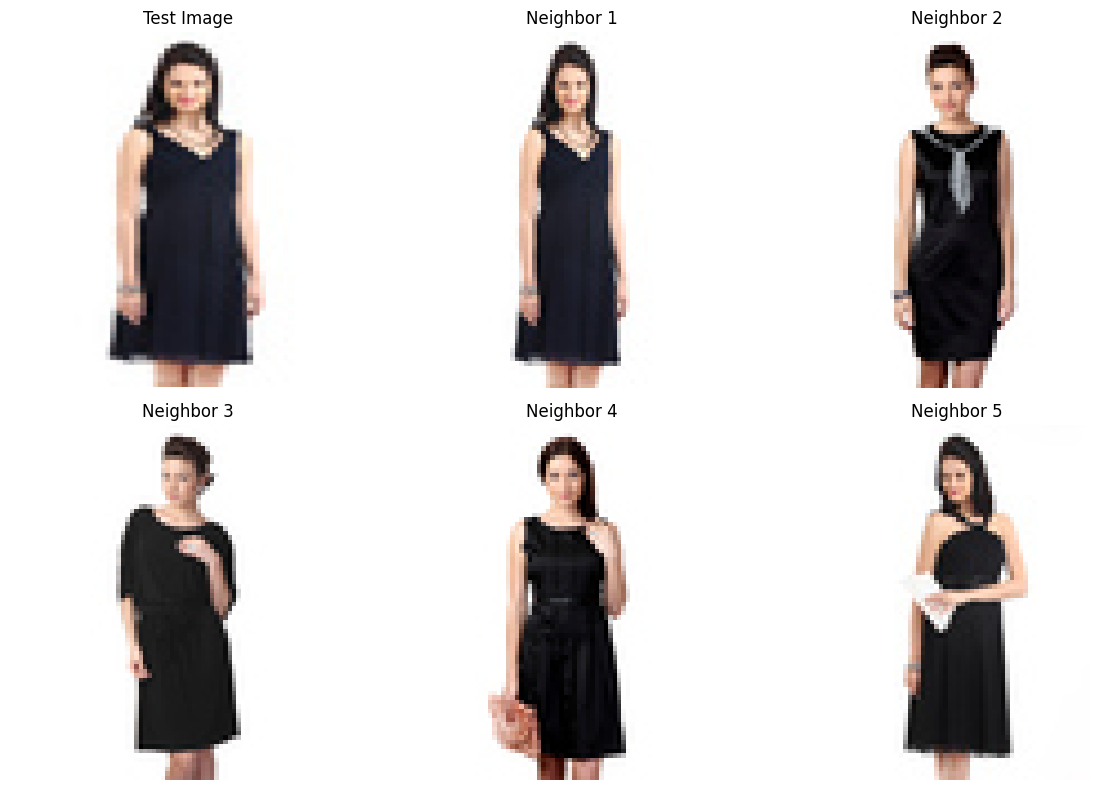

In [ ]:
# Initialize the ResNet model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a new model with GlobalMaxPooling2D
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D()
])

def extract_features(path, model):
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

# Specify the path to your image directory
path_images = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/images2'

filenames = []
for file in os.listdir(path_images):
    filenames.append(os.path.join(path_images, file))

feature_list = []

# Process images and extract features
for file in tqdm(filenames):
    feature_list.append(extract_features(file, model))

# Randomly select a test image from your dataset
test_image_path = random.choice(filenames)

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image_array = image.img_to_array(test_image)
expanded_test_image_array = np.expand_dims(test_image_array, axis=0)
preprocessed_test_image = preprocess_input(expanded_test_image_array)

# Extract features from the test image
test_result = model.predict(preprocessed_test_image).flatten()
normalized_test_result = test_result / norm(test_result)

# Fit the Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

# Find the nearest neighbors of the test image
distances, indices = neighbors.kneighbors([normalized_test_result])

print(indices)

# Display the nearest neighbor images
plt.figure(figsize=(12, 8))

# Display the test image
plt.subplot(2, 3, 1)
plt.imshow(test_image)
plt.title("Test Image")
plt.axis('off')

# Display the nearest neighbor images in a 2x3 grid
for i, file_index in enumerate(indices[0]):
    if i < 5:  # Display up to 5 nearest neighbors
        temp = cv2.imread(filenames[file_index])
        plt.subplot(2, 3, i+2)
        plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
        plt.title(f"Neighbor {i + 1}")
        plt.axis('off')

plt.tight_layout()
plt.show()


### INSIGHT from the above images are these are 5 similar images generate using is similarity search using random test image using K nearest Neighbour

1/1 [==============================] - 0s 196ms/step


  0%|          | 0/600 [00:00<?, ?it/s]

1/1 [==============================] - 0s 195ms/step


  0%|          | 1/600 [00:00<02:31,  3.96it/s]

1/1 [==============================] - 0s 209ms/step


  0%|          | 2/600 [00:00<03:13,  3.10it/s]

1/1 [==============================] - 0s 211ms/step


  0%|          | 3/600 [00:00<02:57,  3.36it/s]

1/1 [==============================] - 0s 219ms/step


  1%|          | 4/600 [00:01<03:16,  3.04it/s]

1/1 [==============================] - 0s 207ms/step


  1%|          | 5/600 [00:01<03:03,  3.24it/s]

1/1 [==============================] - 0s 227ms/step


  1%|          | 6/600 [00:01<03:17,  3.00it/s]

1/1 [==============================] - 0s 413ms/step


  1%|          | 7/600 [00:02<04:01,  2.46it/s]

1/1 [==============================] - 0s 225ms/step


  1%|▏         | 8/600 [00:02<03:54,  2.52it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 9/600 [00:03<03:50,  2.57it/s]

1/1 [==============================] - 0s 207ms/step


  2%|▏         | 10/600 [00:03<03:28,  2.83it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 11/600 [00:03<03:31,  2.79it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 12/600 [00:04<03:35,  2.73it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 13/600 [00:04<03:38,  2.69it/s]

1/1 [==============================] - 0s 202ms/step


  2%|▏         | 14/600 [00:04<03:19,  2.94it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▎         | 15/600 [00:05<03:06,  3.14it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 16/600 [00:05<03:16,  2.97it/s]

1/1 [==============================] - 0s 213ms/step


  3%|▎         | 17/600 [00:05<03:04,  3.15it/s]

1/1 [==============================] - 0s 198ms/step


  3%|▎         | 18/600 [00:06<03:13,  3.00it/s]

1/1 [==============================] - 0s 200ms/step


  3%|▎         | 19/600 [00:06<03:00,  3.21it/s]

1/1 [==============================] - 0s 223ms/step


  3%|▎         | 20/600 [00:06<03:11,  3.03it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▎         | 21/600 [00:07<03:19,  2.90it/s]

1/1 [==============================] - 0s 225ms/step


  4%|▎         | 22/600 [00:07<03:08,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


  4%|▍         | 23/600 [00:07<03:16,  2.94it/s]

1/1 [==============================] - 0s 212ms/step


  4%|▍         | 24/600 [00:08<03:22,  2.85it/s]

1/1 [==============================] - 0s 357ms/step


  4%|▍         | 25/600 [00:08<03:36,  2.66it/s]

1/1 [==============================] - 0s 375ms/step


  4%|▍         | 26/600 [00:09<03:53,  2.46it/s]

1/1 [==============================] - 0s 359ms/step


  4%|▍         | 27/600 [00:09<04:51,  1.96it/s]

1/1 [==============================] - 0s 364ms/step


  5%|▍         | 28/600 [00:10<05:29,  1.74it/s]

1/1 [==============================] - 0s 356ms/step


  5%|▍         | 29/600 [00:11<05:57,  1.60it/s]

1/1 [==============================] - 0s 340ms/step


  5%|▌         | 30/600 [00:12<06:16,  1.52it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▌         | 31/600 [00:12<05:27,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


  5%|▌         | 32/600 [00:12<04:35,  2.07it/s]

1/1 [==============================] - 0s 216ms/step


  6%|▌         | 33/600 [00:13<03:59,  2.37it/s]

1/1 [==============================] - 0s 209ms/step


  6%|▌         | 34/600 [00:13<03:50,  2.45it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▌         | 35/600 [00:13<03:24,  2.76it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 36/600 [00:14<03:25,  2.74it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 37/600 [00:14<03:08,  2.99it/s]

1/1 [==============================] - 0s 209ms/step


  6%|▋         | 38/600 [00:14<02:55,  3.20it/s]

1/1 [==============================] - 0s 210ms/step


  6%|▋         | 39/600 [00:14<02:47,  3.34it/s]

1/1 [==============================] - 0s 212ms/step


  7%|▋         | 40/600 [00:15<02:43,  3.43it/s]

1/1 [==============================] - 0s 207ms/step


  7%|▋         | 41/600 [00:15<02:39,  3.51it/s]

1/1 [==============================] - 0s 199ms/step


  7%|▋         | 42/600 [00:15<02:53,  3.21it/s]

1/1 [==============================] - 0s 201ms/step


  7%|▋         | 43/600 [00:16<03:03,  3.04it/s]

1/1 [==============================] - 0s 197ms/step


  7%|▋         | 44/600 [00:16<02:50,  3.25it/s]

1/1 [==============================] - 0s 207ms/step


  8%|▊         | 45/600 [00:16<02:44,  3.37it/s]

1/1 [==============================] - 0s 211ms/step


  8%|▊         | 46/600 [00:16<02:40,  3.46it/s]

1/1 [==============================] - 0s 209ms/step


  8%|▊         | 47/600 [00:17<02:36,  3.53it/s]

1/1 [==============================] - 0s 206ms/step


  8%|▊         | 48/600 [00:17<02:50,  3.23it/s]

1/1 [==============================] - 0s 209ms/step


  8%|▊         | 49/600 [00:17<02:43,  3.37it/s]

1/1 [==============================] - 0s 213ms/step


  8%|▊         | 50/600 [00:18<02:56,  3.11it/s]

1/1 [==============================] - 0s 206ms/step


  8%|▊         | 51/600 [00:18<03:05,  2.96it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▊         | 52/600 [00:18<03:10,  2.87it/s]

1/1 [==============================] - 0s 218ms/step


  9%|▉         | 53/600 [00:19<02:59,  3.04it/s]

1/1 [==============================] - 0s 203ms/step


  9%|▉         | 54/600 [00:19<03:08,  2.90it/s]

1/1 [==============================] - 0s 206ms/step


  9%|▉         | 55/600 [00:19<02:55,  3.11it/s]

1/1 [==============================] - 0s 222ms/step


  9%|▉         | 56/600 [00:20<02:48,  3.22it/s]

1/1 [==============================] - 0s 201ms/step


 10%|▉         | 57/600 [00:20<03:00,  3.02it/s]

1/1 [==============================] - 0s 208ms/step


 10%|▉         | 58/600 [00:20<02:49,  3.20it/s]

1/1 [==============================] - 0s 206ms/step


 10%|▉         | 59/600 [00:21<02:59,  3.02it/s]

1/1 [==============================] - 0s 206ms/step


 10%|█         | 60/600 [00:21<03:05,  2.91it/s]

1/1 [==============================] - 0s 205ms/step


 10%|█         | 61/600 [00:21<03:13,  2.79it/s]

1/1 [==============================] - 0s 279ms/step


 10%|█         | 62/600 [00:22<03:15,  2.75it/s]

1/1 [==============================] - 0s 343ms/step


 10%|█         | 63/600 [00:23<04:15,  2.10it/s]

1/1 [==============================] - 0s 359ms/step


 11%|█         | 64/600 [00:23<04:56,  1.81it/s]

1/1 [==============================] - 0s 346ms/step


 11%|█         | 65/600 [00:24<05:23,  1.66it/s]

1/1 [==============================] - 0s 347ms/step


 11%|█         | 66/600 [00:24<04:54,  1.81it/s]

1/1 [==============================] - 0s 363ms/step


 11%|█         | 67/600 [00:25<04:35,  1.93it/s]

1/1 [==============================] - 0s 346ms/step


 11%|█▏        | 68/600 [00:26<05:10,  1.72it/s]

1/1 [==============================] - 0s 215ms/step


 12%|█▏        | 69/600 [00:26<04:19,  2.05it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 70/600 [00:26<04:03,  2.17it/s]

1/1 [==============================] - 0s 211ms/step


 12%|█▏        | 71/600 [00:27<03:33,  2.48it/s]

1/1 [==============================] - 0s 201ms/step


 12%|█▏        | 72/600 [00:27<03:28,  2.54it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 73/600 [00:27<03:25,  2.57it/s]

1/1 [==============================] - 0s 205ms/step


 12%|█▏        | 74/600 [00:28<03:04,  2.84it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▎        | 75/600 [00:28<02:50,  3.08it/s]

1/1 [==============================] - 0s 216ms/step


 13%|█▎        | 76/600 [00:28<02:57,  2.95it/s]

1/1 [==============================] - 0s 198ms/step


 13%|█▎        | 77/600 [00:28<02:45,  3.17it/s]

1/1 [==============================] - 0s 210ms/step


 13%|█▎        | 78/600 [00:29<02:38,  3.29it/s]

1/1 [==============================] - 0s 233ms/step


 13%|█▎        | 79/600 [00:29<02:50,  3.06it/s]

1/1 [==============================] - 0s 207ms/step


 13%|█▎        | 80/600 [00:29<02:39,  3.25it/s]

1/1 [==============================] - 0s 206ms/step


 14%|█▎        | 81/600 [00:30<02:33,  3.39it/s]

1/1 [==============================] - 0s 197ms/step


 14%|█▎        | 82/600 [00:30<02:27,  3.51it/s]

1/1 [==============================] - 0s 218ms/step


 14%|█▍        | 83/600 [00:30<02:42,  3.18it/s]

1/1 [==============================] - 0s 200ms/step


 14%|█▍        | 84/600 [00:31<02:50,  3.02it/s]

1/1 [==============================] - 0s 198ms/step


 14%|█▍        | 85/600 [00:31<02:38,  3.24it/s]

1/1 [==============================] - 0s 206ms/step


 14%|█▍        | 86/600 [00:31<02:49,  3.02it/s]

1/1 [==============================] - 0s 202ms/step


 14%|█▍        | 87/600 [00:32<02:55,  2.92it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▍        | 88/600 [00:32<03:00,  2.84it/s]

1/1 [==============================] - 0s 198ms/step


 15%|█▍        | 89/600 [00:32<03:01,  2.81it/s]

1/1 [==============================] - 0s 193ms/step


 15%|█▌        | 90/600 [00:33<03:03,  2.77it/s]

1/1 [==============================] - 0s 193ms/step


 15%|█▌        | 91/600 [00:33<02:47,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


 15%|█▌        | 92/600 [00:33<02:36,  3.24it/s]

1/1 [==============================] - 0s 197ms/step


 16%|█▌        | 93/600 [00:34<02:45,  3.06it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▌        | 94/600 [00:34<02:35,  3.25it/s]

1/1 [==============================] - 0s 207ms/step


 16%|█▌        | 95/600 [00:34<02:44,  3.07it/s]

1/1 [==============================] - 0s 195ms/step


 16%|█▌        | 96/600 [00:35<02:32,  3.30it/s]

1/1 [==============================] - 0s 191ms/step


 16%|█▌        | 97/600 [00:35<02:24,  3.48it/s]

1/1 [==============================] - 0s 196ms/step


 16%|█▋        | 98/600 [00:35<02:20,  3.58it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▋        | 99/600 [00:35<02:34,  3.23it/s]

1/1 [==============================] - 0s 313ms/step


 17%|█▋        | 100/600 [00:36<02:43,  3.06it/s]

1/1 [==============================] - 0s 341ms/step


 17%|█▋        | 101/600 [00:37<03:42,  2.24it/s]

1/1 [==============================] - 0s 345ms/step


 17%|█▋        | 102/600 [00:37<04:24,  1.88it/s]

1/1 [==============================] - 0s 347ms/step


 17%|█▋        | 103/600 [00:38<04:09,  1.99it/s]

1/1 [==============================] - 0s 340ms/step


 17%|█▋        | 104/600 [00:38<04:43,  1.75it/s]

1/1 [==============================] - 0s 337ms/step


 18%|█▊        | 105/600 [00:39<04:20,  1.90it/s]

1/1 [==============================] - 0s 341ms/step


 18%|█▊        | 106/600 [00:40<04:50,  1.70it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█▊        | 107/600 [00:40<04:00,  2.05it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 108/600 [00:40<03:26,  2.38it/s]

1/1 [==============================] - 0s 209ms/step


 18%|█▊        | 109/600 [00:40<03:18,  2.47it/s]

1/1 [==============================] - 0s 197ms/step


 18%|█▊        | 110/600 [00:41<03:14,  2.52it/s]

1/1 [==============================] - 0s 196ms/step


 18%|█▊        | 111/600 [00:41<03:10,  2.57it/s]

1/1 [==============================] - 0s 218ms/step


 19%|█▊        | 112/600 [00:42<02:53,  2.81it/s]

1/1 [==============================] - 0s 194ms/step


 19%|█▉        | 113/600 [00:42<02:38,  3.08it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 114/600 [00:42<02:29,  3.26it/s]

1/1 [==============================] - 0s 223ms/step


 19%|█▉        | 115/600 [00:42<02:25,  3.33it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 116/600 [00:43<02:21,  3.42it/s]

1/1 [==============================] - 0s 198ms/step


 20%|█▉        | 117/600 [00:43<02:32,  3.17it/s]

1/1 [==============================] - 0s 199ms/step


 20%|█▉        | 118/600 [00:43<02:42,  2.97it/s]

1/1 [==============================] - 0s 210ms/step


 20%|█▉        | 119/600 [00:44<02:48,  2.86it/s]

1/1 [==============================] - 0s 194ms/step


 20%|██        | 120/600 [00:44<02:33,  3.13it/s]

1/1 [==============================] - 0s 204ms/step


 20%|██        | 121/600 [00:44<02:41,  2.97it/s]

1/1 [==============================] - 0s 207ms/step


 20%|██        | 122/600 [00:45<02:30,  3.17it/s]

1/1 [==============================] - 0s 206ms/step


 20%|██        | 123/600 [00:45<02:23,  3.32it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██        | 124/600 [00:45<02:17,  3.46it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 125/600 [00:45<02:14,  3.53it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██        | 126/600 [00:46<02:15,  3.50it/s]

1/1 [==============================] - 0s 195ms/step


 21%|██        | 127/600 [00:46<02:27,  3.22it/s]

1/1 [==============================] - 0s 201ms/step


 21%|██▏       | 128/600 [00:46<02:37,  3.00it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 129/600 [00:47<02:44,  2.87it/s]

1/1 [==============================] - 0s 199ms/step


 22%|██▏       | 130/600 [00:47<02:30,  3.12it/s]

1/1 [==============================] - 0s 198ms/step


 22%|██▏       | 131/600 [00:47<02:22,  3.30it/s]

1/1 [==============================] - 0s 219ms/step


 22%|██▏       | 132/600 [00:48<02:18,  3.38it/s]

1/1 [==============================] - 0s 194ms/step


 22%|██▏       | 133/600 [00:48<02:28,  3.14it/s]

1/1 [==============================] - 0s 212ms/step


 22%|██▏       | 134/600 [00:48<02:21,  3.29it/s]

1/1 [==============================] - 0s 199ms/step


 22%|██▎       | 135/600 [00:49<02:30,  3.09it/s]

1/1 [==============================] - 0s 198ms/step


 23%|██▎       | 136/600 [00:49<02:36,  2.96it/s]

1/1 [==============================] - 0s 208ms/step


 23%|██▎       | 137/600 [00:49<02:41,  2.87it/s]

1/1 [==============================] - 0s 351ms/step


 23%|██▎       | 138/600 [00:50<02:52,  2.68it/s]

1/1 [==============================] - 0s 361ms/step


 23%|██▎       | 139/600 [00:50<03:00,  2.55it/s]

1/1 [==============================] - 0s 352ms/step


 23%|██▎       | 140/600 [00:51<03:06,  2.46it/s]

1/1 [==============================] - 0s 354ms/step


 24%|██▎       | 141/600 [00:51<03:10,  2.40it/s]

1/1 [==============================] - 0s 356ms/step


 24%|██▎       | 142/600 [00:52<03:15,  2.35it/s]

1/1 [==============================] - 0s 355ms/step


 24%|██▍       | 143/600 [00:52<03:16,  2.32it/s]

1/1 [==============================] - 0s 341ms/step


 24%|██▍       | 144/600 [00:52<03:13,  2.35it/s]

1/1 [==============================] - 0s 350ms/step


 24%|██▍       | 145/600 [00:53<03:16,  2.32it/s]

1/1 [==============================] - 0s 359ms/step


 24%|██▍       | 146/600 [00:53<03:18,  2.29it/s]

1/1 [==============================] - 0s 340ms/step


 24%|██▍       | 147/600 [00:54<03:18,  2.28it/s]

1/1 [==============================] - 0s 266ms/step


 25%|██▍       | 148/600 [00:54<03:17,  2.29it/s]

1/1 [==============================] - 0s 218ms/step


 25%|██▍       | 149/600 [00:54<02:55,  2.57it/s]

1/1 [==============================] - 0s 198ms/step


 25%|██▌       | 150/600 [00:55<02:54,  2.58it/s]

1/1 [==============================] - 0s 202ms/step


 25%|██▌       | 151/600 [00:55<02:52,  2.61it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▌       | 152/600 [00:56<02:35,  2.88it/s]

1/1 [==============================] - 0s 206ms/step


 26%|██▌       | 153/600 [00:56<02:39,  2.79it/s]

1/1 [==============================] - 0s 202ms/step


 26%|██▌       | 154/600 [00:56<02:26,  3.05it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▌       | 155/600 [00:56<02:19,  3.19it/s]

1/1 [==============================] - 0s 205ms/step


 26%|██▌       | 156/600 [00:57<02:27,  3.01it/s]

1/1 [==============================] - 0s 219ms/step


 26%|██▌       | 157/600 [00:57<02:32,  2.90it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▋       | 158/600 [00:58<02:37,  2.81it/s]

1/1 [==============================] - 0s 199ms/step


 26%|██▋       | 159/600 [00:58<02:23,  3.07it/s]

1/1 [==============================] - 0s 217ms/step


 27%|██▋       | 160/600 [00:58<02:16,  3.22it/s]

1/1 [==============================] - 0s 207ms/step


 27%|██▋       | 161/600 [00:58<02:24,  3.03it/s]

1/1 [==============================] - 0s 206ms/step


 27%|██▋       | 162/600 [00:59<02:30,  2.91it/s]

1/1 [==============================] - 0s 243ms/step


 27%|██▋       | 163/600 [00:59<02:24,  3.03it/s]

1/1 [==============================] - 0s 200ms/step


 27%|██▋       | 164/600 [01:00<02:29,  2.92it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 165/600 [01:00<02:33,  2.83it/s]

1/1 [==============================] - 0s 216ms/step


 28%|██▊       | 166/600 [01:00<02:24,  3.00it/s]

1/1 [==============================] - 0s 217ms/step


 28%|██▊       | 167/600 [01:01<02:30,  2.88it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 168/600 [01:01<02:33,  2.82it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 169/600 [01:01<02:23,  3.01it/s]

1/1 [==============================] - 0s 199ms/step


 28%|██▊       | 170/600 [01:01<02:13,  3.21it/s]

1/1 [==============================] - 0s 196ms/step


 28%|██▊       | 171/600 [01:02<02:06,  3.39it/s]

1/1 [==============================] - 0s 198ms/step


 29%|██▊       | 172/600 [01:02<02:02,  3.51it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██▉       | 173/600 [01:02<02:12,  3.21it/s]

1/1 [==============================] - 0s 209ms/step


 29%|██▉       | 174/600 [01:03<02:21,  3.00it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 175/600 [01:03<02:11,  3.22it/s]

1/1 [==============================] - 0s 211ms/step


 29%|██▉       | 176/600 [01:03<02:19,  3.03it/s]

1/1 [==============================] - 0s 200ms/step


 30%|██▉       | 177/600 [01:04<02:11,  3.22it/s]

1/1 [==============================] - 0s 205ms/step


 30%|██▉       | 178/600 [01:04<02:19,  3.03it/s]

1/1 [==============================] - 0s 336ms/step


 30%|██▉       | 179/600 [01:05<03:06,  2.25it/s]

1/1 [==============================] - 0s 346ms/step


 30%|███       | 180/600 [01:05<03:41,  1.89it/s]

1/1 [==============================] - 0s 340ms/step


 30%|███       | 181/600 [01:06<03:28,  2.01it/s]

1/1 [==============================] - 0s 354ms/step


 30%|███       | 182/600 [01:06<03:20,  2.08it/s]

1/1 [==============================] - 0s 343ms/step


 30%|███       | 183/600 [01:07<03:55,  1.77it/s]

1/1 [==============================] - 0s 359ms/step


 31%|███       | 184/600 [01:08<04:14,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


 31%|███       | 185/600 [01:08<03:31,  1.97it/s]

1/1 [==============================] - 0s 206ms/step


 31%|███       | 186/600 [01:08<03:14,  2.13it/s]

1/1 [==============================] - 0s 203ms/step


 31%|███       | 187/600 [01:09<03:02,  2.27it/s]

1/1 [==============================] - 0s 203ms/step


 31%|███▏      | 188/600 [01:09<02:39,  2.58it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 189/600 [01:09<02:24,  2.85it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 190/600 [01:10<02:27,  2.78it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 191/600 [01:10<02:29,  2.73it/s]

1/1 [==============================] - 0s 208ms/step


 32%|███▏      | 192/600 [01:10<02:17,  2.97it/s]

1/1 [==============================] - 0s 214ms/step


 32%|███▏      | 193/600 [01:11<02:23,  2.84it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 194/600 [01:11<02:26,  2.77it/s]

1/1 [==============================] - 0s 197ms/step


 32%|███▎      | 195/600 [01:11<02:14,  3.02it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 196/600 [01:12<02:20,  2.88it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 197/600 [01:12<02:23,  2.81it/s]

1/1 [==============================] - 0s 216ms/step


 33%|███▎      | 198/600 [01:13<02:25,  2.77it/s]

1/1 [==============================] - 0s 210ms/step


 33%|███▎      | 199/600 [01:13<02:28,  2.71it/s]

1/1 [==============================] - 0s 198ms/step


 33%|███▎      | 200/600 [01:13<02:28,  2.69it/s]

1/1 [==============================] - 0s 213ms/step


 34%|███▎      | 201/600 [01:14<02:28,  2.69it/s]

1/1 [==============================] - 0s 196ms/step


 34%|███▎      | 202/600 [01:14<02:13,  2.98it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▍      | 203/600 [01:14<02:18,  2.86it/s]

1/1 [==============================] - 0s 213ms/step


 34%|███▍      | 204/600 [01:15<02:09,  3.05it/s]

1/1 [==============================] - 0s 194ms/step


 34%|███▍      | 205/600 [01:15<02:14,  2.94it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 206/600 [01:15<02:18,  2.85it/s]

1/1 [==============================] - 0s 217ms/step


 34%|███▍      | 207/600 [01:16<02:09,  3.03it/s]

1/1 [==============================] - 0s 192ms/step


 35%|███▍      | 208/600 [01:16<02:14,  2.91it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▍      | 209/600 [01:16<02:04,  3.13it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▌      | 210/600 [01:17<01:56,  3.33it/s]

1/1 [==============================] - 0s 209ms/step


 35%|███▌      | 211/600 [01:17<02:06,  3.07it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███▌      | 212/600 [01:17<01:58,  3.29it/s]

1/1 [==============================] - 0s 208ms/step


 36%|███▌      | 213/600 [01:18<02:06,  3.05it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███▌      | 214/600 [01:18<02:12,  2.90it/s]

1/1 [==============================] - 0s 351ms/step


 36%|███▌      | 215/600 [01:18<02:22,  2.69it/s]

1/1 [==============================] - 0s 345ms/step


 36%|███▌      | 216/600 [01:19<02:29,  2.57it/s]

1/1 [==============================] - 0s 345ms/step


 36%|███▌      | 217/600 [01:19<02:35,  2.46it/s]

1/1 [==============================] - 0s 353ms/step


 36%|███▋      | 218/600 [01:20<03:13,  1.97it/s]

1/1 [==============================] - 0s 341ms/step


 36%|███▋      | 219/600 [01:20<03:03,  2.08it/s]

1/1 [==============================] - 0s 332ms/step


 37%|███▋      | 220/600 [01:21<02:57,  2.14it/s]

1/1 [==============================] - 0s 348ms/step


 37%|███▋      | 221/600 [01:22<03:26,  1.84it/s]

1/1 [==============================] - 0s 337ms/step


 37%|███▋      | 222/600 [01:22<03:47,  1.66it/s]

1/1 [==============================] - 0s 213ms/step


 37%|███▋      | 223/600 [01:23<03:21,  1.87it/s]

1/1 [==============================] - 0s 216ms/step


 37%|███▋      | 224/600 [01:23<02:53,  2.17it/s]

1/1 [==============================] - 0s 215ms/step


 38%|███▊      | 225/600 [01:23<02:43,  2.30it/s]

1/1 [==============================] - 0s 199ms/step


 38%|███▊      | 226/600 [01:24<02:23,  2.61it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 227/600 [01:24<02:08,  2.89it/s]

1/1 [==============================] - 0s 198ms/step


 38%|███▊      | 228/600 [01:24<01:59,  3.10it/s]

1/1 [==============================] - 0s 194ms/step


 38%|███▊      | 229/600 [01:25<02:05,  2.96it/s]

1/1 [==============================] - 0s 192ms/step


 38%|███▊      | 230/600 [01:25<02:08,  2.88it/s]

1/1 [==============================] - 0s 196ms/step


 38%|███▊      | 231/600 [01:25<01:58,  3.11it/s]

1/1 [==============================] - 0s 196ms/step


 39%|███▊      | 232/600 [01:25<01:51,  3.30it/s]

1/1 [==============================] - 0s 198ms/step


 39%|███▉      | 233/600 [01:26<01:59,  3.08it/s]

1/1 [==============================] - 0s 230ms/step


 39%|███▉      | 234/600 [01:26<01:55,  3.16it/s]

1/1 [==============================] - 0s 213ms/step


 39%|███▉      | 235/600 [01:26<02:03,  2.96it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▉      | 236/600 [01:27<01:58,  3.08it/s]

1/1 [==============================] - 0s 212ms/step


 40%|███▉      | 237/600 [01:27<02:04,  2.92it/s]

1/1 [==============================] - 0s 194ms/step


 40%|███▉      | 238/600 [01:28<02:06,  2.85it/s]

1/1 [==============================] - 0s 198ms/step


 40%|███▉      | 239/600 [01:28<02:09,  2.79it/s]

1/1 [==============================] - 0s 215ms/step


 40%|████      | 240/600 [01:28<02:00,  2.98it/s]

1/1 [==============================] - 0s 192ms/step


 40%|████      | 241/600 [01:28<01:51,  3.22it/s]

1/1 [==============================] - 0s 201ms/step


 40%|████      | 242/600 [01:29<01:45,  3.38it/s]

1/1 [==============================] - 0s 192ms/step


 40%|████      | 243/600 [01:29<01:41,  3.53it/s]

1/1 [==============================] - 0s 226ms/step


 41%|████      | 244/600 [01:29<01:50,  3.21it/s]

1/1 [==============================] - 0s 196ms/step


 41%|████      | 245/600 [01:30<01:44,  3.40it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 246/600 [01:30<01:40,  3.51it/s]

1/1 [==============================] - 0s 219ms/step


 41%|████      | 247/600 [01:30<01:49,  3.22it/s]

1/1 [==============================] - 0s 204ms/step


 41%|████▏     | 248/600 [01:30<01:44,  3.36it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████▏     | 249/600 [01:31<01:52,  3.12it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████▏     | 250/600 [01:31<01:45,  3.31it/s]

1/1 [==============================] - 0s 194ms/step


 42%|████▏     | 251/600 [01:31<01:41,  3.45it/s]

1/1 [==============================] - 0s 198ms/step


 42%|████▏     | 252/600 [01:32<01:49,  3.18it/s]

1/1 [==============================] - 0s 195ms/step


 42%|████▏     | 253/600 [01:32<01:55,  3.01it/s]

1/1 [==============================] - 0s 350ms/step


 42%|████▏     | 254/600 [01:33<02:06,  2.75it/s]

1/1 [==============================] - 0s 360ms/step


 42%|████▎     | 255/600 [01:33<02:43,  2.11it/s]

1/1 [==============================] - 0s 358ms/step


 43%|████▎     | 256/600 [01:34<03:10,  1.80it/s]

1/1 [==============================] - 0s 364ms/step


 43%|████▎     | 257/600 [01:35<03:28,  1.64it/s]

1/1 [==============================] - 0s 365ms/step


 43%|████▎     | 258/600 [01:35<03:12,  1.78it/s]

1/1 [==============================] - 0s 348ms/step


 43%|████▎     | 259/600 [01:36<02:59,  1.90it/s]

1/1 [==============================] - 0s 282ms/step


 43%|████▎     | 260/600 [01:36<02:42,  2.09it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▎     | 261/600 [01:36<02:31,  2.23it/s]

1/1 [==============================] - 0s 204ms/step


 44%|████▎     | 262/600 [01:37<02:12,  2.54it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 263/600 [01:37<02:10,  2.58it/s]

1/1 [==============================] - 0s 204ms/step


 44%|████▍     | 264/600 [01:37<01:58,  2.83it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▍     | 265/600 [01:38<01:51,  2.99it/s]

1/1 [==============================] - 0s 200ms/step


 44%|████▍     | 266/600 [01:38<01:44,  3.18it/s]

1/1 [==============================] - 0s 198ms/step


 44%|████▍     | 267/600 [01:38<01:51,  2.99it/s]

1/1 [==============================] - 0s 215ms/step


 45%|████▍     | 268/600 [01:39<01:56,  2.85it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▍     | 269/600 [01:39<01:47,  3.09it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▌     | 270/600 [01:39<01:51,  2.96it/s]

1/1 [==============================] - 0s 215ms/step


 45%|████▌     | 271/600 [01:40<01:45,  3.13it/s]

1/1 [==============================] - 0s 212ms/step


 45%|████▌     | 272/600 [01:40<01:40,  3.28it/s]

1/1 [==============================] - 0s 202ms/step


 46%|████▌     | 273/600 [01:40<01:47,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


 46%|████▌     | 274/600 [01:40<01:41,  3.20it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████▌     | 275/600 [01:41<01:38,  3.30it/s]

1/1 [==============================] - 0s 218ms/step


 46%|████▌     | 276/600 [01:41<01:35,  3.40it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 277/600 [01:41<01:43,  3.12it/s]

1/1 [==============================] - 0s 201ms/step


 46%|████▋     | 278/600 [01:42<01:49,  2.94it/s]

1/1 [==============================] - 0s 198ms/step


 46%|████▋     | 279/600 [01:42<01:41,  3.15it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 280/600 [01:42<01:48,  2.96it/s]

1/1 [==============================] - 0s 195ms/step


 47%|████▋     | 281/600 [01:43<01:53,  2.82it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 282/600 [01:43<01:55,  2.75it/s]

1/1 [==============================] - 0s 200ms/step


 47%|████▋     | 283/600 [01:44<01:56,  2.73it/s]

1/1 [==============================] - 0s 197ms/step


 47%|████▋     | 284/600 [01:44<01:56,  2.71it/s]

1/1 [==============================] - 0s 196ms/step


 48%|████▊     | 285/600 [01:44<01:56,  2.70it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 286/600 [01:45<01:47,  2.92it/s]

1/1 [==============================] - 0s 207ms/step


 48%|████▊     | 287/600 [01:45<01:41,  3.09it/s]

1/1 [==============================] - 0s 201ms/step


 48%|████▊     | 288/600 [01:45<01:35,  3.26it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 289/600 [01:45<01:32,  3.36it/s]

1/1 [==============================] - 0s 222ms/step


 48%|████▊     | 290/600 [01:46<01:40,  3.09it/s]

1/1 [==============================] - 0s 305ms/step


 48%|████▊     | 291/600 [01:46<01:44,  2.96it/s]

1/1 [==============================] - 0s 357ms/step


 49%|████▊     | 292/600 [01:47<01:53,  2.72it/s]

1/1 [==============================] - 0s 362ms/step


 49%|████▉     | 293/600 [01:47<02:26,  2.10it/s]

1/1 [==============================] - 0s 356ms/step


 49%|████▉     | 294/600 [01:48<02:49,  1.80it/s]

1/1 [==============================] - 0s 362ms/step


 49%|████▉     | 295/600 [01:49<02:39,  1.91it/s]

1/1 [==============================] - 0s 356ms/step


 49%|████▉     | 296/600 [01:49<02:59,  1.70it/s]

1/1 [==============================] - 0s 344ms/step


 50%|████▉     | 297/600 [01:50<02:44,  1.84it/s]

1/1 [==============================] - 0s 294ms/step


 50%|████▉     | 298/600 [01:50<02:29,  2.02it/s]

1/1 [==============================] - 0s 206ms/step


 50%|████▉     | 299/600 [01:50<02:08,  2.35it/s]

1/1 [==============================] - 0s 201ms/step


 50%|█████     | 300/600 [01:51<02:03,  2.43it/s]

1/1 [==============================] - 0s 216ms/step


 50%|█████     | 301/600 [01:51<01:59,  2.51it/s]

1/1 [==============================] - 0s 196ms/step


 50%|█████     | 302/600 [01:51<01:46,  2.79it/s]

1/1 [==============================] - 0s 197ms/step


 50%|█████     | 303/600 [01:52<01:37,  3.05it/s]

1/1 [==============================] - 0s 211ms/step


 51%|█████     | 304/600 [01:52<01:41,  2.91it/s]

1/1 [==============================] - 0s 202ms/step


 51%|█████     | 305/600 [01:52<01:44,  2.83it/s]

1/1 [==============================] - 0s 200ms/step


 51%|█████     | 306/600 [01:53<01:35,  3.06it/s]

1/1 [==============================] - 0s 206ms/step


 51%|█████     | 307/600 [01:53<01:30,  3.24it/s]

1/1 [==============================] - 0s 203ms/step


 51%|█████▏    | 308/600 [01:53<01:36,  3.02it/s]

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 309/600 [01:54<01:30,  3.22it/s]

1/1 [==============================] - 0s 207ms/step


 52%|█████▏    | 310/600 [01:54<01:35,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


 52%|█████▏    | 311/600 [01:54<01:30,  3.20it/s]

1/1 [==============================] - 0s 196ms/step


 52%|█████▏    | 312/600 [01:55<01:35,  3.02it/s]

1/1 [==============================] - 0s 198ms/step


 52%|█████▏    | 313/600 [01:55<01:29,  3.22it/s]

1/1 [==============================] - 0s 220ms/step


 52%|█████▏    | 314/600 [01:55<01:34,  3.03it/s]

1/1 [==============================] - 0s 195ms/step


 52%|█████▎    | 315/600 [01:56<01:37,  2.91it/s]

1/1 [==============================] - 0s 201ms/step


 53%|█████▎    | 316/600 [01:56<01:30,  3.12it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 317/600 [01:56<01:35,  2.96it/s]

1/1 [==============================] - 0s 205ms/step


 53%|█████▎    | 318/600 [01:57<01:38,  2.87it/s]

1/1 [==============================] - 0s 198ms/step


 53%|█████▎    | 319/600 [01:57<01:40,  2.81it/s]

1/1 [==============================] - 0s 206ms/step


 53%|█████▎    | 320/600 [01:57<01:32,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


 54%|█████▎    | 321/600 [01:58<01:36,  2.88it/s]

1/1 [==============================] - 0s 201ms/step


 54%|█████▎    | 322/600 [01:58<01:38,  2.81it/s]

1/1 [==============================] - 0s 202ms/step


 54%|█████▍    | 323/600 [01:58<01:40,  2.76it/s]

1/1 [==============================] - 0s 213ms/step


 54%|█████▍    | 324/600 [01:59<01:33,  2.96it/s]

1/1 [==============================] - 0s 195ms/step


 54%|█████▍    | 325/600 [01:59<01:26,  3.19it/s]

1/1 [==============================] - 0s 218ms/step


 54%|█████▍    | 326/600 [01:59<01:24,  3.26it/s]

1/1 [==============================] - 0s 211ms/step


 55%|█████▍    | 327/600 [02:00<01:29,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


 55%|█████▍    | 328/600 [02:00<01:23,  3.25it/s]

1/1 [==============================] - 0s 286ms/step


 55%|█████▍    | 329/600 [02:00<01:27,  3.09it/s]

1/1 [==============================] - 0s 370ms/step


 55%|█████▌    | 330/600 [02:01<01:37,  2.76it/s]

1/1 [==============================] - 0s 357ms/step


 55%|█████▌    | 331/600 [02:01<02:07,  2.11it/s]

1/1 [==============================] - 0s 342ms/step


 55%|█████▌    | 332/600 [02:02<02:27,  1.82it/s]

1/1 [==============================] - 0s 361ms/step


 56%|█████▌    | 333/600 [02:03<02:18,  1.93it/s]

1/1 [==============================] - 0s 343ms/step


 56%|█████▌    | 334/600 [02:03<02:10,  2.04it/s]

1/1 [==============================] - 0s 351ms/step


 56%|█████▌    | 335/600 [02:03<02:05,  2.11it/s]

1/1 [==============================] - 0s 339ms/step


 56%|█████▌    | 336/600 [02:04<02:00,  2.19it/s]

1/1 [==============================] - 0s 343ms/step


 56%|█████▌    | 337/600 [02:04<01:58,  2.22it/s]

1/1 [==============================] - 0s 211ms/step


 56%|█████▋    | 338/600 [02:05<01:54,  2.29it/s]

1/1 [==============================] - 0s 223ms/step


 56%|█████▋    | 339/600 [02:05<01:50,  2.36it/s]

1/1 [==============================] - 0s 225ms/step


 57%|█████▋    | 340/600 [02:05<01:40,  2.58it/s]

1/1 [==============================] - 0s 212ms/step


 57%|█████▋    | 341/600 [02:06<01:32,  2.78it/s]

1/1 [==============================] - 0s 204ms/step


 57%|█████▋    | 342/600 [02:06<01:26,  2.99it/s]

1/1 [==============================] - 0s 207ms/step


 57%|█████▋    | 343/600 [02:06<01:21,  3.17it/s]

1/1 [==============================] - 0s 213ms/step


 57%|█████▋    | 344/600 [02:07<01:18,  3.26it/s]

1/1 [==============================] - 0s 223ms/step


 57%|█████▊    | 345/600 [02:07<01:25,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


 58%|█████▊    | 346/600 [02:07<01:19,  3.18it/s]

1/1 [==============================] - 0s 209ms/step


 58%|█████▊    | 347/600 [02:07<01:16,  3.32it/s]

1/1 [==============================] - 0s 207ms/step


 58%|█████▊    | 348/600 [02:08<01:14,  3.37it/s]

1/1 [==============================] - 0s 201ms/step


 58%|█████▊    | 349/600 [02:08<01:20,  3.11it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████▊    | 350/600 [02:08<01:18,  3.20it/s]

1/1 [==============================] - 0s 209ms/step


 58%|█████▊    | 351/600 [02:09<01:23,  2.98it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████▊    | 352/600 [02:09<01:26,  2.87it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████▉    | 353/600 [02:10<01:28,  2.79it/s]

1/1 [==============================] - 0s 208ms/step


 59%|█████▉    | 354/600 [02:10<01:29,  2.76it/s]

1/1 [==============================] - 0s 203ms/step


 59%|█████▉    | 355/600 [02:10<01:21,  3.00it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████▉    | 356/600 [02:11<01:24,  2.88it/s]

1/1 [==============================] - 0s 210ms/step


 60%|█████▉    | 357/600 [02:11<01:26,  2.81it/s]

1/1 [==============================] - 0s 205ms/step


 60%|█████▉    | 358/600 [02:11<01:27,  2.76it/s]

1/1 [==============================] - 0s 222ms/step


 60%|█████▉    | 359/600 [02:12<01:28,  2.74it/s]

1/1 [==============================] - 0s 199ms/step


 60%|██████    | 360/600 [02:12<01:20,  2.99it/s]

1/1 [==============================] - 0s 214ms/step


 60%|██████    | 361/600 [02:12<01:16,  3.13it/s]

1/1 [==============================] - 0s 212ms/step


 60%|██████    | 362/600 [02:13<01:20,  2.96it/s]

1/1 [==============================] - 0s 206ms/step


 60%|██████    | 363/600 [02:13<01:14,  3.16it/s]

1/1 [==============================] - 0s 201ms/step


 61%|██████    | 364/600 [02:13<01:19,  2.98it/s]

1/1 [==============================] - 0s 202ms/step


 61%|██████    | 365/600 [02:14<01:21,  2.88it/s]

1/1 [==============================] - 0s 208ms/step


 61%|██████    | 366/600 [02:14<01:15,  3.09it/s]

1/1 [==============================] - 0s 205ms/step


 61%|██████    | 367/600 [02:14<01:12,  3.24it/s]

1/1 [==============================] - 0s 297ms/step


 61%|██████▏   | 368/600 [02:15<01:15,  3.05it/s]

1/1 [==============================] - 0s 364ms/step


 62%|██████▏   | 369/600 [02:15<01:25,  2.70it/s]

1/1 [==============================] - 0s 342ms/step


 62%|██████▏   | 370/600 [02:16<01:52,  2.05it/s]

1/1 [==============================] - 0s 355ms/step


 62%|██████▏   | 371/600 [02:16<01:48,  2.11it/s]

1/1 [==============================] - 0s 346ms/step


 62%|██████▏   | 372/600 [02:17<01:45,  2.17it/s]

1/1 [==============================] - 0s 333ms/step


 62%|██████▏   | 373/600 [02:17<02:04,  1.82it/s]

1/1 [==============================] - 0s 356ms/step


 62%|██████▏   | 374/600 [02:18<01:56,  1.94it/s]

1/1 [==============================] - 0s 345ms/step


 62%|██████▎   | 375/600 [02:18<01:50,  2.04it/s]

1/1 [==============================] - 0s 263ms/step


 63%|██████▎   | 376/600 [02:19<01:40,  2.22it/s]

1/1 [==============================] - 0s 214ms/step


 63%|██████▎   | 377/600 [02:19<01:28,  2.51it/s]

1/1 [==============================] - 0s 208ms/step


 63%|██████▎   | 378/600 [02:19<01:27,  2.54it/s]

1/1 [==============================] - 0s 211ms/step


 63%|██████▎   | 379/600 [02:20<01:18,  2.80it/s]

1/1 [==============================] - 0s 209ms/step


 63%|██████▎   | 380/600 [02:20<01:19,  2.76it/s]

1/1 [==============================] - 0s 209ms/step


 64%|██████▎   | 381/600 [02:20<01:20,  2.71it/s]

1/1 [==============================] - 0s 200ms/step


 64%|██████▎   | 382/600 [02:21<01:21,  2.68it/s]

1/1 [==============================] - 0s 214ms/step


 64%|██████▍   | 383/600 [02:21<01:14,  2.91it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▍   | 384/600 [02:21<01:09,  3.11it/s]

1/1 [==============================] - 0s 205ms/step


 64%|██████▍   | 385/600 [02:22<01:12,  2.96it/s]

1/1 [==============================] - 0s 220ms/step


 64%|██████▍   | 386/600 [02:22<01:15,  2.84it/s]

1/1 [==============================] - 0s 206ms/step


 64%|██████▍   | 387/600 [02:22<01:16,  2.79it/s]

1/1 [==============================] - 0s 200ms/step


 65%|██████▍   | 388/600 [02:23<01:17,  2.75it/s]

1/1 [==============================] - 0s 214ms/step


 65%|██████▍   | 389/600 [02:23<01:11,  2.95it/s]

1/1 [==============================] - 0s 208ms/step


 65%|██████▌   | 390/600 [02:23<01:06,  3.14it/s]

1/1 [==============================] - 0s 198ms/step


 65%|██████▌   | 391/600 [02:24<01:10,  2.98it/s]

1/1 [==============================] - 0s 225ms/step


 65%|██████▌   | 392/600 [02:24<01:06,  3.12it/s]

1/1 [==============================] - 0s 202ms/step


 66%|██████▌   | 393/600 [02:24<01:10,  2.95it/s]

1/1 [==============================] - 0s 200ms/step


 66%|██████▌   | 394/600 [02:25<01:06,  3.11it/s]

1/1 [==============================] - 0s 216ms/step


 66%|██████▌   | 395/600 [02:25<01:09,  2.95it/s]

1/1 [==============================] - 0s 203ms/step


 66%|██████▌   | 396/600 [02:25<01:04,  3.17it/s]

1/1 [==============================] - 0s 199ms/step


 66%|██████▌   | 397/600 [02:26<01:01,  3.31it/s]

1/1 [==============================] - 0s 201ms/step


 66%|██████▋   | 398/600 [02:26<01:05,  3.09it/s]

1/1 [==============================] - 0s 213ms/step


 66%|██████▋   | 399/600 [02:26<01:02,  3.24it/s]

1/1 [==============================] - 0s 205ms/step


 67%|██████▋   | 400/600 [02:27<01:06,  3.03it/s]

1/1 [==============================] - 0s 205ms/step


 67%|██████▋   | 401/600 [02:27<01:08,  2.91it/s]

1/1 [==============================] - 0s 211ms/step


 67%|██████▋   | 402/600 [02:27<01:10,  2.80it/s]

1/1 [==============================] - 0s 196ms/step


 67%|██████▋   | 403/600 [02:28<01:04,  3.06it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 404/600 [02:28<01:07,  2.91it/s]

1/1 [==============================] - 0s 215ms/step


 68%|██████▊   | 405/600 [02:28<01:03,  3.06it/s]

1/1 [==============================] - 0s 206ms/step


 68%|██████▊   | 406/600 [02:29<01:06,  2.93it/s]

1/1 [==============================] - 0s 353ms/step


 68%|██████▊   | 407/600 [02:29<01:11,  2.72it/s]

1/1 [==============================] - 0s 352ms/step


 68%|██████▊   | 408/600 [02:30<01:15,  2.54it/s]

1/1 [==============================] - 0s 358ms/step


 68%|██████▊   | 409/600 [02:30<01:19,  2.39it/s]

1/1 [==============================] - 0s 367ms/step


 68%|██████▊   | 410/600 [02:31<01:37,  1.95it/s]

1/1 [==============================] - 0s 322ms/step


 68%|██████▊   | 411/600 [02:31<01:31,  2.07it/s]

1/1 [==============================] - 0s 349ms/step


 69%|██████▊   | 412/600 [02:32<01:45,  1.79it/s]

1/1 [==============================] - 0s 357ms/step


 69%|██████▉   | 413/600 [02:33<01:55,  1.62it/s]

1/1 [==============================] - 0s 199ms/step


 69%|██████▉   | 414/600 [02:33<01:41,  1.84it/s]

1/1 [==============================] - 0s 207ms/step


 69%|██████▉   | 415/600 [02:33<01:31,  2.03it/s]

1/1 [==============================] - 0s 197ms/step


 69%|██████▉   | 416/600 [02:34<01:17,  2.36it/s]

1/1 [==============================] - 0s 196ms/step


 70%|██████▉   | 417/600 [02:34<01:09,  2.65it/s]

1/1 [==============================] - 0s 216ms/step


 70%|██████▉   | 418/600 [02:34<01:03,  2.85it/s]

1/1 [==============================] - 0s 219ms/step


 70%|██████▉   | 419/600 [02:35<01:00,  3.01it/s]

1/1 [==============================] - 0s 199ms/step


 70%|███████   | 420/600 [02:35<01:02,  2.88it/s]

1/1 [==============================] - 0s 202ms/step


 70%|███████   | 421/600 [02:35<00:57,  3.09it/s]

1/1 [==============================] - 0s 229ms/step


 70%|███████   | 422/600 [02:36<01:00,  2.95it/s]

1/1 [==============================] - 0s 201ms/step


 70%|███████   | 423/600 [02:36<00:55,  3.17it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 424/600 [02:36<00:53,  3.31it/s]

1/1 [==============================] - 0s 201ms/step


 71%|███████   | 425/600 [02:36<00:50,  3.43it/s]

1/1 [==============================] - 0s 222ms/step


 71%|███████   | 426/600 [02:37<00:56,  3.09it/s]

1/1 [==============================] - 0s 211ms/step


 71%|███████   | 427/600 [02:37<00:58,  2.95it/s]

1/1 [==============================] - 0s 210ms/step


 71%|███████▏  | 428/600 [02:37<00:55,  3.11it/s]

1/1 [==============================] - 0s 201ms/step


 72%|███████▏  | 429/600 [02:38<00:58,  2.93it/s]

1/1 [==============================] - 0s 199ms/step


 72%|███████▏  | 430/600 [02:38<00:53,  3.16it/s]

1/1 [==============================] - 0s 228ms/step


 72%|███████▏  | 431/600 [02:38<00:52,  3.20it/s]

1/1 [==============================] - 0s 216ms/step


 72%|███████▏  | 432/600 [02:39<00:51,  3.26it/s]

1/1 [==============================] - 0s 202ms/step


 72%|███████▏  | 433/600 [02:39<00:54,  3.05it/s]

1/1 [==============================] - 0s 205ms/step


 72%|███████▏  | 434/600 [02:39<00:57,  2.89it/s]

1/1 [==============================] - 0s 222ms/step


 72%|███████▎  | 435/600 [02:40<00:54,  3.03it/s]

1/1 [==============================] - 0s 207ms/step


 73%|███████▎  | 436/600 [02:40<00:56,  2.90it/s]

1/1 [==============================] - 0s 199ms/step


 73%|███████▎  | 437/600 [02:40<00:52,  3.12it/s]

1/1 [==============================] - 0s 218ms/step


 73%|███████▎  | 438/600 [02:41<00:50,  3.23it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 439/600 [02:41<00:48,  3.34it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 440/600 [02:41<00:46,  3.42it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▎  | 441/600 [02:42<00:50,  3.13it/s]

1/1 [==============================] - 0s 203ms/step


 74%|███████▎  | 442/600 [02:42<00:54,  2.92it/s]

1/1 [==============================] - 0s 218ms/step


 74%|███████▍  | 443/600 [02:42<00:55,  2.82it/s]

1/1 [==============================] - 0s 225ms/step


 74%|███████▍  | 444/600 [02:43<00:56,  2.76it/s]

1/1 [==============================] - 0s 356ms/step


 74%|███████▍  | 445/600 [02:43<01:13,  2.10it/s]

1/1 [==============================] - 0s 354ms/step


 74%|███████▍  | 446/600 [02:44<01:25,  1.80it/s]

1/1 [==============================] - 0s 368ms/step


 74%|███████▍  | 447/600 [02:45<01:33,  1.64it/s]

1/1 [==============================] - 0s 335ms/step


 75%|███████▍  | 448/600 [02:45<01:24,  1.81it/s]

1/1 [==============================] - 0s 363ms/step


 75%|███████▍  | 449/600 [02:46<01:32,  1.63it/s]

1/1 [==============================] - 0s 269ms/step


 75%|███████▌  | 450/600 [02:47<01:21,  1.85it/s]

1/1 [==============================] - 0s 199ms/step


 75%|███████▌  | 451/600 [02:47<01:08,  2.18it/s]

1/1 [==============================] - 0s 203ms/step


 75%|███████▌  | 452/600 [02:47<00:59,  2.47it/s]

1/1 [==============================] - 0s 197ms/step


 76%|███████▌  | 453/600 [02:47<00:58,  2.52it/s]

1/1 [==============================] - 0s 203ms/step


 76%|███████▌  | 454/600 [02:48<00:52,  2.78it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████▌  | 455/600 [02:48<00:48,  2.99it/s]

1/1 [==============================] - 0s 203ms/step


 76%|███████▌  | 456/600 [02:48<00:50,  2.88it/s]

1/1 [==============================] - 0s 204ms/step


 76%|███████▌  | 457/600 [02:49<00:46,  3.08it/s]

1/1 [==============================] - 0s 214ms/step


 76%|███████▋  | 458/600 [02:49<00:44,  3.18it/s]

1/1 [==============================] - 0s 209ms/step


 76%|███████▋  | 459/600 [02:49<00:47,  2.99it/s]

1/1 [==============================] - 0s 204ms/step


 77%|███████▋  | 460/600 [02:50<00:43,  3.20it/s]

1/1 [==============================] - 0s 203ms/step


 77%|███████▋  | 461/600 [02:50<00:41,  3.31it/s]

1/1 [==============================] - 0s 224ms/step


 77%|███████▋  | 462/600 [02:50<00:45,  3.07it/s]

1/1 [==============================] - 0s 201ms/step


 77%|███████▋  | 463/600 [02:51<00:46,  2.92it/s]

1/1 [==============================] - 0s 207ms/step


 77%|███████▋  | 464/600 [02:51<00:43,  3.12it/s]

1/1 [==============================] - 0s 217ms/step


 78%|███████▊  | 465/600 [02:51<00:41,  3.23it/s]

1/1 [==============================] - 0s 207ms/step


 78%|███████▊  | 466/600 [02:51<00:40,  3.33it/s]

1/1 [==============================] - 0s 204ms/step


 78%|███████▊  | 467/600 [02:52<00:38,  3.45it/s]

1/1 [==============================] - 0s 214ms/step


 78%|███████▊  | 468/600 [02:52<00:38,  3.46it/s]

1/1 [==============================] - 0s 218ms/step


 78%|███████▊  | 469/600 [02:52<00:37,  3.46it/s]

1/1 [==============================] - 0s 232ms/step


 78%|███████▊  | 470/600 [02:53<00:41,  3.16it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 471/600 [02:53<00:42,  3.00it/s]

1/1 [==============================] - 0s 210ms/step


 79%|███████▊  | 472/600 [02:53<00:44,  2.89it/s]

1/1 [==============================] - 0s 206ms/step


 79%|███████▉  | 473/600 [02:54<00:40,  3.10it/s]

1/1 [==============================] - 0s 211ms/step


 79%|███████▉  | 474/600 [02:54<00:43,  2.93it/s]

1/1 [==============================] - 0s 206ms/step


 79%|███████▉  | 475/600 [02:54<00:43,  2.85it/s]

1/1 [==============================] - 0s 209ms/step


 79%|███████▉  | 476/600 [02:55<00:40,  3.04it/s]

1/1 [==============================] - 0s 207ms/step


 80%|███████▉  | 477/600 [02:55<00:38,  3.19it/s]

1/1 [==============================] - 0s 210ms/step


 80%|███████▉  | 478/600 [02:55<00:40,  2.99it/s]

1/1 [==============================] - 0s 208ms/step


 80%|███████▉  | 479/600 [02:56<00:41,  2.90it/s]

1/1 [==============================] - 0s 207ms/step


 80%|████████  | 480/600 [02:56<00:42,  2.82it/s]

1/1 [==============================] - 0s 206ms/step


 80%|████████  | 481/600 [02:57<00:43,  2.75it/s]

1/1 [==============================] - 0s 352ms/step


 80%|████████  | 482/600 [02:57<00:56,  2.09it/s]

1/1 [==============================] - 0s 351ms/step


 80%|████████  | 483/600 [02:58<00:54,  2.14it/s]

1/1 [==============================] - 0s 349ms/step


 81%|████████  | 484/600 [02:58<01:04,  1.81it/s]

1/1 [==============================] - 0s 336ms/step


 81%|████████  | 485/600 [02:59<00:58,  1.95it/s]

1/1 [==============================] - 0s 353ms/step


 81%|████████  | 486/600 [03:00<01:05,  1.74it/s]

1/1 [==============================] - 0s 347ms/step


 81%|████████  | 487/600 [03:00<01:00,  1.88it/s]

1/1 [==============================] - 0s 337ms/step


 81%|████████▏ | 488/600 [03:01<01:06,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 82%|████████▏ | 489/600 [03:01<00:58,  1.90it/s]

1/1 [==============================] - 0s 219ms/step


 82%|████████▏ | 490/600 [03:01<00:50,  2.19it/s]

1/1 [==============================] - 0s 203ms/step


 82%|████████▏ | 491/600 [03:02<00:43,  2.50it/s]

1/1 [==============================] - 0s 198ms/step


 82%|████████▏ | 492/600 [03:02<00:42,  2.55it/s]

1/1 [==============================] - 0s 222ms/step


 82%|████████▏ | 493/600 [03:02<00:41,  2.57it/s]

1/1 [==============================] - 0s 214ms/step


 82%|████████▏ | 494/600 [03:03<00:40,  2.59it/s]

1/1 [==============================] - 0s 207ms/step


 82%|████████▎ | 495/600 [03:03<00:36,  2.84it/s]

1/1 [==============================] - 0s 214ms/step


 83%|████████▎ | 496/600 [03:03<00:34,  3.03it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████▎ | 497/600 [03:04<00:32,  3.17it/s]

1/1 [==============================] - 0s 200ms/step


 83%|████████▎ | 498/600 [03:04<00:34,  2.97it/s]

1/1 [==============================] - 0s 205ms/step


 83%|████████▎ | 499/600 [03:04<00:31,  3.17it/s]

1/1 [==============================] - 0s 236ms/step


 83%|████████▎ | 500/600 [03:05<00:33,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


 84%|████████▎ | 501/600 [03:05<00:31,  3.16it/s]

1/1 [==============================] - 0s 207ms/step


 84%|████████▎ | 502/600 [03:05<00:32,  2.98it/s]

1/1 [==============================] - 0s 228ms/step


 84%|████████▍ | 503/600 [03:06<00:31,  3.09it/s]

1/1 [==============================] - 0s 198ms/step


 84%|████████▍ | 504/600 [03:06<00:29,  3.29it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▍ | 505/600 [03:06<00:31,  3.06it/s]

1/1 [==============================] - 0s 227ms/step


 84%|████████▍ | 506/600 [03:07<00:29,  3.15it/s]

1/1 [==============================] - 0s 208ms/step


 84%|████████▍ | 507/600 [03:07<00:31,  2.96it/s]

1/1 [==============================] - 0s 200ms/step


 85%|████████▍ | 508/600 [03:07<00:32,  2.87it/s]

1/1 [==============================] - 0s 215ms/step


 85%|████████▍ | 509/600 [03:08<00:32,  2.81it/s]

1/1 [==============================] - 0s 197ms/step


 85%|████████▌ | 510/600 [03:08<00:29,  3.07it/s]

1/1 [==============================] - 0s 201ms/step


 85%|████████▌ | 511/600 [03:08<00:27,  3.25it/s]

1/1 [==============================] - 0s 197ms/step


 85%|████████▌ | 512/600 [03:09<00:29,  3.03it/s]

1/1 [==============================] - 0s 195ms/step


 86%|████████▌ | 513/600 [03:09<00:29,  2.91it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 514/600 [03:09<00:27,  3.12it/s]

1/1 [==============================] - 0s 209ms/step


 86%|████████▌ | 515/600 [03:10<00:26,  3.25it/s]

1/1 [==============================] - 0s 197ms/step


 86%|████████▌ | 516/600 [03:10<00:24,  3.37it/s]

1/1 [==============================] - 0s 206ms/step


 86%|████████▌ | 517/600 [03:10<00:26,  3.11it/s]

1/1 [==============================] - 0s 216ms/step


 86%|████████▋ | 518/600 [03:11<00:27,  2.94it/s]

1/1 [==============================] - 0s 341ms/step


 86%|████████▋ | 519/600 [03:11<00:29,  2.74it/s]

1/1 [==============================] - 0s 350ms/step


 87%|████████▋ | 520/600 [03:11<00:30,  2.59it/s]

1/1 [==============================] - 0s 348ms/step


 87%|████████▋ | 521/600 [03:12<00:31,  2.51it/s]

1/1 [==============================] - 0s 358ms/step


 87%|████████▋ | 522/600 [03:13<00:38,  2.01it/s]

1/1 [==============================] - 0s 363ms/step


 87%|████████▋ | 523/600 [03:13<00:44,  1.72it/s]

1/1 [==============================] - 0s 357ms/step


 87%|████████▋ | 524/600 [03:14<00:40,  1.86it/s]

1/1 [==============================] - 0s 345ms/step


 88%|████████▊ | 525/600 [03:14<00:38,  1.97it/s]

1/1 [==============================] - 0s 303ms/step


 88%|████████▊ | 526/600 [03:15<00:36,  2.06it/s]

1/1 [==============================] - 0s 211ms/step


 88%|████████▊ | 527/600 [03:15<00:33,  2.20it/s]

1/1 [==============================] - 0s 202ms/step


 88%|████████▊ | 528/600 [03:15<00:31,  2.32it/s]

1/1 [==============================] - 0s 220ms/step


 88%|████████▊ | 529/600 [03:16<00:29,  2.42it/s]

1/1 [==============================] - 0s 198ms/step


 88%|████████▊ | 530/600 [03:16<00:28,  2.46it/s]

1/1 [==============================] - 0s 214ms/step


 88%|████████▊ | 531/600 [03:17<00:37,  1.83it/s]

1/1 [==============================] - 0s 209ms/step


 89%|████████▊ | 532/600 [03:17<00:31,  2.15it/s]

1/1 [==============================] - 0s 203ms/step


 89%|████████▉ | 533/600 [03:18<00:29,  2.26it/s]

1/1 [==============================] - 0s 211ms/step


 89%|████████▉ | 534/600 [03:18<00:25,  2.55it/s]

1/1 [==============================] - 0s 206ms/step


 89%|████████▉ | 535/600 [03:18<00:25,  2.56it/s]

1/1 [==============================] - 0s 210ms/step


 89%|████████▉ | 536/600 [03:19<00:24,  2.57it/s]

1/1 [==============================] - 0s 215ms/step


 90%|████████▉ | 537/600 [03:19<00:24,  2.58it/s]

1/1 [==============================] - 0s 207ms/step


 90%|████████▉ | 538/600 [03:20<00:24,  2.57it/s]

1/1 [==============================] - 0s 214ms/step


 90%|████████▉ | 539/600 [03:20<00:23,  2.55it/s]

1/1 [==============================] - 0s 212ms/step


 90%|█████████ | 540/600 [03:20<00:21,  2.78it/s]

1/1 [==============================] - 0s 215ms/step


 90%|█████████ | 541/600 [03:21<00:21,  2.69it/s]

1/1 [==============================] - 0s 200ms/step


 90%|█████████ | 542/600 [03:21<00:21,  2.65it/s]

1/1 [==============================] - 0s 220ms/step


 90%|█████████ | 543/600 [03:21<00:21,  2.63it/s]

1/1 [==============================] - 0s 212ms/step


 91%|█████████ | 544/600 [03:22<00:19,  2.88it/s]

1/1 [==============================] - 0s 202ms/step


 91%|█████████ | 545/600 [03:22<00:17,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


 91%|█████████ | 546/600 [03:22<00:18,  2.87it/s]

1/1 [==============================] - 0s 216ms/step


 91%|█████████ | 547/600 [03:23<00:19,  2.75it/s]

1/1 [==============================] - 0s 216ms/step


 91%|█████████▏| 548/600 [03:23<00:19,  2.69it/s]

1/1 [==============================] - 0s 223ms/step


 92%|█████████▏| 549/600 [03:23<00:17,  2.85it/s]

1/1 [==============================] - 0s 200ms/step


 92%|█████████▏| 550/600 [03:24<00:16,  3.06it/s]

1/1 [==============================] - 0s 202ms/step


 92%|█████████▏| 551/600 [03:24<00:17,  2.88it/s]

1/1 [==============================] - 0s 218ms/step


 92%|█████████▏| 552/600 [03:24<00:15,  3.04it/s]

1/1 [==============================] - 0s 261ms/step


 92%|█████████▏| 553/600 [03:25<00:16,  2.86it/s]

1/1 [==============================] - 0s 360ms/step


 92%|█████████▏| 554/600 [03:25<00:17,  2.64it/s]

1/1 [==============================] - 0s 353ms/step


 92%|█████████▎| 555/600 [03:26<00:22,  2.02it/s]

1/1 [==============================] - 0s 384ms/step


 93%|█████████▎| 556/600 [03:26<00:21,  2.03it/s]

1/1 [==============================] - 0s 358ms/step


 93%|█████████▎| 557/600 [03:27<00:20,  2.05it/s]

1/1 [==============================] - 0s 366ms/step


 93%|█████████▎| 558/600 [03:28<00:23,  1.76it/s]

1/1 [==============================] - 0s 353ms/step


 93%|█████████▎| 559/600 [03:28<00:21,  1.88it/s]

1/1 [==============================] - 0s 349ms/step


 93%|█████████▎| 560/600 [03:29<00:20,  1.95it/s]

1/1 [==============================] - 0s 230ms/step


 94%|█████████▎| 561/600 [03:29<00:17,  2.19it/s]

1/1 [==============================] - 0s 216ms/step


 94%|█████████▎| 562/600 [03:29<00:16,  2.28it/s]

1/1 [==============================] - 0s 211ms/step


 94%|█████████▍| 563/600 [03:30<00:14,  2.54it/s]

1/1 [==============================] - 0s 200ms/step


 94%|█████████▍| 564/600 [03:30<00:14,  2.55it/s]

1/1 [==============================] - 0s 223ms/step


 94%|█████████▍| 565/600 [03:30<00:13,  2.56it/s]

1/1 [==============================] - 0s 207ms/step


 94%|█████████▍| 566/600 [03:31<00:12,  2.80it/s]

1/1 [==============================] - 0s 202ms/step


 94%|█████████▍| 567/600 [03:31<00:12,  2.73it/s]

1/1 [==============================] - 0s 223ms/step


 95%|█████████▍| 568/600 [03:31<00:10,  2.92it/s]

1/1 [==============================] - 0s 203ms/step


 95%|█████████▍| 569/600 [03:32<00:10,  3.09it/s]

1/1 [==============================] - 0s 207ms/step


 95%|█████████▌| 570/600 [03:32<00:10,  2.93it/s]

1/1 [==============================] - 0s 205ms/step


 95%|█████████▌| 571/600 [03:32<00:10,  2.80it/s]

1/1 [==============================] - 0s 200ms/step


 95%|█████████▌| 572/600 [03:33<00:10,  2.73it/s]

1/1 [==============================] - 0s 204ms/step


 96%|█████████▌| 573/600 [03:33<00:09,  2.96it/s]

1/1 [==============================] - 0s 218ms/step


 96%|█████████▌| 574/600 [03:33<00:08,  3.12it/s]

1/1 [==============================] - 0s 198ms/step


 96%|█████████▌| 575/600 [03:34<00:08,  2.91it/s]

1/1 [==============================] - 0s 199ms/step


 96%|█████████▌| 576/600 [03:34<00:08,  2.79it/s]

1/1 [==============================] - 0s 218ms/step


 96%|█████████▌| 577/600 [03:34<00:07,  2.98it/s]

1/1 [==============================] - 0s 206ms/step


 96%|█████████▋| 578/600 [03:35<00:07,  2.85it/s]

1/1 [==============================] - 0s 205ms/step


 96%|█████████▋| 579/600 [03:35<00:07,  2.74it/s]

1/1 [==============================] - 0s 222ms/step


 97%|█████████▋| 580/600 [03:36<00:07,  2.70it/s]

1/1 [==============================] - 0s 205ms/step


 97%|█████████▋| 581/600 [03:36<00:06,  2.94it/s]

1/1 [==============================] - 0s 196ms/step


 97%|█████████▋| 582/600 [03:36<00:06,  2.84it/s]

1/1 [==============================] - 0s 215ms/step


 97%|█████████▋| 583/600 [03:37<00:06,  2.77it/s]

1/1 [==============================] - 0s 200ms/step


 97%|█████████▋| 584/600 [03:37<00:05,  3.01it/s]

1/1 [==============================] - 0s 198ms/step


 98%|█████████▊| 585/600 [03:37<00:05,  2.88it/s]

1/1 [==============================] - 0s 215ms/step


 98%|█████████▊| 586/600 [03:38<00:04,  3.07it/s]

1/1 [==============================] - 0s 200ms/step


 98%|█████████▊| 587/600 [03:38<00:04,  3.20it/s]

1/1 [==============================] - 0s 202ms/step


 98%|█████████▊| 588/600 [03:38<00:03,  3.34it/s]

1/1 [==============================] - 0s 202ms/step


 98%|█████████▊| 589/600 [03:38<00:03,  3.42it/s]

1/1 [==============================] - 0s 216ms/step


 98%|█████████▊| 590/600 [03:39<00:03,  3.12it/s]

1/1 [==============================] - 0s 344ms/step


 98%|█████████▊| 591/600 [03:39<00:03,  2.84it/s]

1/1 [==============================] - 0s 347ms/step


 99%|█████████▊| 592/600 [03:40<00:03,  2.61it/s]

1/1 [==============================] - 0s 340ms/step


 99%|█████████▉| 593/600 [03:40<00:02,  2.51it/s]

1/1 [==============================] - 0s 352ms/step


 99%|█████████▉| 594/600 [03:41<00:03,  1.98it/s]

1/1 [==============================] - 0s 348ms/step


 99%|█████████▉| 595/600 [03:41<00:02,  2.06it/s]

1/1 [==============================] - 0s 358ms/step


 99%|█████████▉| 596/600 [03:42<00:02,  1.75it/s]

1/1 [==============================] - 0s 365ms/step


100%|█████████▉| 597/600 [03:43<00:01,  1.60it/s]

1/1 [==============================] - 0s 206ms/step


100%|█████████▉| 598/600 [03:43<00:01,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


100%|█████████▉| 599/600 [03:43<00:00,  2.14it/s]

1/1 [==============================] - 0s 223ms/step


100%|██████████| 600/600 [03:44<00:00,  2.67it/s]

Test Image: 1164.jpg, Nearest Neighbors Seasons: ['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown']


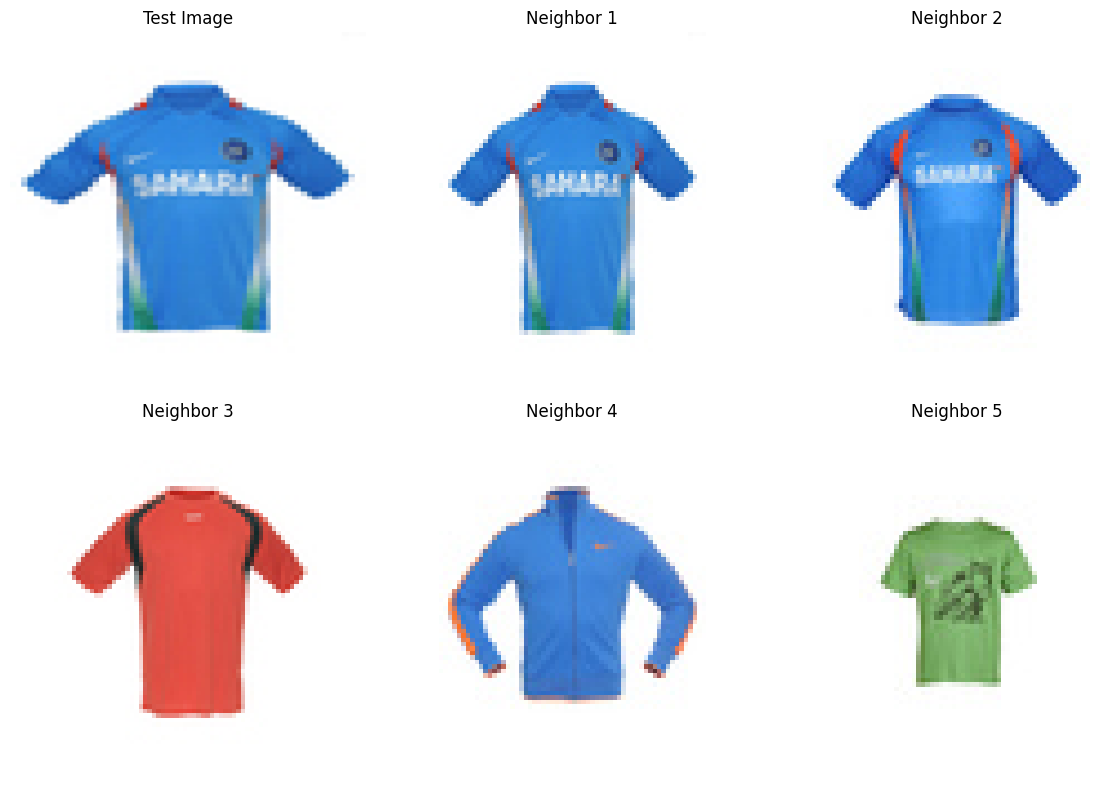

In [ ]:
# Create a dictionary to map image filenames to their corresponding season for the test_image folder
test_filename_to_season = {}
for file in os.listdir('/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/test_image'):
    if file.endswith('.jpg'):
        test_filename_to_season[file] = 'Unknown'  # You may set the season manually or leave it as 'Unknown'

# Specify the path to your test image directory
path_test_images = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/test_image'

# Specify the test image filename
test_image_filename = '1164.jpg'

# Check if the test image filename exists in the test_image dictionary
if test_image_filename in test_filename_to_season:
    # Load and preprocess the test image
    test_image_path = os.path.join(path_test_images, test_image_filename)
    test_image = image.load_img(test_image_path, target_size=(224, 224))
    test_image_array = image.img_to_array(test_image)
    expanded_test_image_array = np.expand_dims(test_image_array, axis=0)
    preprocessed_test_image = preprocess_input(expanded_test_image_array)

    # Extract features from the test image
    test_result = model.predict(preprocessed_test_image).flatten()
    normalized_test_result = test_result / norm(test_result)

    # Get a list of image filenames that exist in the images2 directory
    existing_image_filenames = [file for file in os.listdir(path_images) if file.endswith('.jpg')]

    # Process images from images2 and extract features
    filenames = [os.path.join(path_images, file) for file in existing_image_filenames]
    feature_list = []

    for file in tqdm(filenames):
        feature_list.append(extract_features(file, model))

    # Fit the Nearest Neighbors model
    neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    # Find the nearest neighbors of the test image
    distances, indices = neighbors.kneighbors([normalized_test_result])

    # Analyze the seasons of nearest neighbor images
    neighbor_seasons = [test_filename_to_season[existing_image_filenames[i]] for i in indices[0]]

    # Perform your seasonal trend analysis here
    print(f"Test Image: {test_image_filename}, Nearest Neighbors Seasons: {neighbor_seasons}")

    # Display the nearest neighbor images
    plt.figure(figsize=(12, 8))

    # Display the test image
    plt.subplot(2, 3, 1)
    plt.imshow(test_image)
    plt.title("Test Image")
    plt.axis('off')

    # Display the nearest neighbor images in a 2x3 grid
    for i, file_index in enumerate(indices[0]):
        if i < 5:  # Display up to 5 nearest neighbors
            temp = cv2.imread(filenames[file_index])
            plt.subplot(2, 3, i+2)
            plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
            plt.title(f"Neighbor {i + 1}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print(f"Test Image: {test_image_filename} not found in the test_image dictionary.")


  0%|          | 0/600 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/600 [00:01<12:37,  1.26s/it]

1/1 [==============================] - 0s 175ms/step


  0%|          | 2/600 [00:01<06:36,  1.51it/s]

1/1 [==============================] - 0s 179ms/step


  0%|          | 3/600 [00:01<05:16,  1.88it/s]

1/1 [==============================] - 0s 187ms/step


  1%|          | 4/600 [00:02<04:07,  2.41it/s]

1/1 [==============================] - 0s 292ms/step


  1%|          | 5/600 [00:02<04:00,  2.48it/s]

1/1 [==============================] - 0s 302ms/step


  1%|          | 6/600 [00:02<03:58,  2.49it/s]

1/1 [==============================] - 1s 527ms/step


  1%|          | 7/600 [00:03<05:06,  1.93it/s]

1/1 [==============================] - 0s 322ms/step


  1%|▏         | 8/600 [00:04<06:28,  1.52it/s]

1/1 [==============================] - 0s 295ms/step


  2%|▏         | 9/600 [00:05<05:41,  1.73it/s]

1/1 [==============================] - 0s 300ms/step


  2%|▏         | 10/600 [00:05<05:04,  1.94it/s]

1/1 [==============================] - 0s 331ms/step


  2%|▏         | 11/600 [00:05<04:43,  2.08it/s]

1/1 [==============================] - 0s 305ms/step


  2%|▏         | 12/600 [00:06<04:25,  2.21it/s]

1/1 [==============================] - 0s 201ms/step


  2%|▏         | 13/600 [00:06<04:17,  2.28it/s]

1/1 [==============================] - 0s 181ms/step


  2%|▏         | 14/600 [00:06<04:03,  2.40it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▎         | 15/600 [00:07<03:56,  2.48it/s]

1/1 [==============================] - 0s 186ms/step


  3%|▎         | 16/600 [00:07<03:26,  2.82it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 17/600 [00:07<03:05,  3.14it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 18/600 [00:08<02:51,  3.40it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 19/600 [00:08<02:40,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 20/600 [00:08<02:31,  3.82it/s]

1/1 [==============================] - 0s 182ms/step


  4%|▎         | 21/600 [00:08<02:51,  3.38it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▎         | 22/600 [00:09<02:39,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


  4%|▍         | 23/600 [00:09<02:33,  3.76it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 24/600 [00:09<02:28,  3.88it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 25/600 [00:09<02:23,  4.01it/s]

1/1 [==============================] - 0s 184ms/step


  4%|▍         | 26/600 [00:10<02:20,  4.08it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 27/600 [00:10<02:18,  4.13it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▍         | 28/600 [00:10<02:16,  4.19it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▍         | 29/600 [00:10<02:16,  4.19it/s]

1/1 [==============================] - 0s 180ms/step


  5%|▌         | 30/600 [00:10<02:15,  4.20it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▌         | 31/600 [00:11<02:14,  4.25it/s]

1/1 [==============================] - 0s 185ms/step


  5%|▌         | 32/600 [00:11<02:15,  4.20it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▌         | 33/600 [00:11<02:14,  4.22it/s]

1/1 [==============================] - 0s 185ms/step


  6%|▌         | 34/600 [00:11<02:14,  4.21it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 35/600 [00:12<02:12,  4.27it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▌         | 36/600 [00:12<02:11,  4.28it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 37/600 [00:12<02:10,  4.33it/s]

1/1 [==============================] - 0s 184ms/step


  6%|▋         | 38/600 [00:12<02:11,  4.26it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▋         | 39/600 [00:13<02:10,  4.29it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 40/600 [00:13<02:10,  4.28it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 41/600 [00:13<02:09,  4.30it/s]

1/1 [==============================] - 0s 186ms/step


  7%|▋         | 42/600 [00:13<02:12,  4.22it/s]

1/1 [==============================] - 0s 183ms/step


  7%|▋         | 43/600 [00:14<02:12,  4.20it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 44/600 [00:14<02:33,  3.61it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 45/600 [00:14<02:49,  3.27it/s]

1/1 [==============================] - 0s 186ms/step


  8%|▊         | 46/600 [00:15<02:37,  3.51it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 47/600 [00:15<02:52,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 48/600 [00:15<02:40,  3.45it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 49/600 [00:15<02:34,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 50/600 [00:16<02:48,  3.27it/s]

1/1 [==============================] - 0s 297ms/step


  8%|▊         | 51/600 [00:16<02:55,  3.12it/s]

1/1 [==============================] - 0s 300ms/step


  9%|▊         | 52/600 [00:17<03:08,  2.91it/s]

1/1 [==============================] - 0s 307ms/step


  9%|▉         | 53/600 [00:17<03:15,  2.80it/s]

1/1 [==============================] - 0s 308ms/step


  9%|▉         | 54/600 [00:17<03:20,  2.72it/s]

1/1 [==============================] - 0s 326ms/step


  9%|▉         | 55/600 [00:18<03:30,  2.59it/s]

1/1 [==============================] - 0s 303ms/step


  9%|▉         | 56/600 [00:18<03:29,  2.59it/s]

1/1 [==============================] - 0s 312ms/step


 10%|▉         | 57/600 [00:18<03:30,  2.58it/s]

1/1 [==============================] - 0s 307ms/step


 10%|▉         | 58/600 [00:19<03:34,  2.53it/s]

1/1 [==============================] - 0s 307ms/step


 10%|▉         | 59/600 [00:19<03:32,  2.55it/s]

1/1 [==============================] - 0s 306ms/step


 10%|█         | 60/600 [00:20<03:33,  2.53it/s]

1/1 [==============================] - 0s 301ms/step


 10%|█         | 61/600 [00:20<03:33,  2.53it/s]

1/1 [==============================] - 0s 182ms/step


 10%|█         | 62/600 [00:20<03:06,  2.88it/s]

1/1 [==============================] - 0s 187ms/step


 10%|█         | 63/600 [00:21<02:49,  3.16it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█         | 64/600 [00:21<02:35,  3.44it/s]

1/1 [==============================] - 0s 180ms/step


 11%|█         | 65/600 [00:21<02:48,  3.17it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█         | 66/600 [00:22<02:57,  3.00it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 67/600 [00:22<02:42,  3.28it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█▏        | 68/600 [00:22<02:29,  3.55it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 69/600 [00:22<02:21,  3.74it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 70/600 [00:22<02:16,  3.89it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█▏        | 71/600 [00:23<02:14,  3.95it/s]

1/1 [==============================] - 0s 187ms/step


 12%|█▏        | 72/600 [00:23<02:12,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█▏        | 73/600 [00:23<02:31,  3.48it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█▏        | 74/600 [00:24<02:24,  3.65it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▎        | 75/600 [00:24<02:17,  3.83it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 76/600 [00:24<02:34,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 77/600 [00:24<02:25,  3.60it/s]

1/1 [==============================] - 0s 187ms/step


 13%|█▎        | 78/600 [00:25<02:39,  3.28it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 79/600 [00:25<02:48,  3.09it/s]

1/1 [==============================] - 0s 171ms/step


 13%|█▎        | 80/600 [00:25<02:33,  3.38it/s]

1/1 [==============================] - 0s 192ms/step


 14%|█▎        | 81/600 [00:26<02:46,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▎        | 82/600 [00:26<02:32,  3.40it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▍        | 83/600 [00:26<02:43,  3.16it/s]

1/1 [==============================] - 0s 198ms/step


 14%|█▍        | 84/600 [00:27<02:51,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


 14%|█▍        | 85/600 [00:27<02:37,  3.26it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▍        | 86/600 [00:27<02:27,  3.49it/s]

1/1 [==============================] - 0s 259ms/step


 14%|█▍        | 87/600 [00:28<02:52,  2.97it/s]

1/1 [==============================] - 0s 420ms/step


 15%|█▍        | 88/600 [00:28<03:19,  2.57it/s]

1/1 [==============================] - 0s 347ms/step


 15%|█▍        | 89/600 [00:29<04:12,  2.02it/s]

1/1 [==============================] - 0s 333ms/step


 15%|█▌        | 90/600 [00:30<04:48,  1.77it/s]

1/1 [==============================] - 0s 183ms/step


 15%|█▌        | 91/600 [00:30<04:18,  1.97it/s]

1/1 [==============================] - 0s 280ms/step


 15%|█▌        | 92/600 [00:30<04:01,  2.10it/s]

1/1 [==============================] - 0s 306ms/step


 16%|█▌        | 93/600 [00:31<03:50,  2.20it/s]

1/1 [==============================] - 0s 299ms/step


 16%|█▌        | 94/600 [00:31<03:39,  2.31it/s]

1/1 [==============================] - 0s 305ms/step


 16%|█▌        | 95/600 [00:32<03:30,  2.40it/s]

1/1 [==============================] - 0s 309ms/step


 16%|█▌        | 96/600 [00:32<03:28,  2.42it/s]

1/1 [==============================] - 0s 314ms/step


 16%|█▌        | 97/600 [00:32<03:25,  2.44it/s]

1/1 [==============================] - 0s 306ms/step


 16%|█▋        | 98/600 [00:33<03:24,  2.45it/s]

1/1 [==============================] - 0s 302ms/step


 16%|█▋        | 99/600 [00:33<03:26,  2.42it/s]

1/1 [==============================] - 0s 309ms/step


 17%|█▋        | 100/600 [00:34<03:25,  2.44it/s]

1/1 [==============================] - 0s 306ms/step


 17%|█▋        | 101/600 [00:34<03:23,  2.45it/s]

1/1 [==============================] - 0s 227ms/step


 17%|█▋        | 102/600 [00:34<03:08,  2.65it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 103/600 [00:35<02:45,  3.00it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 104/600 [00:35<02:51,  2.90it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 105/600 [00:35<02:55,  2.82it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 106/600 [00:36<02:57,  2.78it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 107/600 [00:36<02:38,  3.11it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█▊        | 108/600 [00:36<02:27,  3.35it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 109/600 [00:37<02:36,  3.13it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 110/600 [00:37<02:23,  3.43it/s]

1/1 [==============================] - 0s 196ms/step


 18%|█▊        | 111/600 [00:37<02:16,  3.58it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▊        | 112/600 [00:37<02:09,  3.77it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▉        | 113/600 [00:38<02:26,  3.32it/s]

1/1 [==============================] - 0s 488ms/step


 19%|█▉        | 114/600 [00:38<03:23,  2.39it/s]

1/1 [==============================] - 0s 235ms/step


 19%|█▉        | 115/600 [00:39<03:23,  2.39it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▉        | 116/600 [00:39<02:55,  2.75it/s]

1/1 [==============================] - 0s 183ms/step


 20%|█▉        | 117/600 [00:39<02:38,  3.05it/s]

1/1 [==============================] - 0s 178ms/step


 20%|█▉        | 118/600 [00:39<02:24,  3.34it/s]

1/1 [==============================] - 0s 175ms/step


 20%|█▉        | 119/600 [00:40<02:13,  3.59it/s]

1/1 [==============================] - 0s 180ms/step


 20%|██        | 120/600 [00:40<02:07,  3.75it/s]

1/1 [==============================] - 0s 188ms/step


 20%|██        | 121/600 [00:40<02:23,  3.35it/s]

1/1 [==============================] - 0s 175ms/step


 20%|██        | 122/600 [00:41<02:14,  3.56it/s]

1/1 [==============================] - 0s 183ms/step


 20%|██        | 123/600 [00:41<02:07,  3.74it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 124/600 [00:41<02:02,  3.87it/s]

1/1 [==============================] - 0s 194ms/step


 21%|██        | 125/600 [00:41<02:21,  3.36it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 126/600 [00:42<02:31,  3.13it/s]

1/1 [==============================] - 0s 181ms/step


 21%|██        | 127/600 [00:42<02:19,  3.40it/s]

1/1 [==============================] - 0s 194ms/step


 21%|██▏       | 128/600 [00:42<02:29,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 129/600 [00:43<02:19,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 130/600 [00:43<02:10,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 22%|██▏       | 131/600 [00:43<02:05,  3.74it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 132/600 [00:43<02:01,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 133/600 [00:44<01:57,  3.98it/s]

1/1 [==============================] - 0s 185ms/step


 22%|██▏       | 134/600 [00:44<01:56,  4.00it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▎       | 135/600 [00:44<01:53,  4.10it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 136/600 [00:44<01:58,  3.93it/s]

1/1 [==============================] - 0s 309ms/step


 23%|██▎       | 137/600 [00:45<02:21,  3.27it/s]

1/1 [==============================] - 0s 305ms/step


 23%|██▎       | 138/600 [00:45<02:33,  3.01it/s]

1/1 [==============================] - 0s 323ms/step


 23%|██▎       | 139/600 [00:46<02:44,  2.80it/s]

1/1 [==============================] - 0s 306ms/step


 23%|██▎       | 140/600 [00:46<02:47,  2.74it/s]

1/1 [==============================] - 0s 299ms/step


 24%|██▎       | 141/600 [00:46<02:52,  2.66it/s]

1/1 [==============================] - 0s 324ms/step


 24%|██▎       | 142/600 [00:47<02:55,  2.60it/s]

1/1 [==============================] - 0s 300ms/step


 24%|██▍       | 143/600 [00:47<02:54,  2.63it/s]

1/1 [==============================] - 0s 315ms/step


 24%|██▍       | 144/600 [00:48<02:56,  2.59it/s]

1/1 [==============================] - 0s 301ms/step


 24%|██▍       | 145/600 [00:48<02:55,  2.60it/s]

1/1 [==============================] - 0s 298ms/step


 24%|██▍       | 146/600 [00:48<02:55,  2.58it/s]

1/1 [==============================] - 0s 228ms/step


 24%|██▍       | 147/600 [00:49<02:44,  2.75it/s]

1/1 [==============================] - 0s 178ms/step


 25%|██▍       | 148/600 [00:49<02:27,  3.07it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▍       | 149/600 [00:49<02:14,  3.36it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▌       | 150/600 [00:49<02:06,  3.55it/s]

1/1 [==============================] - 0s 187ms/step


 25%|██▌       | 151/600 [00:50<02:19,  3.23it/s]

1/1 [==============================] - 0s 183ms/step


 25%|██▌       | 152/600 [00:50<02:09,  3.47it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 153/600 [00:50<02:02,  3.65it/s]

1/1 [==============================] - 0s 177ms/step


 26%|██▌       | 154/600 [00:51<02:15,  3.28it/s]

1/1 [==============================] - 0s 177ms/step


 26%|██▌       | 155/600 [00:51<02:25,  3.06it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▌       | 156/600 [00:51<02:13,  3.34it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▌       | 157/600 [00:51<02:03,  3.59it/s]

1/1 [==============================] - 0s 175ms/step


 26%|██▋       | 158/600 [00:52<01:59,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▋       | 159/600 [00:52<02:12,  3.33it/s]

1/1 [==============================] - 0s 172ms/step


 27%|██▋       | 160/600 [00:52<02:20,  3.12it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 161/600 [00:53<02:09,  3.38it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 162/600 [00:53<02:19,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 163/600 [00:53<02:25,  2.99it/s]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 164/600 [00:54<02:12,  3.29it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██▊       | 165/600 [00:54<02:20,  3.09it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 166/600 [00:54<02:07,  3.40it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██▊       | 167/600 [00:54<02:00,  3.60it/s]

1/1 [==============================] - 0s 187ms/step


 28%|██▊       | 168/600 [00:55<02:12,  3.26it/s]

1/1 [==============================] - 0s 177ms/step


 28%|██▊       | 169/600 [00:55<02:02,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██▊       | 170/600 [00:55<01:58,  3.63it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██▊       | 171/600 [00:56<02:10,  3.30it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▊       | 172/600 [00:56<02:18,  3.10it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 173/600 [00:56<02:07,  3.34it/s]

1/1 [==============================] - 0s 193ms/step


 29%|██▉       | 174/600 [00:57<02:01,  3.51it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██▉       | 175/600 [00:57<02:13,  3.19it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▉       | 176/600 [00:57<02:03,  3.43it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 177/600 [00:58<02:13,  3.18it/s]

1/1 [==============================] - 0s 194ms/step


 30%|██▉       | 178/600 [00:58<02:21,  2.98it/s]

1/1 [==============================] - 0s 174ms/step


 30%|██▉       | 179/600 [00:58<02:25,  2.89it/s]

1/1 [==============================] - 0s 178ms/step


 30%|███       | 180/600 [00:59<02:11,  3.19it/s]

1/1 [==============================] - 0s 314ms/step


 30%|███       | 181/600 [00:59<02:22,  2.94it/s]

1/1 [==============================] - 0s 301ms/step


 30%|███       | 182/600 [00:59<02:31,  2.76it/s]

1/1 [==============================] - 0s 316ms/step


 30%|███       | 183/600 [01:00<02:35,  2.69it/s]

1/1 [==============================] - 0s 301ms/step


 31%|███       | 184/600 [01:00<02:38,  2.63it/s]

1/1 [==============================] - 1s 1s/step


 31%|███       | 185/600 [01:02<04:57,  1.39it/s]

1/1 [==============================] - 1s 558ms/step


 31%|███       | 186/600 [01:03<05:45,  1.20it/s]

1/1 [==============================] - 0s 231ms/step


 31%|███       | 187/600 [01:03<04:39,  1.48it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███▏      | 188/600 [01:03<04:01,  1.71it/s]

1/1 [==============================] - 0s 182ms/step


 32%|███▏      | 189/600 [01:04<03:33,  1.92it/s]

1/1 [==============================] - 0s 183ms/step


 32%|███▏      | 190/600 [01:04<02:59,  2.28it/s]

1/1 [==============================] - 0s 180ms/step


 32%|███▏      | 191/600 [01:04<02:34,  2.65it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 192/600 [01:05<02:16,  2.99it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 193/600 [01:05<02:20,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


 32%|███▏      | 194/600 [01:05<02:08,  3.16it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▎      | 195/600 [01:05<01:58,  3.43it/s]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 196/600 [01:06<02:08,  3.15it/s]

1/1 [==============================] - 0s 187ms/step


 33%|███▎      | 197/600 [01:06<02:14,  3.00it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 198/600 [01:06<02:01,  3.31it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 199/600 [01:07<01:53,  3.52it/s]

1/1 [==============================] - 0s 178ms/step


 33%|███▎      | 200/600 [01:07<01:48,  3.70it/s]

1/1 [==============================] - 0s 184ms/step


 34%|███▎      | 201/600 [01:07<01:44,  3.83it/s]

1/1 [==============================] - 0s 178ms/step


 34%|███▎      | 202/600 [01:07<01:40,  3.94it/s]

1/1 [==============================] - 0s 174ms/step


 34%|███▍      | 203/600 [01:08<01:37,  4.06it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▍      | 204/600 [01:08<01:36,  4.12it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 205/600 [01:08<01:35,  4.14it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▍      | 206/600 [01:08<01:51,  3.55it/s]

1/1 [==============================] - 0s 173ms/step


 34%|███▍      | 207/600 [01:09<01:44,  3.75it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███▍      | 208/600 [01:09<01:40,  3.90it/s]

1/1 [==============================] - 0s 184ms/step


 35%|███▍      | 209/600 [01:09<01:38,  3.97it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▌      | 210/600 [01:09<01:37,  4.01it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███▌      | 211/600 [01:10<01:36,  4.04it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▌      | 212/600 [01:10<01:34,  4.12it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███▌      | 213/600 [01:10<01:33,  4.15it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 214/600 [01:10<01:50,  3.51it/s]

1/1 [==============================] - 0s 186ms/step


 36%|███▌      | 215/600 [01:11<01:59,  3.22it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 216/600 [01:11<01:49,  3.51it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▌      | 217/600 [01:11<01:44,  3.66it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███▋      | 218/600 [01:12<01:40,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███▋      | 219/600 [01:12<01:37,  3.91it/s]

1/1 [==============================] - 0s 199ms/step


 37%|███▋      | 220/600 [01:12<01:50,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 221/600 [01:12<01:43,  3.66it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 222/600 [01:13<01:54,  3.31it/s]

1/1 [==============================] - 0s 185ms/step


 37%|███▋      | 223/600 [01:13<01:47,  3.52it/s]

1/1 [==============================] - 0s 296ms/step


 37%|███▋      | 224/600 [01:13<01:57,  3.19it/s]

1/1 [==============================] - 0s 306ms/step


 38%|███▊      | 225/600 [01:14<02:08,  2.92it/s]

1/1 [==============================] - 0s 301ms/step


 38%|███▊      | 226/600 [01:14<02:12,  2.83it/s]

1/1 [==============================] - 0s 321ms/step


 38%|███▊      | 227/600 [01:15<02:18,  2.69it/s]

1/1 [==============================] - 0s 308ms/step


 38%|███▊      | 228/600 [01:15<02:21,  2.63it/s]

1/1 [==============================] - 0s 313ms/step


 38%|███▊      | 229/600 [01:15<02:22,  2.60it/s]

1/1 [==============================] - 0s 311ms/step


 38%|███▊      | 230/600 [01:16<02:24,  2.55it/s]

1/1 [==============================] - 0s 314ms/step


 38%|███▊      | 231/600 [01:16<02:25,  2.53it/s]

1/1 [==============================] - 0s 319ms/step


 39%|███▊      | 232/600 [01:17<02:25,  2.53it/s]

1/1 [==============================] - 0s 302ms/step


 39%|███▉      | 233/600 [01:17<02:25,  2.52it/s]

1/1 [==============================] - 0s 236ms/step


 39%|███▉      | 234/600 [01:17<02:17,  2.66it/s]

1/1 [==============================] - 0s 176ms/step


 39%|███▉      | 235/600 [01:18<02:03,  2.94it/s]

1/1 [==============================] - 0s 191ms/step


 39%|███▉      | 236/600 [01:18<01:53,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 40%|███▉      | 237/600 [01:18<01:45,  3.44it/s]

1/1 [==============================] - 0s 182ms/step


 40%|███▉      | 238/600 [01:18<01:40,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 40%|███▉      | 239/600 [01:19<01:50,  3.27it/s]

1/1 [==============================] - 0s 182ms/step


 40%|████      | 240/600 [01:19<01:43,  3.49it/s]

1/1 [==============================] - 0s 170ms/step


 40%|████      | 241/600 [01:19<01:37,  3.69it/s]

1/1 [==============================] - 0s 179ms/step


 40%|████      | 242/600 [01:19<01:33,  3.82it/s]

1/1 [==============================] - 0s 180ms/step


 40%|████      | 243/600 [01:20<01:32,  3.85it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 244/600 [01:20<01:30,  3.95it/s]

1/1 [==============================] - 0s 181ms/step


 41%|████      | 245/600 [01:20<01:42,  3.45it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 246/600 [01:20<01:38,  3.59it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 247/600 [01:21<01:34,  3.73it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████▏     | 248/600 [01:21<01:45,  3.35it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 249/600 [01:21<01:52,  3.12it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 250/600 [01:22<01:43,  3.40it/s]

1/1 [==============================] - 0s 183ms/step


 42%|████▏     | 251/600 [01:22<01:37,  3.56it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 252/600 [01:22<01:32,  3.74it/s]

1/1 [==============================] - 0s 181ms/step


 42%|████▏     | 253/600 [01:22<01:30,  3.83it/s]

1/1 [==============================] - 0s 183ms/step


 42%|████▏     | 254/600 [01:23<01:43,  3.35it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▎     | 255/600 [01:23<01:36,  3.58it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 256/600 [01:23<01:31,  3.75it/s]

1/1 [==============================] - 0s 188ms/step


 43%|████▎     | 257/600 [01:24<01:30,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


 43%|████▎     | 258/600 [01:24<01:27,  3.92it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 259/600 [01:24<01:25,  3.97it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 260/600 [01:24<01:24,  4.03it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▎     | 261/600 [01:24<01:22,  4.10it/s]

1/1 [==============================] - 0s 182ms/step


 44%|████▎     | 262/600 [01:25<01:36,  3.50it/s]

1/1 [==============================] - 0s 180ms/step


 44%|████▍     | 263/600 [01:25<01:31,  3.66it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 264/600 [01:25<01:28,  3.81it/s]

1/1 [==============================] - 0s 193ms/step


 44%|████▍     | 265/600 [01:26<01:27,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 266/600 [01:26<01:24,  3.94it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▍     | 267/600 [01:26<01:37,  3.40it/s]

1/1 [==============================] - 0s 181ms/step


 45%|████▍     | 268/600 [01:27<01:45,  3.16it/s]

1/1 [==============================] - 0s 171ms/step


 45%|████▍     | 269/600 [01:27<01:36,  3.44it/s]

1/1 [==============================] - 0s 175ms/step


 45%|████▌     | 270/600 [01:27<01:43,  3.17it/s]

1/1 [==============================] - 0s 306ms/step


 45%|████▌     | 271/600 [01:28<01:52,  2.93it/s]

1/1 [==============================] - 0s 300ms/step


 45%|████▌     | 272/600 [01:28<01:58,  2.77it/s]

1/1 [==============================] - 0s 294ms/step


 46%|████▌     | 273/600 [01:28<01:57,  2.77it/s]

1/1 [==============================] - 0s 311ms/step


 46%|████▌     | 274/600 [01:29<02:01,  2.69it/s]

1/1 [==============================] - 0s 295ms/step


 46%|████▌     | 275/600 [01:29<02:03,  2.62it/s]

1/1 [==============================] - 0s 315ms/step


 46%|████▌     | 276/600 [01:30<02:05,  2.59it/s]

1/1 [==============================] - 0s 318ms/step


 46%|████▌     | 277/600 [01:30<02:07,  2.53it/s]

1/1 [==============================] - 0s 318ms/step


 46%|████▋     | 278/600 [01:30<02:06,  2.54it/s]

1/1 [==============================] - 0s 330ms/step


 46%|████▋     | 279/600 [01:31<02:37,  2.03it/s]

1/1 [==============================] - 0s 178ms/step


 47%|████▋     | 280/600 [01:31<02:15,  2.37it/s]

1/1 [==============================] - 0s 187ms/step


 47%|████▋     | 281/600 [01:32<01:57,  2.71it/s]

1/1 [==============================] - 0s 189ms/step


 47%|████▋     | 282/600 [01:32<01:58,  2.69it/s]

1/1 [==============================] - 0s 178ms/step


 47%|████▋     | 283/600 [01:32<01:45,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 47%|████▋     | 284/600 [01:32<01:36,  3.29it/s]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 285/600 [01:33<01:30,  3.48it/s]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 286/600 [01:33<01:37,  3.21it/s]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 287/600 [01:33<01:31,  3.43it/s]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 288/600 [01:34<01:25,  3.64it/s]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 289/600 [01:34<01:21,  3.82it/s]

1/1 [==============================] - 0s 170ms/step


 48%|████▊     | 290/600 [01:34<01:19,  3.92it/s]

1/1 [==============================] - 0s 175ms/step


 48%|████▊     | 291/600 [01:34<01:16,  4.03it/s]

1/1 [==============================] - 0s 174ms/step


 49%|████▊     | 292/600 [01:35<01:28,  3.49it/s]

1/1 [==============================] - 0s 184ms/step


 49%|████▉     | 293/600 [01:35<01:23,  3.66it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 294/600 [01:35<01:20,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 49%|████▉     | 295/600 [01:35<01:29,  3.39it/s]

1/1 [==============================] - 0s 178ms/step


 49%|████▉     | 296/600 [01:36<01:24,  3.59it/s]

1/1 [==============================] - 0s 192ms/step


 50%|████▉     | 297/600 [01:36<01:32,  3.27it/s]

1/1 [==============================] - 0s 177ms/step


 50%|████▉     | 298/600 [01:36<01:25,  3.51it/s]

1/1 [==============================] - 0s 180ms/step


 50%|████▉     | 299/600 [01:37<01:33,  3.23it/s]

1/1 [==============================] - 0s 195ms/step


 50%|█████     | 300/600 [01:37<01:28,  3.41it/s]

1/1 [==============================] - 0s 173ms/step


 50%|█████     | 301/600 [01:37<01:22,  3.62it/s]

1/1 [==============================] - 0s 181ms/step


 50%|█████     | 302/600 [01:37<01:19,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


 50%|█████     | 303/600 [01:38<01:29,  3.32it/s]

1/1 [==============================] - 0s 194ms/step


 51%|█████     | 304/600 [01:38<01:35,  3.10it/s]

1/1 [==============================] - 0s 177ms/step


 51%|█████     | 305/600 [01:38<01:27,  3.38it/s]

1/1 [==============================] - 0s 179ms/step


 51%|█████     | 306/600 [01:39<01:22,  3.58it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 307/600 [01:39<01:18,  3.75it/s]

1/1 [==============================] - 0s 180ms/step


 51%|█████▏    | 308/600 [01:39<01:17,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 52%|█████▏    | 309/600 [01:39<01:14,  3.90it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 310/600 [01:40<01:13,  3.97it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 311/600 [01:40<01:22,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 312/600 [01:40<01:29,  3.20it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 313/600 [01:41<01:23,  3.44it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 314/600 [01:41<01:19,  3.60it/s]

1/1 [==============================] - 0s 185ms/step


 52%|█████▎    | 315/600 [01:41<01:16,  3.71it/s]

1/1 [==============================] - 0s 297ms/step


 53%|█████▎    | 316/600 [01:41<01:24,  3.36it/s]

1/1 [==============================] - 0s 318ms/step


 53%|█████▎    | 317/600 [01:42<01:36,  2.94it/s]

1/1 [==============================] - 0s 326ms/step


 53%|█████▎    | 318/600 [01:42<01:40,  2.80it/s]

1/1 [==============================] - 0s 300ms/step


 53%|█████▎    | 319/600 [01:43<01:45,  2.66it/s]

1/1 [==============================] - 0s 313ms/step


 53%|█████▎    | 320/600 [01:43<01:46,  2.64it/s]

1/1 [==============================] - 0s 300ms/step


 54%|█████▎    | 321/600 [01:44<01:45,  2.64it/s]

1/1 [==============================] - 0s 382ms/step


 54%|█████▎    | 322/600 [01:44<01:52,  2.47it/s]

1/1 [==============================] - 1s 1s/step


 54%|█████▍    | 323/600 [01:45<03:17,  1.40it/s]

1/1 [==============================] - 0s 218ms/step


 54%|█████▍    | 324/600 [01:46<02:58,  1.54it/s]

1/1 [==============================] - 0s 451ms/step


 54%|█████▍    | 325/600 [01:47<03:22,  1.36it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▍    | 326/600 [01:47<02:41,  1.70it/s]

1/1 [==============================] - 0s 186ms/step


 55%|█████▍    | 327/600 [01:47<02:12,  2.05it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▍    | 328/600 [01:48<01:52,  2.43it/s]

1/1 [==============================] - 0s 198ms/step


 55%|█████▍    | 329/600 [01:48<01:39,  2.73it/s]

1/1 [==============================] - 0s 180ms/step


 55%|█████▌    | 330/600 [01:48<01:28,  3.04it/s]

1/1 [==============================] - 0s 185ms/step


 55%|█████▌    | 331/600 [01:48<01:21,  3.30it/s]

1/1 [==============================] - 0s 177ms/step


 55%|█████▌    | 332/600 [01:49<01:16,  3.51it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▌    | 333/600 [01:49<01:13,  3.64it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 334/600 [01:49<01:10,  3.78it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 335/600 [01:49<01:07,  3.93it/s]

1/1 [==============================] - 0s 191ms/step


 56%|█████▌    | 336/600 [01:50<01:17,  3.41it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 337/600 [01:50<01:12,  3.64it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▋    | 338/600 [01:50<01:08,  3.83it/s]

1/1 [==============================] - 0s 194ms/step


 56%|█████▋    | 339/600 [01:50<01:07,  3.87it/s]

1/1 [==============================] - 0s 180ms/step


 57%|█████▋    | 340/600 [01:51<01:05,  3.96it/s]

1/1 [==============================] - 0s 172ms/step


 57%|█████▋    | 341/600 [01:51<01:04,  3.99it/s]

1/1 [==============================] - 0s 170ms/step


 57%|█████▋    | 342/600 [01:51<01:14,  3.46it/s]

1/1 [==============================] - 0s 191ms/step


 57%|█████▋    | 343/600 [01:52<01:21,  3.17it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 344/600 [01:52<01:14,  3.44it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▊    | 345/600 [01:52<01:20,  3.17it/s]

1/1 [==============================] - 0s 187ms/step


 58%|█████▊    | 346/600 [01:52<01:14,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████▊    | 347/600 [01:53<01:20,  3.13it/s]

1/1 [==============================] - 0s 192ms/step


 58%|█████▊    | 348/600 [01:53<01:15,  3.36it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 349/600 [01:53<01:11,  3.52it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 350/600 [01:54<01:41,  2.47it/s]

1/1 [==============================] - 0s 190ms/step


 58%|█████▊    | 351/600 [01:54<01:29,  2.78it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████▊    | 352/600 [01:55<01:22,  3.01it/s]

1/1 [==============================] - 0s 180ms/step


 59%|█████▉    | 353/600 [01:55<01:15,  3.28it/s]

1/1 [==============================] - 0s 183ms/step


 59%|█████▉    | 354/600 [01:55<01:21,  3.04it/s]

1/1 [==============================] - 0s 183ms/step


 59%|█████▉    | 355/600 [01:55<01:14,  3.27it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████▉    | 356/600 [01:56<01:11,  3.39it/s]

1/1 [==============================] - 0s 317ms/step


 60%|█████▉    | 357/600 [01:56<01:20,  3.04it/s]

1/1 [==============================] - 0s 322ms/step


 60%|█████▉    | 358/600 [01:57<01:25,  2.83it/s]

1/1 [==============================] - 0s 311ms/step


 60%|█████▉    | 359/600 [01:57<01:29,  2.71it/s]

1/1 [==============================] - 0s 305ms/step


 60%|██████    | 360/600 [01:57<01:30,  2.64it/s]

1/1 [==============================] - 0s 298ms/step


 60%|██████    | 361/600 [01:58<01:34,  2.54it/s]

1/1 [==============================] - 0s 308ms/step


 60%|██████    | 362/600 [01:58<01:33,  2.53it/s]

1/1 [==============================] - 0s 305ms/step


 60%|██████    | 363/600 [01:59<01:35,  2.48it/s]

1/1 [==============================] - 0s 324ms/step


 61%|██████    | 364/600 [01:59<01:36,  2.45it/s]

1/1 [==============================] - 0s 311ms/step


 61%|██████    | 365/600 [01:59<01:36,  2.43it/s]

1/1 [==============================] - 0s 322ms/step


 61%|██████    | 366/600 [02:00<01:36,  2.42it/s]

1/1 [==============================] - 0s 184ms/step


 61%|██████    | 367/600 [02:00<01:26,  2.68it/s]

1/1 [==============================] - 0s 187ms/step


 61%|██████▏   | 368/600 [02:00<01:26,  2.67it/s]

1/1 [==============================] - 0s 196ms/step


 62%|██████▏   | 369/600 [02:01<01:27,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 62%|██████▏   | 370/600 [02:01<01:18,  2.94it/s]

1/1 [==============================] - 0s 183ms/step


 62%|██████▏   | 371/600 [02:02<01:21,  2.82it/s]

1/1 [==============================] - 0s 199ms/step


 62%|██████▏   | 372/600 [02:02<01:14,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


 62%|██████▏   | 373/600 [02:02<01:08,  3.29it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 374/600 [02:02<01:05,  3.45it/s]

1/1 [==============================] - 0s 190ms/step


 62%|██████▎   | 375/600 [02:03<01:11,  3.15it/s]

1/1 [==============================] - 0s 183ms/step


 63%|██████▎   | 376/600 [02:03<01:06,  3.35it/s]

1/1 [==============================] - 0s 187ms/step


 63%|██████▎   | 377/600 [02:03<01:12,  3.07it/s]

1/1 [==============================] - 0s 200ms/step


 63%|██████▎   | 378/600 [02:04<01:16,  2.89it/s]

1/1 [==============================] - 0s 196ms/step


 63%|██████▎   | 379/600 [02:04<01:19,  2.78it/s]

1/1 [==============================] - 0s 183ms/step


 63%|██████▎   | 380/600 [02:04<01:20,  2.73it/s]

1/1 [==============================] - 0s 185ms/step


 64%|██████▎   | 381/600 [02:05<01:12,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


 64%|██████▎   | 382/600 [02:05<01:08,  3.17it/s]

1/1 [==============================] - 0s 189ms/step


 64%|██████▍   | 383/600 [02:05<01:12,  2.98it/s]

1/1 [==============================] - 0s 195ms/step


 64%|██████▍   | 384/600 [02:06<01:07,  3.21it/s]

1/1 [==============================] - 0s 191ms/step


 64%|██████▍   | 385/600 [02:06<01:03,  3.39it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▍   | 386/600 [02:06<01:00,  3.54it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▍   | 387/600 [02:07<01:06,  3.22it/s]

1/1 [==============================] - 0s 176ms/step


 65%|██████▍   | 388/600 [02:07<01:10,  3.02it/s]

1/1 [==============================] - 0s 186ms/step


 65%|██████▍   | 389/600 [02:07<01:12,  2.90it/s]

1/1 [==============================] - 0s 195ms/step


 65%|██████▌   | 390/600 [02:08<01:07,  3.11it/s]

1/1 [==============================] - 0s 180ms/step


 65%|██████▌   | 391/600 [02:08<01:02,  3.34it/s]

1/1 [==============================] - 0s 189ms/step


 65%|██████▌   | 392/600 [02:08<01:07,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


 66%|██████▌   | 393/600 [02:09<01:10,  2.93it/s]

1/1 [==============================] - 0s 177ms/step


 66%|██████▌   | 394/600 [02:09<01:04,  3.22it/s]

1/1 [==============================] - 0s 172ms/step


 66%|██████▌   | 395/600 [02:09<00:59,  3.42it/s]

1/1 [==============================] - 0s 185ms/step


 66%|██████▌   | 396/600 [02:09<00:56,  3.61it/s]

1/1 [==============================] - 0s 179ms/step


 66%|██████▌   | 397/600 [02:10<00:54,  3.75it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▋   | 398/600 [02:10<00:52,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 66%|██████▋   | 399/600 [02:10<00:56,  3.56it/s]

1/1 [==============================] - 0s 302ms/step


 67%|██████▋   | 400/600 [02:11<01:02,  3.22it/s]

1/1 [==============================] - 0s 305ms/step


 67%|██████▋   | 401/600 [02:11<01:06,  3.00it/s]

1/1 [==============================] - 0s 302ms/step


 67%|██████▋   | 402/600 [02:11<01:10,  2.80it/s]

1/1 [==============================] - 0s 323ms/step


 67%|██████▋   | 403/600 [02:12<01:13,  2.68it/s]

1/1 [==============================] - 0s 327ms/step


 67%|██████▋   | 404/600 [02:12<01:14,  2.62it/s]

1/1 [==============================] - 0s 301ms/step


 68%|██████▊   | 405/600 [02:13<01:16,  2.56it/s]

1/1 [==============================] - 0s 300ms/step


 68%|██████▊   | 406/600 [02:13<01:16,  2.53it/s]

1/1 [==============================] - 0s 322ms/step


 68%|██████▊   | 407/600 [02:13<01:18,  2.45it/s]

1/1 [==============================] - 0s 323ms/step


 68%|██████▊   | 408/600 [02:14<01:18,  2.46it/s]

1/1 [==============================] - 0s 313ms/step


 68%|██████▊   | 409/600 [02:14<01:18,  2.44it/s]

1/1 [==============================] - 0s 178ms/step


 68%|██████▊   | 410/600 [02:14<01:09,  2.74it/s]

1/1 [==============================] - 0s 183ms/step


 68%|██████▊   | 411/600 [02:15<01:10,  2.70it/s]

1/1 [==============================] - 0s 179ms/step


 69%|██████▊   | 412/600 [02:15<01:02,  3.01it/s]

1/1 [==============================] - 0s 184ms/step


 69%|██████▉   | 413/600 [02:15<00:57,  3.26it/s]

1/1 [==============================] - 0s 181ms/step


 69%|██████▉   | 414/600 [02:16<01:01,  3.04it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 415/600 [02:16<00:56,  3.26it/s]

1/1 [==============================] - 0s 188ms/step


 69%|██████▉   | 416/600 [02:16<00:53,  3.47it/s]

1/1 [==============================] - 0s 176ms/step


 70%|██████▉   | 417/600 [02:16<00:50,  3.64it/s]

1/1 [==============================] - 0s 183ms/step


 70%|██████▉   | 418/600 [02:17<00:48,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 70%|██████▉   | 419/600 [02:17<00:46,  3.85it/s]

1/1 [==============================] - 0s 185ms/step


 70%|███████   | 420/600 [02:17<00:52,  3.40it/s]

1/1 [==============================] - 0s 184ms/step


 70%|███████   | 421/600 [02:18<00:49,  3.59it/s]

1/1 [==============================] - 0s 175ms/step


 70%|███████   | 422/600 [02:18<00:47,  3.73it/s]

1/1 [==============================] - 0s 182ms/step


 70%|███████   | 423/600 [02:18<00:47,  3.71it/s]

1/1 [==============================] - 0s 195ms/step


 71%|███████   | 424/600 [02:18<00:46,  3.77it/s]

1/1 [==============================] - 0s 189ms/step


 71%|███████   | 425/600 [02:19<00:52,  3.35it/s]

1/1 [==============================] - 0s 180ms/step


 71%|███████   | 426/600 [02:19<00:55,  3.12it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 427/600 [02:19<00:51,  3.34it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████▏  | 428/600 [02:20<00:55,  3.10it/s]

1/1 [==============================] - 0s 175ms/step


 72%|███████▏  | 429/600 [02:20<00:50,  3.38it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 430/600 [02:20<00:46,  3.65it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 431/600 [02:20<00:45,  3.70it/s]

1/1 [==============================] - 0s 186ms/step


 72%|███████▏  | 432/600 [02:21<00:44,  3.81it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 433/600 [02:21<00:49,  3.37it/s]

1/1 [==============================] - 0s 173ms/step


 72%|███████▏  | 434/600 [02:21<00:46,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 72%|███████▎  | 435/600 [02:22<00:51,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 73%|███████▎  | 436/600 [02:22<00:47,  3.46it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 437/600 [02:22<00:44,  3.67it/s]

1/1 [==============================] - 0s 182ms/step


 73%|███████▎  | 438/600 [02:23<00:48,  3.31it/s]

1/1 [==============================] - 0s 184ms/step


 73%|███████▎  | 439/600 [02:23<00:46,  3.48it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 440/600 [02:23<00:50,  3.17it/s]

1/1 [==============================] - 0s 191ms/step


 74%|███████▎  | 441/600 [02:23<00:46,  3.39it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▎  | 442/600 [02:24<00:50,  3.12it/s]

1/1 [==============================] - 0s 179ms/step


 74%|███████▍  | 443/600 [02:24<00:46,  3.38it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▍  | 444/600 [02:24<00:43,  3.58it/s]

1/1 [==============================] - 0s 318ms/step


 74%|███████▍  | 445/600 [02:25<00:48,  3.18it/s]

1/1 [==============================] - 0s 301ms/step


 74%|███████▍  | 446/600 [02:25<00:53,  2.90it/s]

1/1 [==============================] - 0s 319ms/step


 74%|███████▍  | 447/600 [02:25<00:55,  2.75it/s]

1/1 [==============================] - 0s 322ms/step


 75%|███████▍  | 448/600 [02:26<00:57,  2.63it/s]

1/1 [==============================] - 0s 306ms/step


 75%|███████▍  | 449/600 [02:26<00:58,  2.58it/s]

1/1 [==============================] - 0s 319ms/step


 75%|███████▌  | 450/600 [02:27<00:59,  2.51it/s]

1/1 [==============================] - 0s 301ms/step


 75%|███████▌  | 451/600 [02:27<01:01,  2.44it/s]

1/1 [==============================] - 0s 333ms/step


 75%|███████▌  | 452/600 [02:28<01:00,  2.43it/s]

1/1 [==============================] - 0s 318ms/step


 76%|███████▌  | 453/600 [02:28<01:00,  2.43it/s]

1/1 [==============================] - 0s 302ms/step


 76%|███████▌  | 454/600 [02:28<00:58,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


 76%|███████▌  | 455/600 [02:29<00:59,  2.42it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▌  | 456/600 [02:29<00:51,  2.77it/s]

1/1 [==============================] - 0s 172ms/step


 76%|███████▌  | 457/600 [02:29<00:46,  3.10it/s]

1/1 [==============================] - 0s 179ms/step


 76%|███████▋  | 458/600 [02:30<00:42,  3.36it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████▋  | 459/600 [02:30<00:39,  3.53it/s]

1/1 [==============================] - 0s 180ms/step


 77%|███████▋  | 460/600 [02:30<00:43,  3.22it/s]

1/1 [==============================] - 0s 186ms/step


 77%|███████▋  | 461/600 [02:30<00:40,  3.45it/s]

1/1 [==============================] - 0s 187ms/step


 77%|███████▋  | 462/600 [02:31<00:38,  3.62it/s]

1/1 [==============================] - 0s 187ms/step


 77%|███████▋  | 463/600 [02:31<00:37,  3.69it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 464/600 [02:31<00:35,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 465/600 [02:31<00:34,  3.94it/s]

1/1 [==============================] - 0s 181ms/step


 78%|███████▊  | 466/600 [02:32<00:33,  3.99it/s]

1/1 [==============================] - 0s 192ms/step


 78%|███████▊  | 467/600 [02:32<00:33,  3.96it/s]

1/1 [==============================] - 0s 176ms/step


 78%|███████▊  | 468/600 [02:32<00:32,  4.03it/s]

1/1 [==============================] - 0s 180ms/step


 78%|███████▊  | 469/600 [02:32<00:32,  4.06it/s]

1/1 [==============================] - 0s 175ms/step


 78%|███████▊  | 470/600 [02:33<00:31,  4.10it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 471/600 [02:33<00:32,  4.00it/s]

1/1 [==============================] - 0s 185ms/step


 79%|███████▊  | 472/600 [02:33<00:32,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 473/600 [02:33<00:31,  4.05it/s]

1/1 [==============================] - 0s 183ms/step


 79%|███████▉  | 474/600 [02:34<00:31,  4.04it/s]

1/1 [==============================] - 0s 182ms/step


 79%|███████▉  | 475/600 [02:34<00:30,  4.04it/s]

1/1 [==============================] - 0s 179ms/step


 79%|███████▉  | 476/600 [02:34<00:30,  4.09it/s]

1/1 [==============================] - 0s 174ms/step


 80%|███████▉  | 477/600 [02:34<00:29,  4.12it/s]

1/1 [==============================] - 0s 183ms/step


 80%|███████▉  | 478/600 [02:35<00:30,  4.06it/s]

1/1 [==============================] - 0s 178ms/step


 80%|███████▉  | 479/600 [02:35<00:29,  4.07it/s]

1/1 [==============================] - 0s 176ms/step


 80%|████████  | 480/600 [02:35<00:29,  4.00it/s]

1/1 [==============================] - 0s 177ms/step


 80%|████████  | 481/600 [02:35<00:34,  3.45it/s]

1/1 [==============================] - 0s 183ms/step


 80%|████████  | 482/600 [02:36<00:32,  3.64it/s]

1/1 [==============================] - 0s 191ms/step


 80%|████████  | 483/600 [02:36<00:35,  3.27it/s]

1/1 [==============================] - 0s 182ms/step


 81%|████████  | 484/600 [02:36<00:33,  3.50it/s]

1/1 [==============================] - 0s 174ms/step


 81%|████████  | 485/600 [02:37<00:35,  3.20it/s]

1/1 [==============================] - 0s 186ms/step


 81%|████████  | 486/600 [02:37<00:33,  3.42it/s]

1/1 [==============================] - 0s 179ms/step


 81%|████████  | 487/600 [02:37<00:31,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 81%|████████▏ | 488/600 [02:38<00:34,  3.24it/s]

1/1 [==============================] - 0s 180ms/step


 82%|████████▏ | 489/600 [02:38<00:31,  3.48it/s]

1/1 [==============================] - 0s 189ms/step


 82%|████████▏ | 490/600 [02:38<00:34,  3.19it/s]

1/1 [==============================] - 0s 175ms/step


 82%|████████▏ | 491/600 [02:38<00:31,  3.44it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 492/600 [02:39<00:34,  3.16it/s]

1/1 [==============================] - 0s 325ms/step


 82%|████████▏ | 493/600 [02:39<00:36,  2.91it/s]

1/1 [==============================] - 0s 307ms/step


 82%|████████▏ | 494/600 [02:40<00:38,  2.72it/s]

1/1 [==============================] - 0s 312ms/step


 82%|████████▎ | 495/600 [02:40<00:39,  2.65it/s]

1/1 [==============================] - 0s 305ms/step


 83%|████████▎ | 496/600 [02:40<00:40,  2.55it/s]

1/1 [==============================] - 0s 302ms/step


 83%|████████▎ | 497/600 [02:41<00:40,  2.54it/s]

1/1 [==============================] - 0s 297ms/step


 83%|████████▎ | 498/600 [02:41<00:39,  2.55it/s]

1/1 [==============================] - 0s 305ms/step


 83%|████████▎ | 499/600 [02:42<00:40,  2.52it/s]

1/1 [==============================] - 0s 289ms/step


 83%|████████▎ | 500/600 [02:42<00:40,  2.48it/s]

1/1 [==============================] - 0s 299ms/step


 84%|████████▎ | 501/600 [02:42<00:39,  2.48it/s]

1/1 [==============================] - 0s 305ms/step


 84%|████████▎ | 502/600 [02:43<00:39,  2.48it/s]

1/1 [==============================] - 0s 176ms/step


 84%|████████▍ | 503/600 [02:43<00:34,  2.82it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 504/600 [02:43<00:31,  3.07it/s]

1/1 [==============================] - 0s 183ms/step


 84%|████████▍ | 505/600 [02:44<00:28,  3.31it/s]

1/1 [==============================] - 0s 179ms/step


 84%|████████▍ | 506/600 [02:44<00:26,  3.50it/s]

1/1 [==============================] - 0s 180ms/step


 84%|████████▍ | 507/600 [02:44<00:25,  3.66it/s]

1/1 [==============================] - 0s 196ms/step


 85%|████████▍ | 508/600 [02:44<00:24,  3.73it/s]

1/1 [==============================] - 0s 181ms/step


 85%|████████▍ | 509/600 [02:45<00:23,  3.84it/s]

1/1 [==============================] - 0s 184ms/step


 85%|████████▌ | 510/600 [02:45<00:23,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 85%|████████▌ | 511/600 [02:45<00:26,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


 85%|████████▌ | 512/600 [02:46<00:28,  3.14it/s]

1/1 [==============================] - 0s 194ms/step


 86%|████████▌ | 513/600 [02:46<00:26,  3.33it/s]

1/1 [==============================] - 0s 171ms/step


 86%|████████▌ | 514/600 [02:46<00:24,  3.58it/s]

1/1 [==============================] - 0s 188ms/step


 86%|████████▌ | 515/600 [02:46<00:23,  3.67it/s]

1/1 [==============================] - 0s 183ms/step


 86%|████████▌ | 516/600 [02:47<00:25,  3.31it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 517/600 [02:47<00:26,  3.10it/s]

1/1 [==============================] - 0s 186ms/step


 86%|████████▋ | 518/600 [02:47<00:24,  3.33it/s]

1/1 [==============================] - 0s 187ms/step


 86%|████████▋ | 519/600 [02:48<00:26,  3.09it/s]

1/1 [==============================] - 0s 196ms/step


 87%|████████▋ | 520/600 [02:48<00:27,  2.93it/s]

1/1 [==============================] - 0s 194ms/step


 87%|████████▋ | 521/600 [02:48<00:24,  3.18it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 522/600 [02:49<00:22,  3.43it/s]

1/1 [==============================] - 0s 186ms/step


 87%|████████▋ | 523/600 [02:49<00:21,  3.57it/s]

1/1 [==============================] - 0s 172ms/step


 87%|████████▋ | 524/600 [02:49<00:20,  3.74it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████▊ | 525/600 [02:49<00:19,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 526/600 [02:50<00:18,  3.90it/s]

1/1 [==============================] - 0s 180ms/step


 88%|████████▊ | 527/600 [02:50<00:18,  3.95it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 528/600 [02:50<00:18,  3.99it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 529/600 [02:50<00:17,  4.00it/s]

1/1 [==============================] - 0s 178ms/step


 88%|████████▊ | 530/600 [02:51<00:20,  3.46it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 531/600 [02:51<00:18,  3.68it/s]

1/1 [==============================] - 0s 172ms/step


 89%|████████▊ | 532/600 [02:51<00:17,  3.78it/s]

1/1 [==============================] - 0s 192ms/step


 89%|████████▉ | 533/600 [02:51<00:17,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


 89%|████████▉ | 534/600 [02:52<00:16,  3.93it/s]

1/1 [==============================] - 0s 179ms/step


 89%|████████▉ | 535/600 [02:52<00:16,  3.98it/s]

1/1 [==============================] - 0s 173ms/step


 89%|████████▉ | 536/600 [02:52<00:15,  4.02it/s]

1/1 [==============================] - 0s 184ms/step


 90%|████████▉ | 537/600 [02:52<00:15,  3.99it/s]

1/1 [==============================] - 0s 191ms/step


 90%|████████▉ | 538/600 [02:53<00:17,  3.47it/s]

1/1 [==============================] - 0s 267ms/step


 90%|████████▉ | 539/600 [02:53<00:19,  3.20it/s]

1/1 [==============================] - 0s 320ms/step


 90%|█████████ | 540/600 [02:54<00:20,  2.92it/s]

1/1 [==============================] - 0s 317ms/step


 90%|█████████ | 541/600 [02:54<00:21,  2.75it/s]

1/1 [==============================] - 0s 301ms/step


 90%|█████████ | 542/600 [02:54<00:21,  2.71it/s]

1/1 [==============================] - 0s 321ms/step


 90%|█████████ | 543/600 [02:55<00:21,  2.66it/s]

1/1 [==============================] - 0s 314ms/step


 91%|█████████ | 544/600 [02:55<00:21,  2.57it/s]

1/1 [==============================] - 0s 304ms/step


 91%|█████████ | 545/600 [02:56<00:21,  2.53it/s]

1/1 [==============================] - 0s 303ms/step


 91%|█████████ | 546/600 [02:56<00:21,  2.52it/s]

1/1 [==============================] - 0s 307ms/step


 91%|█████████ | 547/600 [02:56<00:21,  2.51it/s]

1/1 [==============================] - 0s 300ms/step


 91%|█████████▏| 548/600 [02:57<00:20,  2.48it/s]

1/1 [==============================] - 0s 299ms/step


 92%|█████████▏| 549/600 [02:57<00:20,  2.49it/s]

1/1 [==============================] - 0s 184ms/step


 92%|█████████▏| 550/600 [02:58<00:20,  2.50it/s]

1/1 [==============================] - 0s 185ms/step


 92%|█████████▏| 551/600 [02:58<00:19,  2.54it/s]

1/1 [==============================] - 0s 169ms/step


 92%|█████████▏| 552/600 [02:58<00:16,  2.91it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 553/600 [02:58<00:14,  3.18it/s]

1/1 [==============================] - 0s 186ms/step


 92%|█████████▏| 554/600 [02:59<00:13,  3.40it/s]

1/1 [==============================] - 0s 178ms/step


 92%|█████████▎| 555/600 [02:59<00:12,  3.54it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 556/600 [02:59<00:13,  3.23it/s]

1/1 [==============================] - 0s 184ms/step


 93%|█████████▎| 557/600 [03:00<00:12,  3.44it/s]

1/1 [==============================] - 0s 186ms/step


 93%|█████████▎| 558/600 [03:00<00:11,  3.60it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 559/600 [03:00<00:11,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 93%|█████████▎| 560/600 [03:00<00:10,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


 94%|█████████▎| 561/600 [03:01<00:11,  3.33it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████▎| 562/600 [03:01<00:12,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▍| 563/600 [03:01<00:11,  3.35it/s]

1/1 [==============================] - 0s 177ms/step


 94%|█████████▍| 564/600 [03:02<00:11,  3.10it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████▍| 565/600 [03:02<00:10,  3.29it/s]

1/1 [==============================] - 0s 181ms/step


 94%|█████████▍| 566/600 [03:02<00:11,  3.08it/s]

1/1 [==============================] - 0s 177ms/step


 94%|█████████▍| 567/600 [03:03<00:09,  3.36it/s]

1/1 [==============================] - 0s 191ms/step


 95%|█████████▍| 568/600 [03:03<00:10,  3.12it/s]

1/1 [==============================] - 0s 179ms/step


 95%|█████████▍| 569/600 [03:03<00:09,  3.37it/s]

1/1 [==============================] - 0s 171ms/step


 95%|█████████▌| 570/600 [03:03<00:08,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 95%|█████████▌| 571/600 [03:04<00:08,  3.26it/s]

1/1 [==============================] - 0s 179ms/step


 95%|█████████▌| 572/600 [03:04<00:08,  3.47it/s]

1/1 [==============================] - 0s 170ms/step


 96%|█████████▌| 573/600 [03:04<00:08,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 96%|█████████▌| 574/600 [03:05<00:07,  3.40it/s]

1/1 [==============================] - 0s 200ms/step


 96%|█████████▌| 575/600 [03:05<00:07,  3.14it/s]

1/1 [==============================] - 0s 175ms/step


 96%|█████████▌| 576/600 [03:05<00:08,  3.00it/s]

1/1 [==============================] - 0s 178ms/step


 96%|█████████▌| 577/600 [03:06<00:07,  3.25it/s]

1/1 [==============================] - 0s 186ms/step


 96%|█████████▋| 578/600 [03:06<00:06,  3.45it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▋| 579/600 [03:06<00:05,  3.61it/s]

1/1 [==============================] - 0s 183ms/step


 97%|█████████▋| 580/600 [03:06<00:05,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 97%|█████████▋| 581/600 [03:07<00:04,  3.83it/s]

1/1 [==============================] - 0s 186ms/step


 97%|█████████▋| 582/600 [03:07<00:05,  3.38it/s]

1/1 [==============================] - 0s 180ms/step


 97%|█████████▋| 583/600 [03:07<00:04,  3.55it/s]

1/1 [==============================] - 0s 314ms/step


 97%|█████████▋| 584/600 [03:08<00:05,  3.17it/s]

1/1 [==============================] - 0s 326ms/step


 98%|█████████▊| 585/600 [03:08<00:05,  2.83it/s]

1/1 [==============================] - 0s 314ms/step


 98%|█████████▊| 586/600 [03:08<00:05,  2.71it/s]

1/1 [==============================] - 0s 310ms/step


 98%|█████████▊| 587/600 [03:09<00:04,  2.66it/s]

1/1 [==============================] - 0s 326ms/step


 98%|█████████▊| 588/600 [03:09<00:04,  2.51it/s]

1/1 [==============================] - 0s 306ms/step


 98%|█████████▊| 589/600 [03:10<00:04,  2.52it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 590/600 [03:10<00:03,  2.53it/s]

1/1 [==============================] - 0s 313ms/step


 98%|█████████▊| 591/600 [03:11<00:03,  2.52it/s]

1/1 [==============================] - 0s 310ms/step


 99%|█████████▊| 592/600 [03:11<00:03,  2.51it/s]

1/1 [==============================] - 0s 310ms/step


 99%|█████████▉| 593/600 [03:11<00:02,  2.48it/s]

1/1 [==============================] - 0s 271ms/step


 99%|█████████▉| 594/600 [03:12<00:02,  2.48it/s]

1/1 [==============================] - 0s 183ms/step


 99%|█████████▉| 595/600 [03:12<00:01,  2.53it/s]

1/1 [==============================] - 0s 171ms/step


 99%|█████████▉| 596/600 [03:12<00:01,  2.87it/s]

1/1 [==============================] - 0s 183ms/step


100%|█████████▉| 597/600 [03:13<00:00,  3.13it/s]

1/1 [==============================] - 0s 176ms/step


100%|█████████▉| 598/600 [03:13<00:00,  3.39it/s]

1/1 [==============================] - 0s 183ms/step


100%|█████████▉| 599/600 [03:13<00:00,  3.12it/s]

1/1 [==============================] - 0s 178ms/step


100%|██████████| 600/600 [03:13<00:00,  3.09it/s]


1/1 [==============================] - 0s 187ms/step
Test Image: 1796.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Fall', 'Fall', 'Fall']


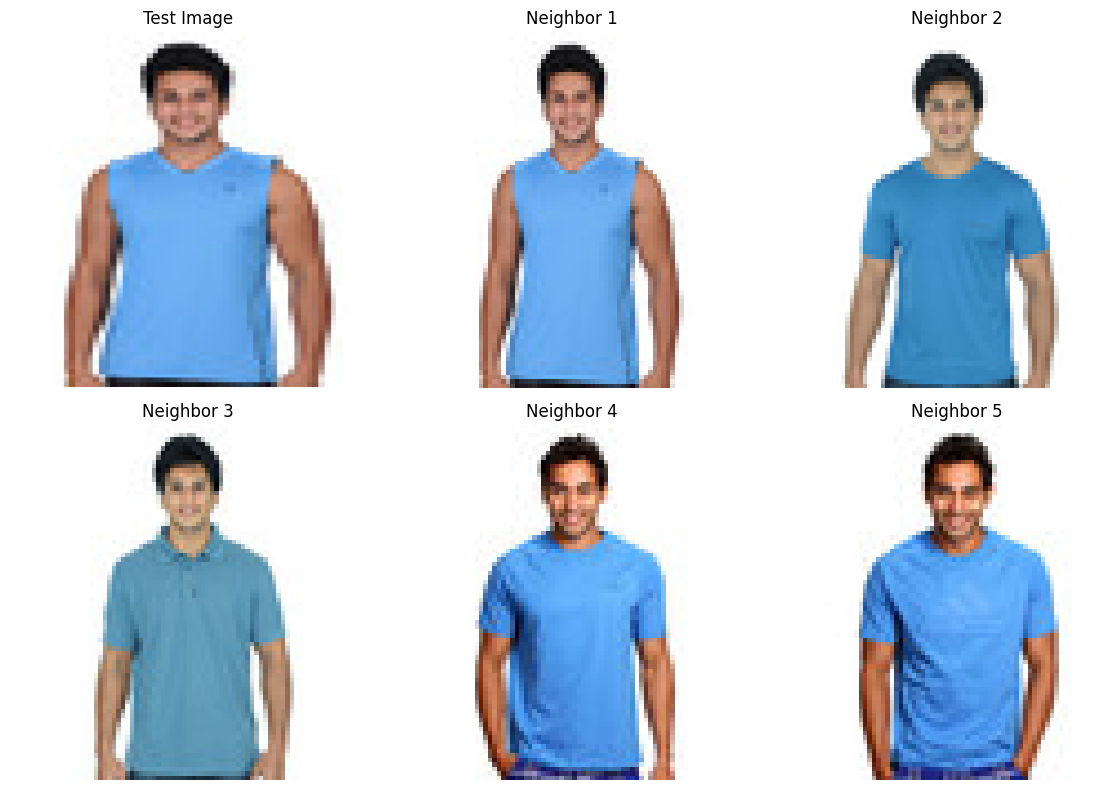

1/1 [==============================] - 0s 178ms/step
Test Image: 1813.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Fall', 'Fall', 'Fall']


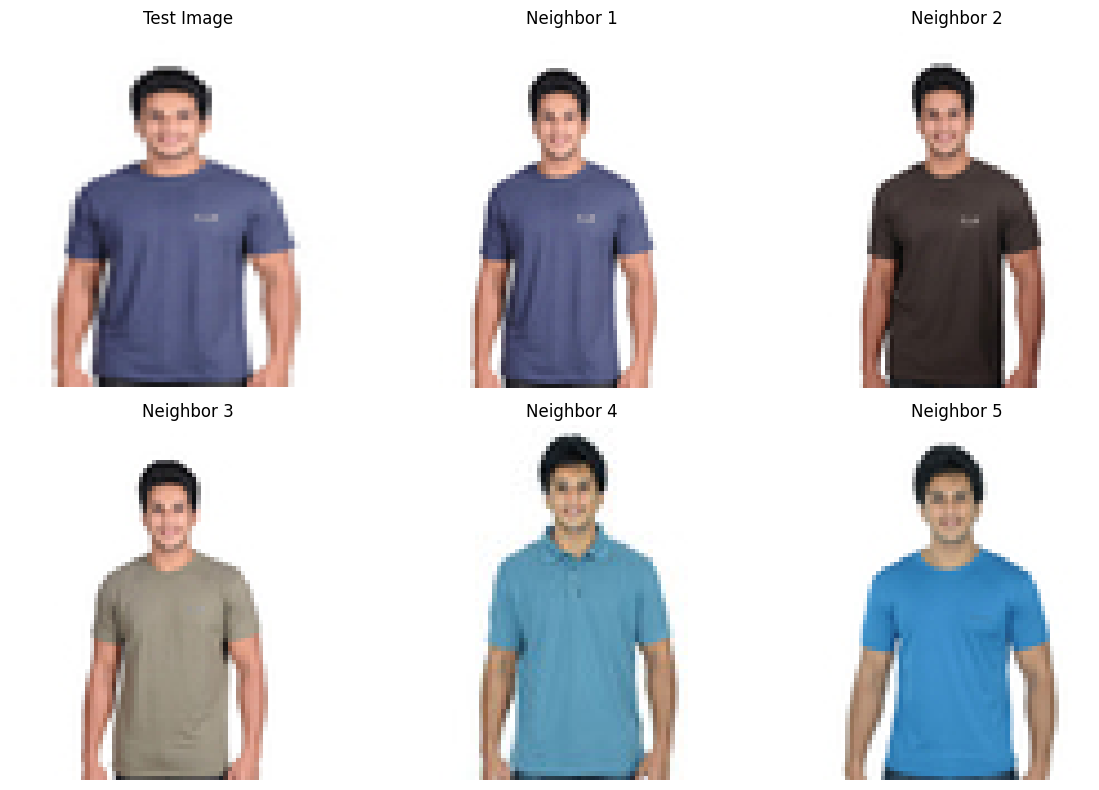

1/1 [==============================] - 0s 174ms/step
Test Image: 2253.jpg, Nearest Neighbors Seasons: ['Fall', 'Summer', 'Spring', 'Fall', 'Fall']


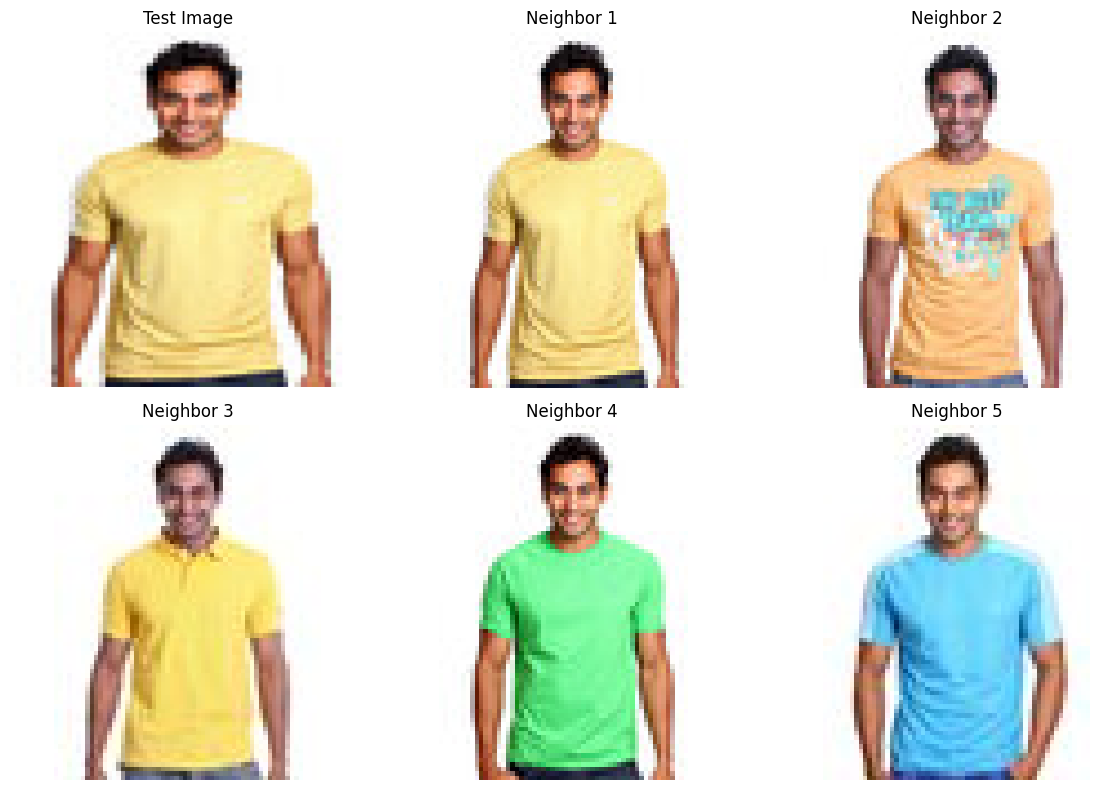

1/1 [==============================] - 0s 175ms/step
Test Image: 59888.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Fall', 'Fall', 'Fall']


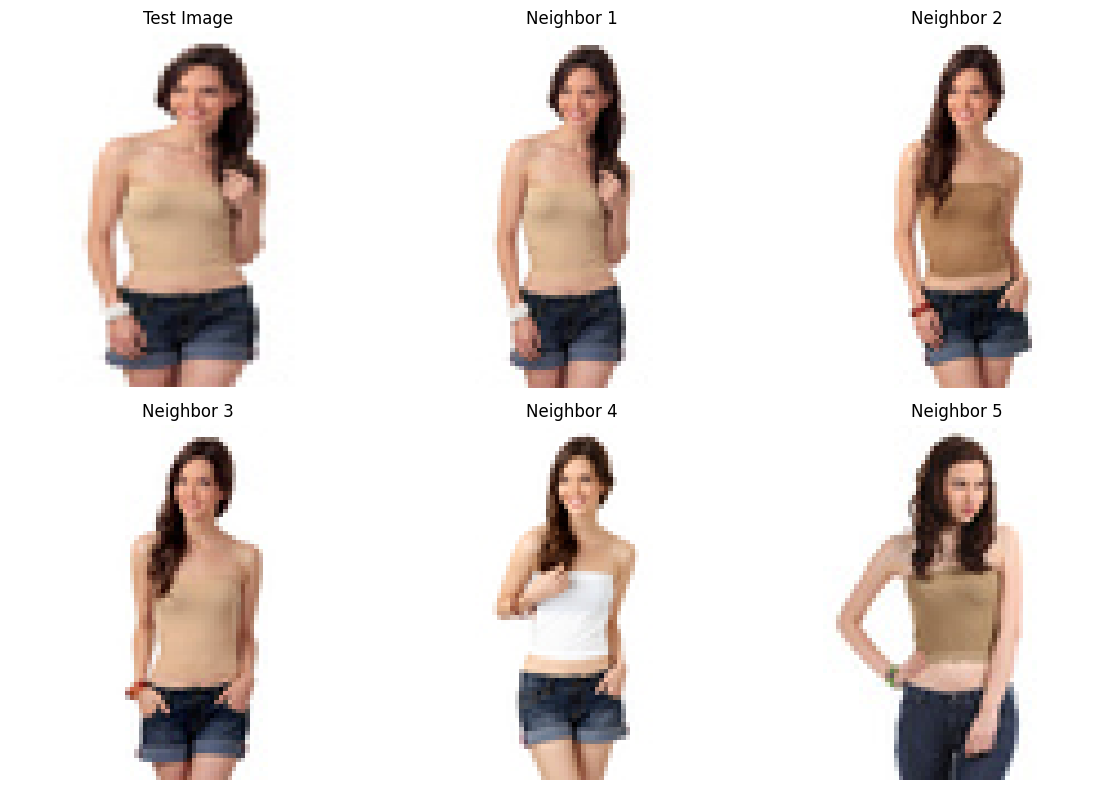

1/1 [==============================] - 0s 174ms/step
Test Image: 59892.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Summer', 'Summer', 'Summer']


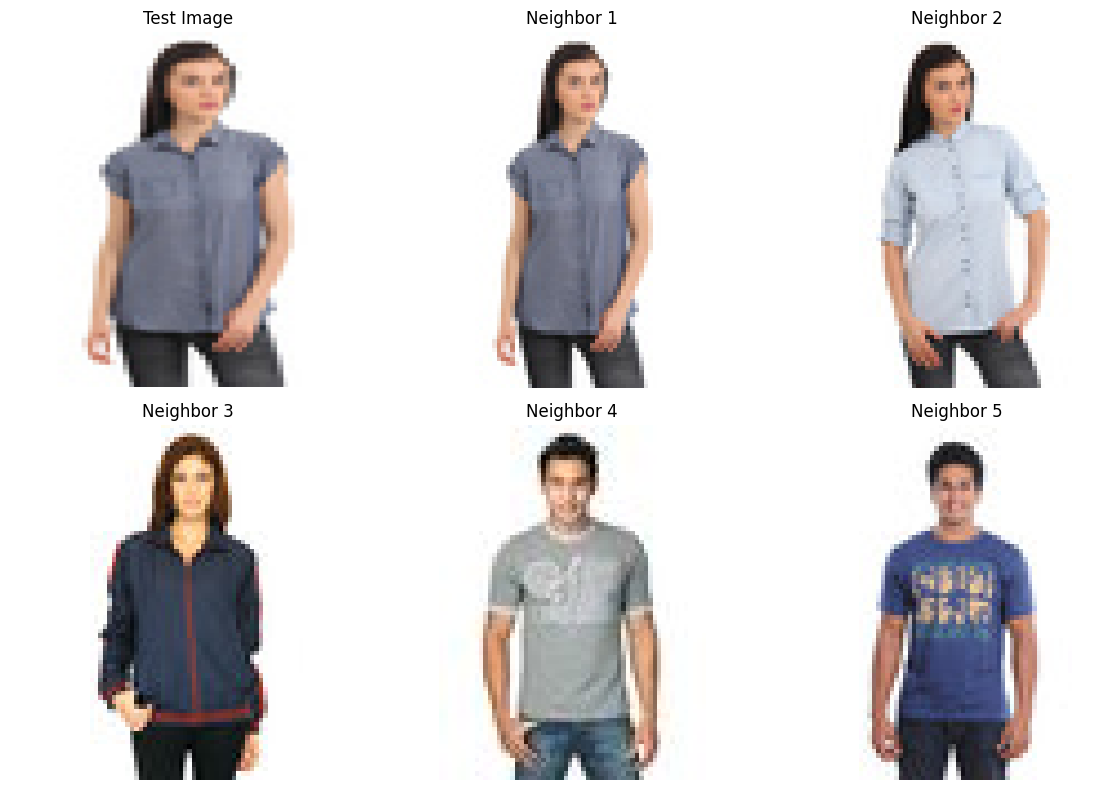

1/1 [==============================] - 0s 180ms/step
Test Image: 1579.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Fall', 'Fall', 'Fall']


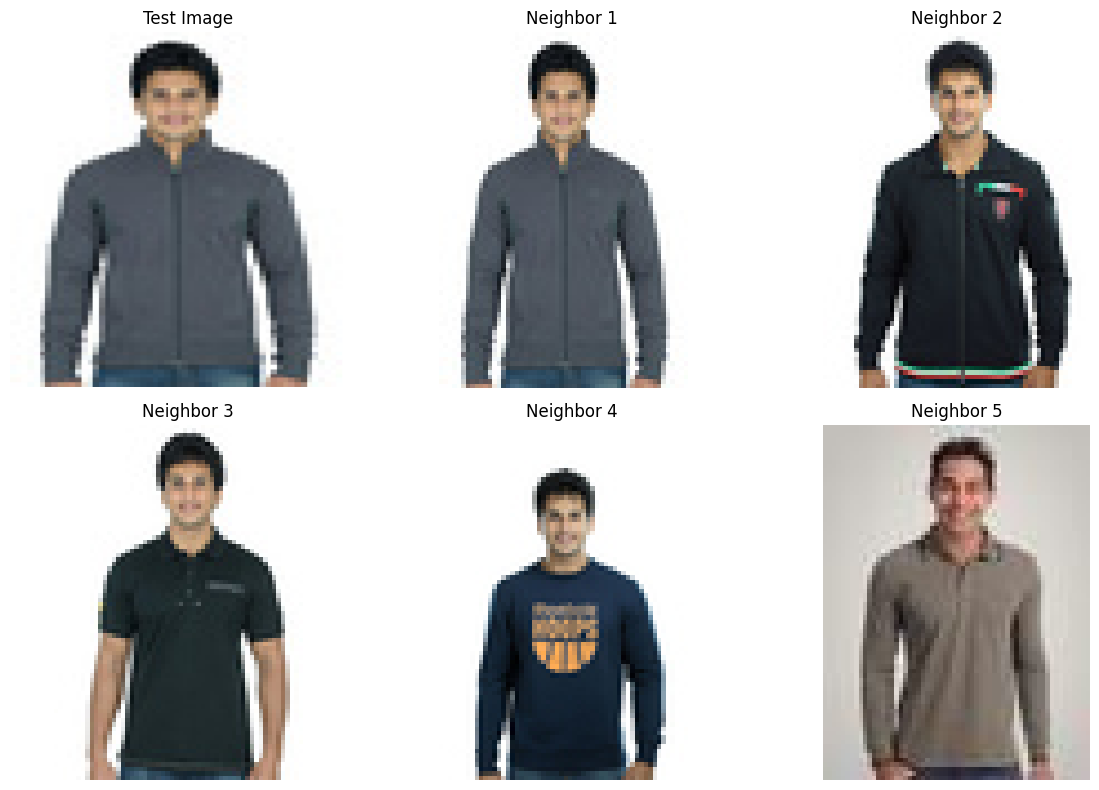

1/1 [==============================] - 0s 185ms/step
Test Image: 7958.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Fall', 'Fall', 'Fall']


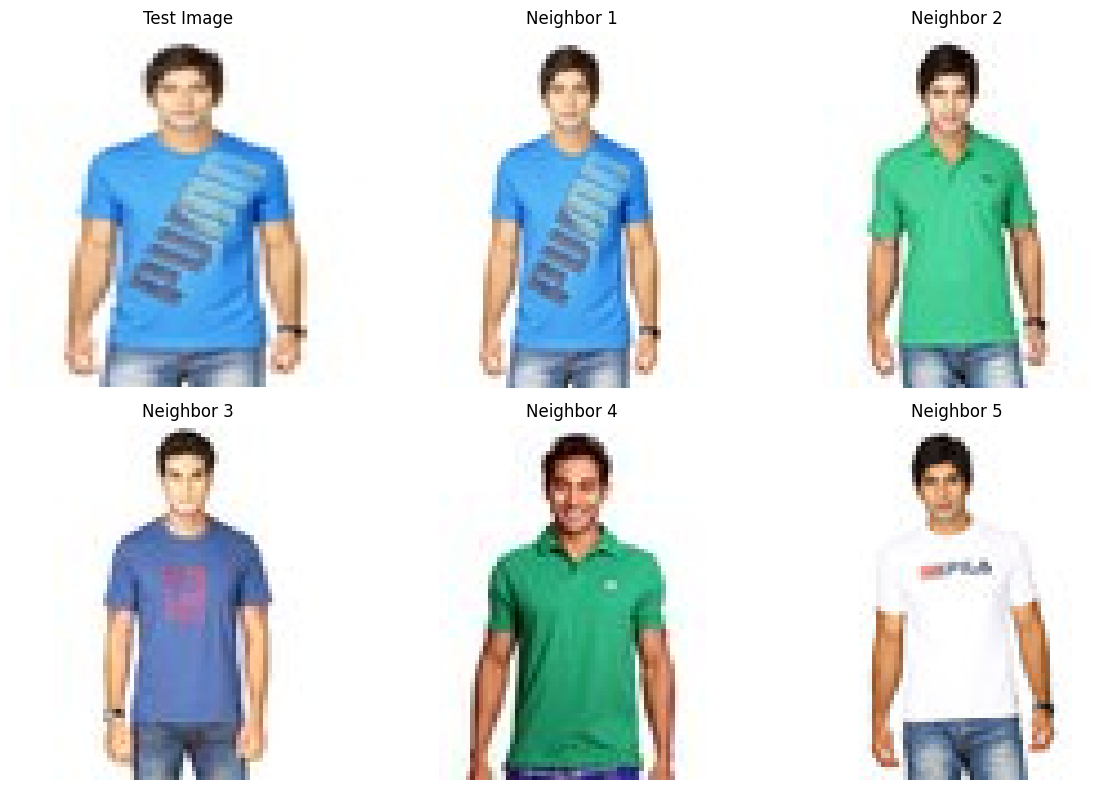

1/1 [==============================] - 0s 192ms/step
Test Image: 59965.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Fall', 'Fall', 'Fall']


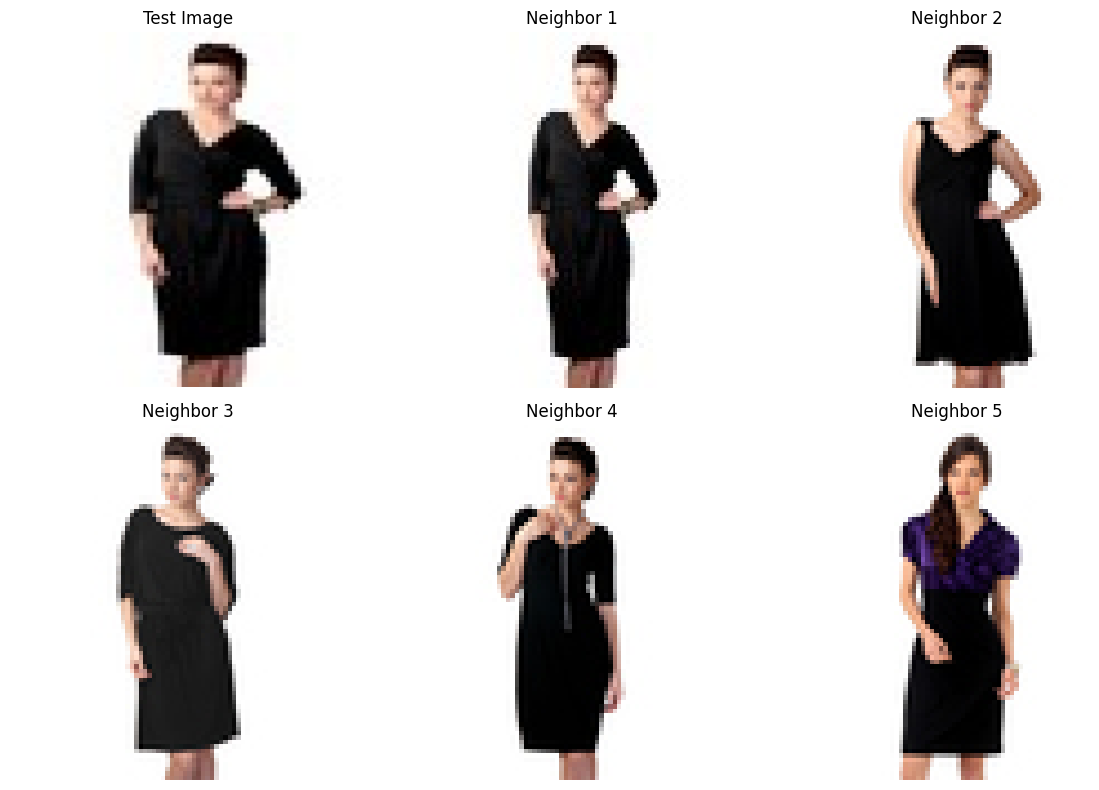

1/1 [==============================] - 0s 320ms/step
Test Image: 1762.jpg, Nearest Neighbors Seasons: ['Fall', 'Fall', 'Fall', 'Fall', 'Fall']


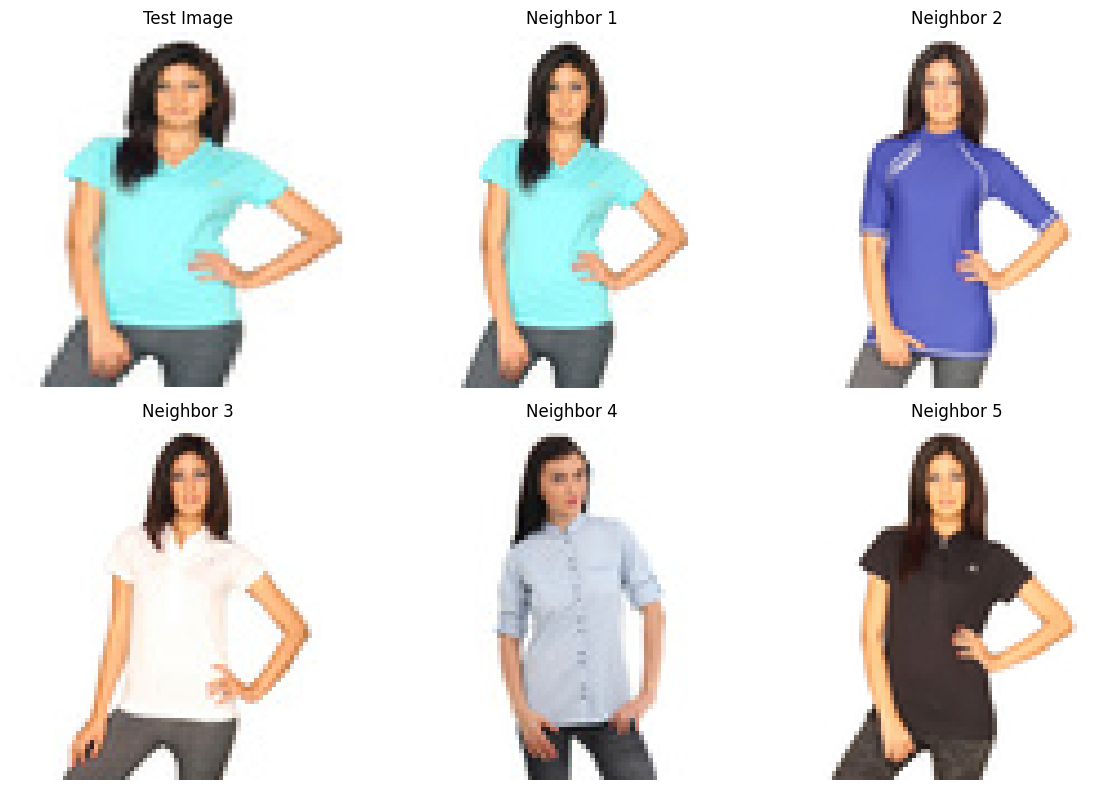

1/1 [==============================] - 0s 317ms/step
Test Image: 8064.jpg, Nearest Neighbors Seasons: ['Winter', 'Winter', 'Winter', 'Summer', 'Winter']


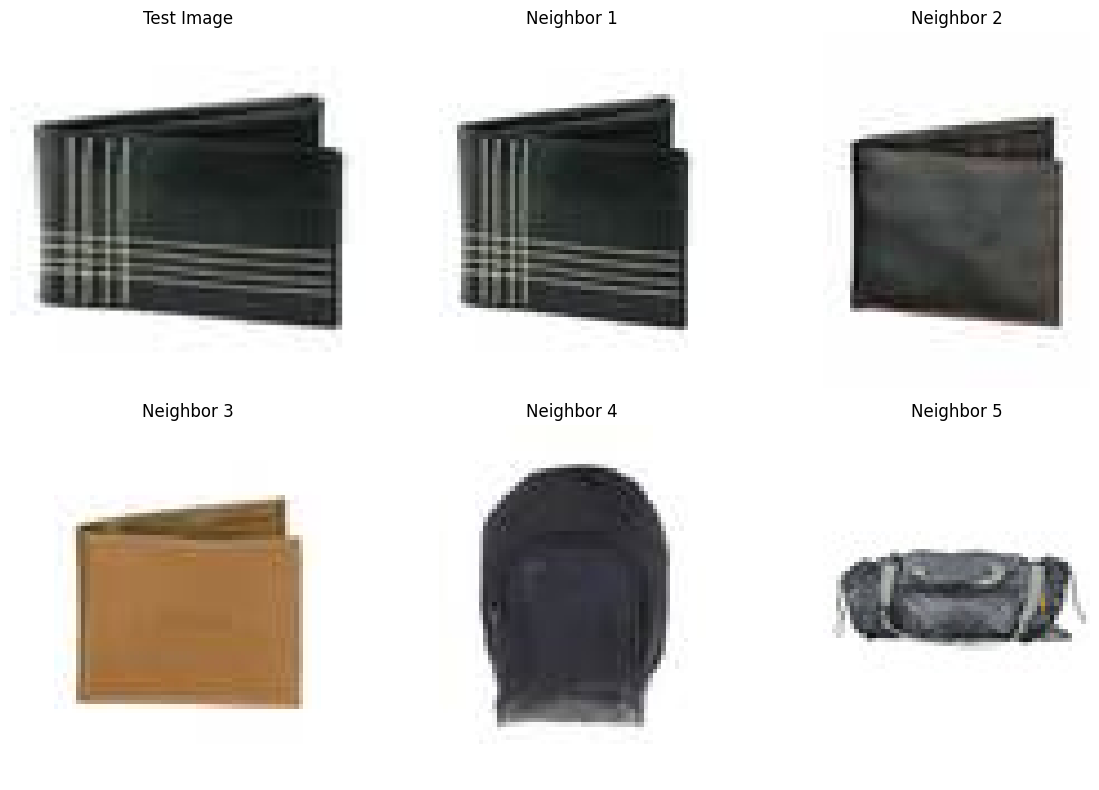

In [ ]:



# Specify the path to your image directory
path_images = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/images2'

# Load the styles.csv file into a DataFrame


# Create a dictionary to map image filenames to their corresponding season

styles_df = df.dropna(subset=['baseColour','season','usage','productDisplayName'])

filename_to_season = {}
for index, row in styles_df.iterrows():
    filename = str(row['id']) + '.jpg'
    season = row['season']
    filename_to_season[filename] = season

# Initialize the ResNet model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a new model with GlobalMaxPooling2D
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D()
])

def extract_features(path, model):
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

# Specify the number of test images you want to analyze
num_test_images = 10

# Get a list of image filenames that exist in the directory
existing_image_filenames = [file for file in os.listdir(path_images) if file.endswith('.jpg')]

# Randomly select test images representing different seasons
test_image_filenames = random.sample(existing_image_filenames, num_test_images)

# Process images and extract features
filenames = [os.path.join(path_images, file) for file in os.listdir(path_images)]
feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file, model))

# Analyze seasonal trends for each test image
for test_image_filename in test_image_filenames:
    # Check if the test image filename exists in the dictionary
    if test_image_filename in filename_to_season:
        # Load and preprocess the test image
        test_image_path = os.path.join(path_images, test_image_filename)
        test_image = image.load_img(test_image_path, target_size=(224, 224))
        test_image_array = image.img_to_array(test_image)
        expanded_test_image_array = np.expand_dims(test_image_array, axis=0)
        preprocessed_test_image = preprocess_input(expanded_test_image_array)

        # Extract features from the test image
        test_result = model.predict(preprocessed_test_image).flatten()
        normalized_test_result = test_result / norm(test_result)

        # Fit the Nearest Neighbors model
        neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
        neighbors.fit(feature_list)

        # Find the nearest neighbors of the test image
        distances, indices = neighbors.kneighbors([normalized_test_result])

        # Analyze the seasons of nearest neighbor images
        neighbor_seasons = [filename_to_season[os.path.basename(filenames[i])] for i in indices[0]]

        # Perform your seasonal trend analysis here
        print(f"Test Image: {test_image_filename}, Nearest Neighbors Seasons: {neighbor_seasons}")

        # Display the nearest neighbor images
        plt.figure(figsize=(12, 8))

        # Display the test image
        plt.subplot(2, 3, 1)
        plt.imshow(test_image)
        plt.title("Test Image")
        plt.axis('off')

        # Display the nearest neighbor images in a 2x3 grid
        for i, file_index in enumerate(indices[0]):
            if i < 5:  # Display up to 5 nearest neighbors
                temp = cv2.imread(filenames[file_index])
                plt.subplot(2, 3, i+2)
                plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
                plt.title(f"Neighbor {i + 1}")
                plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Test Image: {test_image_filename} not found in the dictionary.")


#Insight ,Similarity search based on season

  0%|          | 0/600 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/600 [00:01<12:47,  1.28s/it]

1/1 [==============================] - 0s 184ms/step


  0%|          | 2/600 [00:01<06:39,  1.50it/s]

1/1 [==============================] - 0s 186ms/step


  0%|          | 3/600 [00:01<04:41,  2.12it/s]

1/1 [==============================] - 0s 175ms/step


  1%|          | 4/600 [00:01<03:43,  2.66it/s]

1/1 [==============================] - 0s 169ms/step


  1%|          | 5/600 [00:02<03:10,  3.12it/s]

1/1 [==============================] - 0s 180ms/step


  1%|          | 6/600 [00:02<02:52,  3.44it/s]

1/1 [==============================] - 0s 357ms/step


  1%|          | 7/600 [00:02<03:26,  2.87it/s]

1/1 [==============================] - 0s 168ms/step


  1%|▏         | 8/600 [00:03<03:09,  3.13it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 9/600 [00:03<03:17,  3.00it/s]

1/1 [==============================] - 0s 184ms/step


  2%|▏         | 10/600 [00:03<03:23,  2.89it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 11/600 [00:04<03:02,  3.23it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 12/600 [00:04<02:47,  3.52it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 13/600 [00:04<02:36,  3.75it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 14/600 [00:04<02:54,  3.37it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▎         | 15/600 [00:05<02:43,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


  3%|▎         | 16/600 [00:05<02:58,  3.27it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 17/600 [00:05<02:45,  3.51it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 18/600 [00:06<02:36,  3.72it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 19/600 [00:06<02:53,  3.35it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 20/600 [00:06<03:05,  3.12it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▎         | 21/600 [00:07<03:16,  2.95it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▎         | 22/600 [00:07<03:21,  2.87it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▍         | 23/600 [00:07<03:01,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


  4%|▍         | 24/600 [00:08<03:13,  2.98it/s]

1/1 [==============================] - 0s 304ms/step


  4%|▍         | 25/600 [00:08<03:25,  2.80it/s]

1/1 [==============================] - 0s 314ms/step


  4%|▍         | 26/600 [00:08<03:31,  2.71it/s]

1/1 [==============================] - 0s 310ms/step


  4%|▍         | 27/600 [00:09<03:34,  2.67it/s]

1/1 [==============================] - 0s 305ms/step


  5%|▍         | 28/600 [00:09<03:34,  2.66it/s]

1/1 [==============================] - 0s 306ms/step


  5%|▍         | 29/600 [00:10<03:35,  2.65it/s]

1/1 [==============================] - 0s 304ms/step


  5%|▌         | 30/600 [00:10<03:35,  2.65it/s]

1/1 [==============================] - 0s 308ms/step


  5%|▌         | 31/600 [00:10<03:38,  2.60it/s]

1/1 [==============================] - 0s 300ms/step


  5%|▌         | 32/600 [00:11<03:38,  2.60it/s]

1/1 [==============================] - 0s 312ms/step


  6%|▌         | 33/600 [00:11<03:39,  2.58it/s]

1/1 [==============================] - 0s 309ms/step


  6%|▌         | 34/600 [00:12<03:40,  2.56it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 35/600 [00:12<03:40,  2.57it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 36/600 [00:12<03:36,  2.60it/s]

1/1 [==============================] - 0s 185ms/step


  6%|▌         | 37/600 [00:13<03:12,  2.93it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▋         | 38/600 [00:13<03:16,  2.86it/s]

1/1 [==============================] - 0s 180ms/step


  6%|▋         | 39/600 [00:13<02:57,  3.16it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 40/600 [00:14<03:05,  3.01it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 41/600 [00:14<03:13,  2.89it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 42/600 [00:14<02:53,  3.22it/s]

1/1 [==============================] - 0s 183ms/step


  7%|▋         | 43/600 [00:14<03:03,  3.04it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 44/600 [00:15<02:46,  3.33it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 45/600 [00:15<02:35,  3.58it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 46/600 [00:15<02:50,  3.25it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 47/600 [00:16<02:38,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


  8%|▊         | 48/600 [00:16<02:31,  3.64it/s]

1/1 [==============================] - 0s 181ms/step


  8%|▊         | 49/600 [00:16<02:25,  3.79it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 50/600 [00:16<02:18,  3.97it/s]

1/1 [==============================] - 0s 185ms/step


  8%|▊         | 51/600 [00:17<02:16,  4.04it/s]

1/1 [==============================] - 0s 183ms/step


  9%|▊         | 52/600 [00:17<02:36,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▉         | 53/600 [00:17<02:27,  3.72it/s]

1/1 [==============================] - 0s 181ms/step


  9%|▉         | 54/600 [00:17<02:21,  3.87it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▉         | 55/600 [00:18<02:15,  4.02it/s]

1/1 [==============================] - 0s 183ms/step


  9%|▉         | 56/600 [00:18<02:37,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


 10%|▉         | 57/600 [00:18<02:50,  3.18it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 58/600 [00:19<02:37,  3.44it/s]

1/1 [==============================] - 0s 193ms/step


 10%|▉         | 59/600 [00:19<02:30,  3.59it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 60/600 [00:19<02:22,  3.78it/s]

1/1 [==============================] - 0s 181ms/step


 10%|█         | 61/600 [00:19<02:39,  3.38it/s]

1/1 [==============================] - 0s 173ms/step


 10%|█         | 62/600 [00:20<02:28,  3.63it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 63/600 [00:20<02:22,  3.78it/s]

1/1 [==============================] - 0s 179ms/step


 11%|█         | 64/600 [00:20<02:43,  3.28it/s]

1/1 [==============================] - 0s 191ms/step


 11%|█         | 65/600 [00:21<02:53,  3.08it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█         | 66/600 [00:21<02:38,  3.36it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 67/600 [00:21<02:27,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 11%|█▏        | 68/600 [00:21<02:42,  3.27it/s]

1/1 [==============================] - 0s 268ms/step


 12%|█▏        | 69/600 [00:22<02:45,  3.22it/s]

1/1 [==============================] - 0s 305ms/step


 12%|█▏        | 70/600 [00:22<02:56,  3.01it/s]

1/1 [==============================] - 0s 304ms/step


 12%|█▏        | 71/600 [00:23<03:07,  2.82it/s]

1/1 [==============================] - 0s 304ms/step


 12%|█▏        | 72/600 [00:23<03:13,  2.72it/s]

1/1 [==============================] - 0s 307ms/step


 12%|█▏        | 73/600 [00:23<03:21,  2.62it/s]

1/1 [==============================] - 0s 305ms/step


 12%|█▏        | 74/600 [00:24<03:23,  2.58it/s]

1/1 [==============================] - 0s 302ms/step


 12%|█▎        | 75/600 [00:24<03:25,  2.55it/s]

1/1 [==============================] - 0s 304ms/step


 13%|█▎        | 76/600 [00:25<03:23,  2.57it/s]

1/1 [==============================] - 0s 307ms/step


 13%|█▎        | 77/600 [00:25<03:24,  2.55it/s]

1/1 [==============================] - 0s 300ms/step


 13%|█▎        | 78/600 [00:25<03:22,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


 13%|█▎        | 79/600 [00:26<03:19,  2.61it/s]

1/1 [==============================] - 0s 186ms/step


 13%|█▎        | 80/600 [00:26<03:02,  2.86it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▎        | 81/600 [00:26<03:04,  2.81it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▎        | 82/600 [00:27<03:06,  2.77it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 83/600 [00:27<02:47,  3.09it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 84/600 [00:27<02:55,  2.95it/s]

1/1 [==============================] - 0s 180ms/step


 14%|█▍        | 85/600 [00:28<02:59,  2.87it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 86/600 [00:28<02:41,  3.19it/s]

1/1 [==============================] - 0s 183ms/step


 14%|█▍        | 87/600 [00:28<02:50,  3.00it/s]

1/1 [==============================] - 0s 179ms/step


 15%|█▍        | 88/600 [00:29<02:36,  3.27it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▍        | 89/600 [00:29<02:24,  3.53it/s]

1/1 [==============================] - 0s 180ms/step


 15%|█▌        | 90/600 [00:29<02:16,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▌        | 91/600 [00:29<02:12,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▌        | 92/600 [00:30<02:08,  3.96it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 93/600 [00:30<02:26,  3.47it/s]

1/1 [==============================] - 0s 185ms/step


 16%|█▌        | 94/600 [00:30<02:18,  3.64it/s]

1/1 [==============================] - 0s 183ms/step


 16%|█▌        | 95/600 [00:30<02:12,  3.80it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▌        | 96/600 [00:31<02:29,  3.36it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 97/600 [00:31<02:19,  3.60it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▋        | 98/600 [00:31<02:15,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


 16%|█▋        | 99/600 [00:31<02:10,  3.85it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█▋        | 100/600 [00:32<02:06,  3.97it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 101/600 [00:32<02:02,  4.07it/s]

1/1 [==============================] - 0s 192ms/step


 17%|█▋        | 102/600 [00:32<02:21,  3.51it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 103/600 [00:33<02:13,  3.72it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 104/600 [00:33<02:09,  3.84it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 105/600 [00:33<02:25,  3.41it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 106/600 [00:34<02:37,  3.14it/s]

1/1 [==============================] - 0s 172ms/step


 18%|█▊        | 107/600 [00:34<02:23,  3.44it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 108/600 [00:34<02:14,  3.65it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 109/600 [00:34<02:09,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 110/600 [00:34<02:04,  3.95it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 111/600 [00:35<02:01,  4.03it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▊        | 112/600 [00:35<02:19,  3.50it/s]

1/1 [==============================] - 0s 188ms/step


 19%|█▉        | 113/600 [00:35<02:13,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 19%|█▉        | 114/600 [00:36<02:08,  3.77it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▉        | 115/600 [00:36<02:04,  3.91it/s]

1/1 [==============================] - 0s 311ms/step


 19%|█▉        | 116/600 [00:36<02:23,  3.37it/s]

1/1 [==============================] - 0s 321ms/step


 20%|█▉        | 117/600 [00:37<02:40,  3.01it/s]

1/1 [==============================] - 0s 306ms/step


 20%|█▉        | 118/600 [00:37<02:47,  2.88it/s]

1/1 [==============================] - 0s 315ms/step


 20%|█▉        | 119/600 [00:37<02:53,  2.77it/s]

1/1 [==============================] - 0s 314ms/step


 20%|██        | 120/600 [00:38<03:02,  2.63it/s]

1/1 [==============================] - 0s 312ms/step


 20%|██        | 121/600 [00:38<03:03,  2.62it/s]

1/1 [==============================] - 0s 301ms/step


 20%|██        | 122/600 [00:39<03:05,  2.58it/s]

1/1 [==============================] - 0s 307ms/step


 20%|██        | 123/600 [00:39<03:06,  2.55it/s]

1/1 [==============================] - 0s 301ms/step


 21%|██        | 124/600 [00:39<03:07,  2.53it/s]

1/1 [==============================] - 0s 304ms/step


 21%|██        | 125/600 [00:40<03:10,  2.49it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 126/600 [00:40<02:54,  2.71it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██        | 127/600 [00:40<02:35,  3.03it/s]

1/1 [==============================] - 0s 194ms/step


 21%|██▏       | 128/600 [00:41<02:25,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 129/600 [00:41<02:33,  3.06it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 130/600 [00:41<02:19,  3.36it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 131/600 [00:41<02:10,  3.59it/s]

1/1 [==============================] - 0s 188ms/step


 22%|██▏       | 132/600 [00:42<02:06,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 133/600 [00:42<02:19,  3.35it/s]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 134/600 [00:42<02:10,  3.57it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▎       | 135/600 [00:43<02:03,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 136/600 [00:43<02:20,  3.30it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 137/600 [00:43<02:10,  3.56it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 138/600 [00:44<02:22,  3.24it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 139/600 [00:44<02:31,  3.04it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 140/600 [00:44<02:37,  2.92it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▎       | 141/600 [00:45<02:21,  3.24it/s]

1/1 [==============================] - 0s 193ms/step


 24%|██▎       | 142/600 [00:45<02:13,  3.44it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▍       | 143/600 [00:45<02:23,  3.17it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▍       | 144/600 [00:45<02:15,  3.35it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▍       | 145/600 [00:46<02:05,  3.61it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▍       | 146/600 [00:46<02:02,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 147/600 [00:46<01:57,  3.87it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▍       | 148/600 [00:46<02:12,  3.42it/s]

1/1 [==============================] - 0s 187ms/step


 25%|██▍       | 149/600 [00:47<02:05,  3.60it/s]

1/1 [==============================] - 0s 174ms/step


 25%|██▌       | 150/600 [00:47<01:58,  3.78it/s]

1/1 [==============================] - 0s 179ms/step


 25%|██▌       | 151/600 [00:47<02:13,  3.37it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▌       | 152/600 [00:48<02:05,  3.56it/s]

1/1 [==============================] - 0s 191ms/step


 26%|██▌       | 153/600 [00:48<02:17,  3.25it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 154/600 [00:48<02:26,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 155/600 [00:49<02:14,  3.32it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▌       | 156/600 [00:49<02:07,  3.48it/s]

1/1 [==============================] - 0s 181ms/step


 26%|██▌       | 157/600 [00:49<02:00,  3.67it/s]

1/1 [==============================] - 0s 175ms/step


 26%|██▋       | 158/600 [00:49<01:55,  3.83it/s]

1/1 [==============================] - 0s 175ms/step


 26%|██▋       | 159/600 [00:50<02:09,  3.40it/s]

1/1 [==============================] - 0s 190ms/step


 27%|██▋       | 160/600 [00:50<02:20,  3.14it/s]

1/1 [==============================] - 0s 321ms/step


 27%|██▋       | 161/600 [00:50<02:34,  2.84it/s]

1/1 [==============================] - 0s 306ms/step


 27%|██▋       | 162/600 [00:51<02:37,  2.78it/s]

1/1 [==============================] - 0s 310ms/step


 27%|██▋       | 163/600 [00:51<02:42,  2.68it/s]

1/1 [==============================] - 0s 310ms/step


 27%|██▋       | 164/600 [00:52<02:44,  2.65it/s]

1/1 [==============================] - 0s 310ms/step


 28%|██▊       | 165/600 [00:52<02:50,  2.56it/s]

1/1 [==============================] - 0s 306ms/step


 28%|██▊       | 166/600 [00:52<02:50,  2.54it/s]

1/1 [==============================] - 0s 308ms/step


 28%|██▊       | 167/600 [00:53<02:51,  2.52it/s]

1/1 [==============================] - 0s 316ms/step


 28%|██▊       | 168/600 [00:53<02:51,  2.52it/s]

1/1 [==============================] - 0s 304ms/step


 28%|██▊       | 169/600 [00:54<02:50,  2.53it/s]

1/1 [==============================] - 0s 312ms/step


 28%|██▊       | 170/600 [00:54<02:49,  2.53it/s]

1/1 [==============================] - 0s 203ms/step


 28%|██▊       | 171/600 [00:54<02:36,  2.75it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▊       | 172/600 [00:55<02:18,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▉       | 173/600 [00:55<02:24,  2.95it/s]

1/1 [==============================] - 0s 256ms/step


 29%|██▉       | 174/600 [00:55<02:23,  2.97it/s]

1/1 [==============================] - 0s 358ms/step


 29%|██▉       | 175/600 [00:56<03:18,  2.14it/s]

1/1 [==============================] - 0s 405ms/step


 29%|██▉       | 176/600 [00:57<03:27,  2.04it/s]

1/1 [==============================] - 0s 443ms/step


 30%|██▉       | 177/600 [00:57<03:52,  1.82it/s]

1/1 [==============================] - 0s 394ms/step


 30%|██▉       | 178/600 [00:58<04:33,  1.54it/s]

1/1 [==============================] - 0s 367ms/step


 30%|██▉       | 179/600 [00:59<04:47,  1.46it/s]

1/1 [==============================] - 1s 535ms/step


 30%|███       | 180/600 [01:00<04:53,  1.43it/s]

1/1 [==============================] - 0s 289ms/step


 30%|███       | 181/600 [01:00<04:14,  1.65it/s]

1/1 [==============================] - 0s 260ms/step


 30%|███       | 182/600 [01:00<03:38,  1.92it/s]

1/1 [==============================] - 1s 561ms/step


 30%|███       | 183/600 [01:01<04:03,  1.71it/s]

1/1 [==============================] - 0s 357ms/step


 31%|███       | 184/600 [01:02<04:31,  1.53it/s]

1/1 [==============================] - 0s 464ms/step


 31%|███       | 185/600 [01:02<04:21,  1.59it/s]

1/1 [==============================] - 0s 439ms/step


 31%|███       | 186/600 [01:03<04:39,  1.48it/s]

1/1 [==============================] - 0s 283ms/step


 31%|███       | 187/600 [01:04<04:01,  1.71it/s]

1/1 [==============================] - 0s 374ms/step


 31%|███▏      | 188/600 [01:04<04:32,  1.51it/s]

1/1 [==============================] - 1s 546ms/step


 32%|███▏      | 189/600 [01:05<04:48,  1.42it/s]

1/1 [==============================] - 1s 507ms/step


 32%|███▏      | 190/600 [01:06<05:15,  1.30it/s]

1/1 [==============================] - 1s 690ms/step


 32%|███▏      | 191/600 [01:07<05:35,  1.22it/s]

1/1 [==============================] - 1s 513ms/step


 32%|███▏      | 192/600 [01:08<05:43,  1.19it/s]

1/1 [==============================] - 0s 463ms/step


 32%|███▏      | 193/600 [01:09<05:23,  1.26it/s]

1/1 [==============================] - 0s 285ms/step


 32%|███▏      | 194/600 [01:09<04:37,  1.47it/s]

1/1 [==============================] - 0s 338ms/step


 32%|███▎      | 195/600 [01:10<04:48,  1.40it/s]

1/1 [==============================] - 0s 326ms/step


 33%|███▎      | 196/600 [01:10<04:16,  1.58it/s]

1/1 [==============================] - 0s 309ms/step


 33%|███▎      | 197/600 [01:11<03:48,  1.77it/s]

1/1 [==============================] - 0s 288ms/step


 33%|███▎      | 198/600 [01:11<03:26,  1.95it/s]

1/1 [==============================] - 0s 304ms/step


 33%|███▎      | 199/600 [01:12<03:16,  2.04it/s]

1/1 [==============================] - 0s 305ms/step


 33%|███▎      | 200/600 [01:12<03:05,  2.16it/s]

1/1 [==============================] - 1s 574ms/step


 34%|███▎      | 201/600 [01:13<03:34,  1.86it/s]

1/1 [==============================] - 0s 491ms/step


 34%|███▎      | 202/600 [01:14<04:12,  1.58it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 203/600 [01:14<03:40,  1.80it/s]

1/1 [==============================] - 0s 180ms/step


 34%|███▍      | 204/600 [01:14<03:18,  2.00it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▍      | 205/600 [01:15<02:46,  2.37it/s]

1/1 [==============================] - 0s 187ms/step


 34%|███▍      | 206/600 [01:15<02:26,  2.70it/s]

1/1 [==============================] - 0s 188ms/step


 34%|███▍      | 207/600 [01:15<02:11,  2.99it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███▍      | 208/600 [01:15<02:00,  3.25it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███▍      | 209/600 [01:16<01:53,  3.43it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███▌      | 210/600 [01:16<02:03,  3.17it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 211/600 [01:16<01:53,  3.42it/s]

1/1 [==============================] - 0s 188ms/step


 35%|███▌      | 212/600 [01:17<02:02,  3.16it/s]

1/1 [==============================] - 0s 192ms/step


 36%|███▌      | 213/600 [01:17<02:08,  3.01it/s]

1/1 [==============================] - 0s 181ms/step


 36%|███▌      | 214/600 [01:17<01:57,  3.28it/s]

1/1 [==============================] - 0s 180ms/step


 36%|███▌      | 215/600 [01:17<01:49,  3.52it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 216/600 [01:18<01:59,  3.22it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▌      | 217/600 [01:18<01:52,  3.40it/s]

1/1 [==============================] - 0s 191ms/step


 36%|███▋      | 218/600 [01:18<01:47,  3.56it/s]

1/1 [==============================] - 0s 178ms/step


 36%|███▋      | 219/600 [01:18<01:42,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 220/600 [01:19<01:53,  3.36it/s]

1/1 [==============================] - 0s 302ms/step


 37%|███▋      | 221/600 [01:19<02:01,  3.12it/s]

1/1 [==============================] - 0s 303ms/step


 37%|███▋      | 222/600 [01:20<02:09,  2.92it/s]

1/1 [==============================] - 0s 327ms/step


 37%|███▋      | 223/600 [01:20<02:16,  2.77it/s]

1/1 [==============================] - 0s 322ms/step


 37%|███▋      | 224/600 [01:20<02:21,  2.67it/s]

1/1 [==============================] - 0s 315ms/step


 38%|███▊      | 225/600 [01:21<02:23,  2.62it/s]

1/1 [==============================] - 0s 322ms/step


 38%|███▊      | 226/600 [01:21<02:27,  2.54it/s]

1/1 [==============================] - 0s 308ms/step


 38%|███▊      | 227/600 [01:22<02:26,  2.54it/s]

1/1 [==============================] - 0s 319ms/step


 38%|███▊      | 228/600 [01:22<02:25,  2.56it/s]

1/1 [==============================] - 0s 311ms/step


 38%|███▊      | 229/600 [01:22<02:26,  2.53it/s]

1/1 [==============================] - 0s 310ms/step


 38%|███▊      | 230/600 [01:23<02:27,  2.51it/s]

1/1 [==============================] - 0s 321ms/step


 38%|███▊      | 231/600 [01:23<02:28,  2.48it/s]

1/1 [==============================] - 0s 266ms/step


 39%|███▊      | 232/600 [01:24<02:38,  2.32it/s]

1/1 [==============================] - 0s 313ms/step


 39%|███▉      | 233/600 [01:24<02:44,  2.23it/s]

1/1 [==============================] - 0s 393ms/step


 39%|███▉      | 234/600 [01:25<03:15,  1.87it/s]

1/1 [==============================] - 0s 323ms/step


 39%|███▉      | 235/600 [01:25<03:05,  1.97it/s]

1/1 [==============================] - 0s 407ms/step


 39%|███▉      | 236/600 [01:26<03:04,  1.98it/s]

1/1 [==============================] - 0s 343ms/step


 40%|███▉      | 237/600 [01:26<02:57,  2.05it/s]

1/1 [==============================] - 0s 322ms/step


 40%|███▉      | 238/600 [01:27<02:49,  2.14it/s]

1/1 [==============================] - 0s 389ms/step


 40%|███▉      | 239/600 [01:27<02:57,  2.04it/s]

1/1 [==============================] - 0s 324ms/step


 40%|████      | 240/600 [01:28<02:56,  2.04it/s]

1/1 [==============================] - 0s 274ms/step


 40%|████      | 241/600 [01:28<02:43,  2.19it/s]

1/1 [==============================] - 0s 182ms/step


 40%|████      | 242/600 [01:28<02:20,  2.55it/s]

1/1 [==============================] - 0s 186ms/step


 40%|████      | 243/600 [01:29<02:03,  2.88it/s]

1/1 [==============================] - 0s 186ms/step


 41%|████      | 244/600 [01:29<01:52,  3.17it/s]

1/1 [==============================] - 0s 181ms/step


 41%|████      | 245/600 [01:29<01:43,  3.42it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 246/600 [01:29<01:38,  3.58it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████      | 247/600 [01:30<01:33,  3.76it/s]

1/1 [==============================] - 0s 178ms/step


 41%|████▏     | 248/600 [01:30<01:44,  3.37it/s]

1/1 [==============================] - 0s 184ms/step


 42%|████▏     | 249/600 [01:30<01:38,  3.55it/s]

1/1 [==============================] - 0s 185ms/step


 42%|████▏     | 250/600 [01:31<02:37,  2.22it/s]

1/1 [==============================] - 0s 197ms/step


 42%|████▏     | 251/600 [01:31<02:17,  2.54it/s]

1/1 [==============================] - 0s 179ms/step


 42%|████▏     | 252/600 [01:32<02:01,  2.87it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 253/600 [01:32<01:50,  3.15it/s]

1/1 [==============================] - 0s 187ms/step


 42%|████▏     | 254/600 [01:32<01:43,  3.35it/s]

1/1 [==============================] - 0s 191ms/step


 42%|████▎     | 255/600 [01:32<01:38,  3.50it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 256/600 [01:33<01:34,  3.64it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 257/600 [01:33<01:31,  3.74it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 258/600 [01:33<01:31,  3.73it/s]

1/1 [==============================] - 0s 321ms/step


 43%|████▎     | 259/600 [01:34<01:46,  3.21it/s]

1/1 [==============================] - 0s 304ms/step


 43%|████▎     | 260/600 [01:34<01:53,  3.00it/s]

1/1 [==============================] - 0s 319ms/step


 44%|████▎     | 261/600 [01:34<02:00,  2.81it/s]

1/1 [==============================] - 0s 317ms/step


 44%|████▎     | 262/600 [01:35<02:08,  2.63it/s]

1/1 [==============================] - 0s 315ms/step


 44%|████▍     | 263/600 [01:35<02:09,  2.60it/s]

1/1 [==============================] - 0s 330ms/step


 44%|████▍     | 264/600 [01:36<02:13,  2.52it/s]

1/1 [==============================] - 0s 307ms/step


 44%|████▍     | 265/600 [01:36<02:11,  2.54it/s]

1/1 [==============================] - 0s 313ms/step


 44%|████▍     | 266/600 [01:36<02:16,  2.45it/s]

1/1 [==============================] - 0s 305ms/step


 44%|████▍     | 267/600 [01:37<02:15,  2.47it/s]

1/1 [==============================] - 0s 327ms/step


 45%|████▍     | 268/600 [01:37<02:15,  2.44it/s]

1/1 [==============================] - 0s 197ms/step


 45%|████▍     | 269/600 [01:38<02:14,  2.45it/s]

1/1 [==============================] - 0s 185ms/step


 45%|████▌     | 270/600 [01:38<02:11,  2.51it/s]

1/1 [==============================] - 0s 189ms/step


 45%|████▌     | 271/600 [01:38<01:56,  2.84it/s]

1/1 [==============================] - 0s 180ms/step


 45%|████▌     | 272/600 [01:39<01:44,  3.13it/s]

1/1 [==============================] - 0s 189ms/step


 46%|████▌     | 273/600 [01:39<01:38,  3.33it/s]

1/1 [==============================] - 0s 184ms/step


 46%|████▌     | 274/600 [01:39<01:46,  3.06it/s]

1/1 [==============================] - 0s 188ms/step


 46%|████▌     | 275/600 [01:40<01:51,  2.92it/s]

1/1 [==============================] - 0s 181ms/step


 46%|████▌     | 276/600 [01:40<01:55,  2.80it/s]

1/1 [==============================] - 0s 184ms/step


 46%|████▌     | 277/600 [01:40<01:45,  3.06it/s]

1/1 [==============================] - 0s 188ms/step


 46%|████▋     | 278/600 [01:40<01:37,  3.29it/s]

1/1 [==============================] - 0s 187ms/step


 46%|████▋     | 279/600 [01:41<01:43,  3.09it/s]

1/1 [==============================] - 0s 186ms/step


 47%|████▋     | 280/600 [01:41<01:48,  2.95it/s]

1/1 [==============================] - 0s 177ms/step


 47%|████▋     | 281/600 [01:42<01:51,  2.86it/s]

1/1 [==============================] - 0s 186ms/step


 47%|████▋     | 282/600 [01:42<01:55,  2.76it/s]

1/1 [==============================] - 0s 190ms/step


 47%|████▋     | 283/600 [01:42<01:44,  3.03it/s]

1/1 [==============================] - 0s 180ms/step


 47%|████▋     | 284/600 [01:42<01:35,  3.30it/s]

1/1 [==============================] - 0s 197ms/step


 48%|████▊     | 285/600 [01:43<01:42,  3.08it/s]

1/1 [==============================] - 0s 188ms/step


 48%|████▊     | 286/600 [01:43<01:34,  3.32it/s]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 287/600 [01:43<01:29,  3.51it/s]

1/1 [==============================] - 0s 186ms/step


 48%|████▊     | 288/600 [01:44<01:24,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 48%|████▊     | 289/600 [01:44<01:34,  3.31it/s]

1/1 [==============================] - 0s 183ms/step


 48%|████▊     | 290/600 [01:44<01:29,  3.47it/s]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 291/600 [01:44<01:24,  3.67it/s]

1/1 [==============================] - 0s 178ms/step


 49%|████▊     | 292/600 [01:45<01:33,  3.30it/s]

1/1 [==============================] - 0s 188ms/step


 49%|████▉     | 293/600 [01:45<01:39,  3.09it/s]

1/1 [==============================] - 0s 176ms/step


 49%|████▉     | 294/600 [01:46<01:43,  2.97it/s]

1/1 [==============================] - 0s 188ms/step


 49%|████▉     | 295/600 [01:46<01:34,  3.24it/s]

1/1 [==============================] - 0s 187ms/step


 49%|████▉     | 296/600 [01:46<01:28,  3.45it/s]

1/1 [==============================] - 0s 174ms/step


 50%|████▉     | 297/600 [01:46<01:23,  3.64it/s]

1/1 [==============================] - 0s 190ms/step


 50%|████▉     | 298/600 [01:47<01:21,  3.70it/s]

1/1 [==============================] - 0s 189ms/step


 50%|████▉     | 299/600 [01:47<01:19,  3.79it/s]

1/1 [==============================] - 0s 189ms/step


 50%|█████     | 300/600 [01:47<01:17,  3.86it/s]

1/1 [==============================] - 0s 173ms/step


 50%|█████     | 301/600 [01:47<01:15,  3.99it/s]

1/1 [==============================] - 0s 284ms/step


 50%|█████     | 302/600 [01:48<01:22,  3.61it/s]

1/1 [==============================] - 0s 299ms/step


 50%|█████     | 303/600 [01:48<01:31,  3.26it/s]

1/1 [==============================] - 0s 314ms/step


 51%|█████     | 304/600 [01:48<01:39,  2.98it/s]

1/1 [==============================] - 0s 304ms/step


 51%|█████     | 305/600 [01:49<01:45,  2.80it/s]

1/1 [==============================] - 0s 317ms/step


 51%|█████     | 306/600 [01:49<01:51,  2.63it/s]

1/1 [==============================] - 0s 313ms/step


 51%|█████     | 307/600 [01:50<01:55,  2.54it/s]

1/1 [==============================] - 0s 316ms/step


 51%|█████▏    | 308/600 [01:50<01:54,  2.54it/s]

1/1 [==============================] - 0s 306ms/step


 52%|█████▏    | 309/600 [01:50<01:55,  2.52it/s]

1/1 [==============================] - 0s 297ms/step


 52%|█████▏    | 310/600 [01:51<01:55,  2.52it/s]

1/1 [==============================] - 0s 329ms/step


 52%|█████▏    | 311/600 [01:51<01:56,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 52%|█████▏    | 312/600 [01:52<01:53,  2.53it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 313/600 [01:52<01:54,  2.51it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 314/600 [01:52<01:40,  2.83it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▎    | 315/600 [01:53<01:30,  3.14it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 316/600 [01:53<01:35,  2.98it/s]

1/1 [==============================] - 0s 195ms/step


 53%|█████▎    | 317/600 [01:53<01:37,  2.89it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████▎    | 318/600 [01:54<01:28,  3.19it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 319/600 [01:54<01:21,  3.46it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 320/600 [01:54<01:28,  3.18it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▎    | 321/600 [01:54<01:32,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▎    | 322/600 [01:55<01:36,  2.89it/s]

1/1 [==============================] - 0s 203ms/step


 54%|█████▍    | 323/600 [01:55<01:37,  2.83it/s]

1/1 [==============================] - 0s 180ms/step


 54%|█████▍    | 324/600 [01:56<01:38,  2.79it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████▍    | 325/600 [01:56<01:28,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


 54%|█████▍    | 326/600 [01:56<01:22,  3.33it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 327/600 [01:56<01:17,  3.52it/s]

1/1 [==============================] - 0s 176ms/step


 55%|█████▍    | 328/600 [01:57<01:25,  3.18it/s]

1/1 [==============================] - 0s 184ms/step


 55%|█████▍    | 329/600 [01:57<01:30,  3.00it/s]

1/1 [==============================] - 0s 184ms/step


 55%|█████▌    | 330/600 [01:57<01:34,  2.85it/s]

1/1 [==============================] - 0s 186ms/step


 55%|█████▌    | 331/600 [01:58<01:36,  2.80it/s]

1/1 [==============================] - 0s 181ms/step


 55%|█████▌    | 332/600 [01:58<01:26,  3.09it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 333/600 [01:58<01:20,  3.31it/s]

1/1 [==============================] - 0s 186ms/step


 56%|█████▌    | 334/600 [01:59<01:26,  3.09it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████▌    | 335/600 [01:59<01:29,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▌    | 336/600 [01:59<01:21,  3.23it/s]

1/1 [==============================] - 0s 177ms/step


 56%|█████▌    | 337/600 [02:00<01:26,  3.05it/s]

1/1 [==============================] - 0s 181ms/step


 56%|█████▋    | 338/600 [02:00<01:19,  3.28it/s]

1/1 [==============================] - 0s 193ms/step


 56%|█████▋    | 339/600 [02:00<01:25,  3.06it/s]

1/1 [==============================] - 0s 180ms/step


 57%|█████▋    | 340/600 [02:01<01:18,  3.32it/s]

1/1 [==============================] - 0s 181ms/step


 57%|█████▋    | 341/600 [02:01<01:23,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


 57%|█████▋    | 342/600 [02:01<01:16,  3.36it/s]

1/1 [==============================] - 0s 185ms/step


 57%|█████▋    | 343/600 [02:01<01:13,  3.51it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 344/600 [02:02<01:09,  3.70it/s]

1/1 [==============================] - 0s 296ms/step


 57%|█████▊    | 345/600 [02:02<01:17,  3.29it/s]

1/1 [==============================] - 0s 312ms/step


 58%|█████▊    | 346/600 [02:02<01:24,  3.01it/s]

1/1 [==============================] - 0s 302ms/step


 58%|█████▊    | 347/600 [02:03<01:28,  2.87it/s]

1/1 [==============================] - 0s 300ms/step


 58%|█████▊    | 348/600 [02:03<01:29,  2.82it/s]

1/1 [==============================] - 0s 318ms/step


 58%|█████▊    | 349/600 [02:04<01:32,  2.73it/s]

1/1 [==============================] - 0s 309ms/step


 58%|█████▊    | 350/600 [02:04<01:33,  2.68it/s]

1/1 [==============================] - 0s 317ms/step


 58%|█████▊    | 351/600 [02:04<01:36,  2.57it/s]

1/1 [==============================] - 0s 300ms/step


 59%|█████▊    | 352/600 [02:05<01:37,  2.54it/s]

1/1 [==============================] - 0s 310ms/step


 59%|█████▉    | 353/600 [02:05<01:37,  2.53it/s]

1/1 [==============================] - 0s 312ms/step


 59%|█████▉    | 354/600 [02:06<01:36,  2.55it/s]

1/1 [==============================] - 0s 312ms/step


 59%|█████▉    | 355/600 [02:06<01:36,  2.53it/s]

1/1 [==============================] - 0s 183ms/step


 59%|█████▉    | 356/600 [02:06<01:26,  2.83it/s]

1/1 [==============================] - 0s 204ms/step


 60%|█████▉    | 357/600 [02:07<01:19,  3.05it/s]

1/1 [==============================] - 0s 179ms/step


 60%|█████▉    | 358/600 [02:07<01:12,  3.33it/s]

1/1 [==============================] - 0s 186ms/step


 60%|█████▉    | 359/600 [02:07<01:08,  3.51it/s]

1/1 [==============================] - 0s 181ms/step


 60%|██████    | 360/600 [02:07<01:05,  3.66it/s]

1/1 [==============================] - 0s 195ms/step


 60%|██████    | 361/600 [02:08<01:03,  3.74it/s]

1/1 [==============================] - 0s 172ms/step


 60%|██████    | 362/600 [02:08<01:11,  3.32it/s]

1/1 [==============================] - 0s 183ms/step


 60%|██████    | 363/600 [02:08<01:07,  3.53it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████    | 364/600 [02:08<01:04,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 61%|██████    | 365/600 [02:09<01:11,  3.30it/s]

1/1 [==============================] - 0s 187ms/step


 61%|██████    | 366/600 [02:09<01:15,  3.09it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████    | 367/600 [02:10<01:18,  2.96it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████▏   | 368/600 [02:10<01:11,  3.22it/s]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 369/600 [02:10<01:16,  3.04it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▏   | 370/600 [02:10<01:10,  3.28it/s]

1/1 [==============================] - 0s 196ms/step


 62%|██████▏   | 371/600 [02:11<01:06,  3.45it/s]

1/1 [==============================] - 0s 179ms/step


 62%|██████▏   | 372/600 [02:11<01:02,  3.63it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 373/600 [02:11<01:00,  3.75it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 374/600 [02:12<01:08,  3.32it/s]

1/1 [==============================] - 0s 189ms/step


 62%|██████▎   | 375/600 [02:12<01:12,  3.10it/s]

1/1 [==============================] - 0s 175ms/step


 63%|██████▎   | 376/600 [02:12<01:16,  2.94it/s]

1/1 [==============================] - 0s 176ms/step


 63%|██████▎   | 377/600 [02:12<01:08,  3.25it/s]

1/1 [==============================] - 0s 200ms/step


 63%|██████▎   | 378/600 [02:13<01:05,  3.39it/s]

1/1 [==============================] - 0s 175ms/step


 63%|██████▎   | 379/600 [02:13<01:10,  3.13it/s]

1/1 [==============================] - 0s 175ms/step


 63%|██████▎   | 380/600 [02:13<01:05,  3.38it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▎   | 381/600 [02:14<01:09,  3.13it/s]

1/1 [==============================] - 0s 179ms/step


 64%|██████▎   | 382/600 [02:14<01:04,  3.38it/s]

1/1 [==============================] - 0s 177ms/step


 64%|██████▍   | 383/600 [02:14<01:00,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▍   | 384/600 [02:14<00:58,  3.72it/s]

1/1 [==============================] - 0s 189ms/step


 64%|██████▍   | 385/600 [02:15<00:56,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


 64%|██████▍   | 386/600 [02:15<00:55,  3.87it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▍   | 387/600 [02:15<01:02,  3.40it/s]

1/1 [==============================] - 0s 187ms/step


 65%|██████▍   | 388/600 [02:16<00:59,  3.55it/s]

1/1 [==============================] - 0s 191ms/step


 65%|██████▍   | 389/600 [02:16<00:57,  3.65it/s]

1/1 [==============================] - 0s 200ms/step


 65%|██████▌   | 390/600 [02:16<01:03,  3.29it/s]

1/1 [==============================] - 0s 306ms/step


 65%|██████▌   | 391/600 [02:17<01:08,  3.03it/s]

1/1 [==============================] - 0s 313ms/step


 65%|██████▌   | 392/600 [02:17<01:14,  2.81it/s]

1/1 [==============================] - 0s 310ms/step


 66%|██████▌   | 393/600 [02:17<01:15,  2.73it/s]

1/1 [==============================] - 0s 313ms/step


 66%|██████▌   | 394/600 [02:18<01:17,  2.65it/s]

1/1 [==============================] - 0s 314ms/step


 66%|██████▌   | 395/600 [02:18<01:20,  2.55it/s]

1/1 [==============================] - 0s 312ms/step


 66%|██████▌   | 396/600 [02:19<01:20,  2.52it/s]

1/1 [==============================] - 0s 307ms/step


 66%|██████▌   | 397/600 [02:19<01:20,  2.53it/s]

1/1 [==============================] - 0s 306ms/step


 66%|██████▋   | 398/600 [02:19<01:19,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 66%|██████▋   | 399/600 [02:20<01:21,  2.48it/s]

1/1 [==============================] - 0s 305ms/step


 67%|██████▋   | 400/600 [02:20<01:21,  2.46it/s]

1/1 [==============================] - 0s 199ms/step


 67%|██████▋   | 401/600 [02:21<01:12,  2.75it/s]

1/1 [==============================] - 0s 178ms/step


 67%|██████▋   | 402/600 [02:21<01:05,  3.03it/s]

1/1 [==============================] - 0s 192ms/step


 67%|██████▋   | 403/600 [02:21<01:07,  2.90it/s]

1/1 [==============================] - 0s 187ms/step


 67%|██████▋   | 404/600 [02:22<01:09,  2.84it/s]

1/1 [==============================] - 0s 178ms/step


 68%|██████▊   | 405/600 [02:22<01:09,  2.79it/s]

1/1 [==============================] - 0s 188ms/step


 68%|██████▊   | 406/600 [02:22<01:10,  2.74it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 407/600 [02:23<01:02,  3.07it/s]

1/1 [==============================] - 0s 175ms/step


 68%|██████▊   | 408/600 [02:23<00:57,  3.33it/s]

1/1 [==============================] - 0s 190ms/step


 68%|██████▊   | 409/600 [02:23<00:55,  3.46it/s]

1/1 [==============================] - 0s 191ms/step


 68%|██████▊   | 410/600 [02:23<01:00,  3.12it/s]

1/1 [==============================] - 0s 183ms/step


 68%|██████▊   | 411/600 [02:24<00:56,  3.35it/s]

1/1 [==============================] - 0s 179ms/step


 69%|██████▊   | 412/600 [02:24<01:00,  3.11it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 413/600 [02:24<00:55,  3.35it/s]

1/1 [==============================] - 0s 188ms/step


 69%|██████▉   | 414/600 [02:25<00:59,  3.10it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▉   | 415/600 [02:25<01:02,  2.97it/s]

1/1 [==============================] - 0s 183ms/step


 69%|██████▉   | 416/600 [02:25<00:56,  3.27it/s]

1/1 [==============================] - 0s 181ms/step


 70%|██████▉   | 417/600 [02:26<00:59,  3.06it/s]

1/1 [==============================] - 0s 177ms/step


 70%|██████▉   | 418/600 [02:26<01:01,  2.94it/s]

1/1 [==============================] - 0s 176ms/step


 70%|██████▉   | 419/600 [02:26<00:56,  3.19it/s]

1/1 [==============================] - 0s 186ms/step


 70%|███████   | 420/600 [02:27<01:00,  2.99it/s]

1/1 [==============================] - 0s 183ms/step


 70%|███████   | 421/600 [02:27<00:55,  3.25it/s]

1/1 [==============================] - 0s 190ms/step


 70%|███████   | 422/600 [02:27<00:51,  3.44it/s]

1/1 [==============================] - 0s 178ms/step


 70%|███████   | 423/600 [02:27<00:48,  3.65it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████   | 424/600 [02:28<00:53,  3.29it/s]

1/1 [==============================] - 0s 186ms/step


 71%|███████   | 425/600 [02:28<00:50,  3.48it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████   | 426/600 [02:28<00:47,  3.65it/s]

1/1 [==============================] - 0s 183ms/step


 71%|███████   | 427/600 [02:29<00:46,  3.74it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████▏  | 428/600 [02:29<00:51,  3.33it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████▏  | 429/600 [02:29<00:54,  3.12it/s]

1/1 [==============================] - 0s 181ms/step


 72%|███████▏  | 430/600 [02:30<00:50,  3.37it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████▏  | 431/600 [02:30<00:54,  3.12it/s]

1/1 [==============================] - 0s 180ms/step


 72%|███████▏  | 432/600 [02:30<00:49,  3.38it/s]

1/1 [==============================] - 0s 244ms/step


 72%|███████▏  | 433/600 [02:31<00:53,  3.12it/s]

1/1 [==============================] - 0s 289ms/step


 72%|███████▏  | 434/600 [02:31<00:58,  2.86it/s]

1/1 [==============================] - 0s 313ms/step


 72%|███████▎  | 435/600 [02:31<01:00,  2.71it/s]

1/1 [==============================] - 0s 311ms/step


 73%|███████▎  | 436/600 [02:32<01:01,  2.66it/s]

1/1 [==============================] - 0s 305ms/step


 73%|███████▎  | 437/600 [02:32<01:04,  2.55it/s]

1/1 [==============================] - 0s 338ms/step


 73%|███████▎  | 438/600 [02:33<01:05,  2.47it/s]

1/1 [==============================] - 0s 304ms/step


 73%|███████▎  | 439/600 [02:33<01:04,  2.48it/s]

1/1 [==============================] - 0s 311ms/step


 73%|███████▎  | 440/600 [02:33<01:04,  2.50it/s]

1/1 [==============================] - 0s 278ms/step


 74%|███████▎  | 441/600 [02:34<01:03,  2.50it/s]

1/1 [==============================] - 0s 308ms/step


 74%|███████▎  | 442/600 [02:34<01:02,  2.52it/s]

1/1 [==============================] - 0s 302ms/step


 74%|███████▍  | 443/600 [02:35<01:03,  2.49it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▍  | 444/600 [02:35<00:55,  2.83it/s]

1/1 [==============================] - 0s 175ms/step


 74%|███████▍  | 445/600 [02:35<00:49,  3.13it/s]

1/1 [==============================] - 0s 184ms/step


 74%|███████▍  | 446/600 [02:35<00:45,  3.38it/s]

1/1 [==============================] - 0s 184ms/step


 74%|███████▍  | 447/600 [02:36<00:48,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 75%|███████▍  | 448/600 [02:36<00:44,  3.41it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▍  | 449/600 [02:36<00:48,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


 75%|███████▌  | 450/600 [02:37<00:44,  3.37it/s]

1/1 [==============================] - 0s 180ms/step


 75%|███████▌  | 451/600 [02:37<00:47,  3.12it/s]

1/1 [==============================] - 0s 187ms/step


 75%|███████▌  | 452/600 [02:37<00:50,  2.93it/s]

1/1 [==============================] - 0s 197ms/step


 76%|███████▌  | 453/600 [02:38<00:46,  3.16it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████▌  | 454/600 [02:38<00:48,  2.99it/s]

1/1 [==============================] - 0s 182ms/step


 76%|███████▌  | 455/600 [02:38<00:50,  2.89it/s]

1/1 [==============================] - 0s 183ms/step


 76%|███████▌  | 456/600 [02:39<00:51,  2.82it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████▌  | 457/600 [02:39<00:46,  3.10it/s]

1/1 [==============================] - 0s 177ms/step


 76%|███████▋  | 458/600 [02:39<00:48,  2.95it/s]

1/1 [==============================] - 0s 180ms/step


 76%|███████▋  | 459/600 [02:40<00:43,  3.23it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████▋  | 460/600 [02:40<00:41,  3.38it/s]

1/1 [==============================] - 0s 180ms/step


 77%|███████▋  | 461/600 [02:40<00:38,  3.57it/s]

1/1 [==============================] - 0s 174ms/step


 77%|███████▋  | 462/600 [02:40<00:42,  3.24it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████▋  | 463/600 [02:41<00:39,  3.45it/s]

1/1 [==============================] - 0s 179ms/step


 77%|███████▋  | 464/600 [02:41<00:37,  3.61it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 465/600 [02:41<00:41,  3.27it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 466/600 [02:42<00:43,  3.05it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 467/600 [02:42<00:45,  2.94it/s]

1/1 [==============================] - 0s 183ms/step


 78%|███████▊  | 468/600 [02:42<00:46,  2.84it/s]

1/1 [==============================] - 0s 193ms/step


 78%|███████▊  | 469/600 [02:43<00:42,  3.11it/s]

1/1 [==============================] - 0s 185ms/step


 78%|███████▊  | 470/600 [02:43<00:44,  2.95it/s]

1/1 [==============================] - 0s 179ms/step


 78%|███████▊  | 471/600 [02:43<00:39,  3.24it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▊  | 472/600 [02:44<00:37,  3.45it/s]

1/1 [==============================] - 0s 196ms/step


 79%|███████▉  | 473/600 [02:44<00:35,  3.55it/s]

1/1 [==============================] - 0s 174ms/step


 79%|███████▉  | 474/600 [02:44<00:38,  3.24it/s]

1/1 [==============================] - 0s 179ms/step


 79%|███████▉  | 475/600 [02:45<00:40,  3.05it/s]

1/1 [==============================] - 0s 308ms/step


 79%|███████▉  | 476/600 [02:45<00:43,  2.84it/s]

1/1 [==============================] - 0s 314ms/step


 80%|███████▉  | 477/600 [02:45<00:44,  2.73it/s]

1/1 [==============================] - 0s 315ms/step


 80%|███████▉  | 478/600 [02:46<00:47,  2.59it/s]

1/1 [==============================] - 0s 310ms/step


 80%|███████▉  | 479/600 [02:46<00:47,  2.55it/s]

1/1 [==============================] - 0s 307ms/step


 80%|████████  | 480/600 [02:47<00:47,  2.53it/s]

1/1 [==============================] - 0s 310ms/step


 80%|████████  | 481/600 [02:47<00:47,  2.52it/s]

1/1 [==============================] - 0s 302ms/step


 80%|████████  | 482/600 [02:47<00:47,  2.50it/s]

1/1 [==============================] - 0s 288ms/step


 80%|████████  | 483/600 [02:48<00:46,  2.49it/s]

1/1 [==============================] - 0s 331ms/step


 81%|████████  | 484/600 [02:48<00:47,  2.47it/s]

1/1 [==============================] - 0s 307ms/step


 81%|████████  | 485/600 [02:49<00:46,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 81%|████████  | 486/600 [02:49<00:44,  2.54it/s]

1/1 [==============================] - 0s 174ms/step


 81%|████████  | 487/600 [02:49<00:39,  2.86it/s]

1/1 [==============================] - 0s 187ms/step


 81%|████████▏ | 488/600 [02:49<00:36,  3.11it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 489/600 [02:50<00:32,  3.37it/s]

1/1 [==============================] - 0s 182ms/step


 82%|████████▏ | 490/600 [02:50<00:35,  3.11it/s]

1/1 [==============================] - 0s 187ms/step


 82%|████████▏ | 491/600 [02:50<00:32,  3.34it/s]

1/1 [==============================] - 0s 180ms/step


 82%|████████▏ | 492/600 [02:51<00:30,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


 82%|████████▏ | 493/600 [02:51<00:33,  3.16it/s]

1/1 [==============================] - 0s 178ms/step


 82%|████████▏ | 494/600 [02:51<00:31,  3.39it/s]

1/1 [==============================] - 0s 186ms/step


 82%|████████▎ | 495/600 [02:52<00:29,  3.51it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 496/600 [02:52<00:28,  3.66it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 497/600 [02:52<00:31,  3.28it/s]

1/1 [==============================] - 0s 185ms/step


 83%|████████▎ | 498/600 [02:52<00:29,  3.50it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 499/600 [02:53<00:31,  3.19it/s]

1/1 [==============================] - 0s 182ms/step


 83%|████████▎ | 500/600 [02:53<00:33,  3.01it/s]

1/1 [==============================] - 0s 190ms/step


 84%|████████▎ | 501/600 [02:54<00:34,  2.90it/s]

1/1 [==============================] - 0s 175ms/step


 84%|████████▎ | 502/600 [02:54<00:34,  2.84it/s]

1/1 [==============================] - 0s 194ms/step


 84%|████████▍ | 503/600 [02:54<00:34,  2.78it/s]

1/1 [==============================] - 0s 235ms/step


 84%|████████▍ | 504/600 [02:55<00:32,  2.94it/s]

1/1 [==============================] - 0s 306ms/step


 84%|████████▍ | 505/600 [02:55<00:34,  2.78it/s]

1/1 [==============================] - 0s 321ms/step


 84%|████████▍ | 506/600 [02:55<00:34,  2.69it/s]

1/1 [==============================] - 0s 301ms/step


 84%|████████▍ | 507/600 [02:56<00:34,  2.67it/s]

1/1 [==============================] - 0s 309ms/step


 85%|████████▍ | 508/600 [02:56<00:35,  2.59it/s]

1/1 [==============================] - 0s 297ms/step


 85%|████████▍ | 509/600 [02:57<00:35,  2.60it/s]

1/1 [==============================] - 0s 323ms/step


 85%|████████▌ | 510/600 [02:57<00:35,  2.52it/s]

1/1 [==============================] - 0s 315ms/step


 85%|████████▌ | 511/600 [02:57<00:35,  2.48it/s]

1/1 [==============================] - 0s 308ms/step


 85%|████████▌ | 512/600 [02:58<00:35,  2.44it/s]

1/1 [==============================] - 0s 304ms/step


 86%|████████▌ | 513/600 [02:58<00:34,  2.50it/s]

1/1 [==============================] - 0s 302ms/step


 86%|████████▌ | 514/600 [02:59<00:33,  2.54it/s]

1/1 [==============================] - 0s 287ms/step


 86%|████████▌ | 515/600 [02:59<00:34,  2.49it/s]

1/1 [==============================] - 0s 294ms/step


 86%|████████▌ | 516/600 [02:59<00:34,  2.47it/s]

1/1 [==============================] - 0s 318ms/step


 86%|████████▌ | 517/600 [03:00<00:33,  2.45it/s]

1/1 [==============================] - 0s 314ms/step


 86%|████████▋ | 518/600 [03:00<00:33,  2.45it/s]

1/1 [==============================] - 0s 314ms/step


 86%|████████▋ | 519/600 [03:01<00:33,  2.44it/s]

1/1 [==============================] - 0s 302ms/step


 87%|████████▋ | 520/600 [03:01<00:32,  2.48it/s]

1/1 [==============================] - 0s 295ms/step


 87%|████████▋ | 521/600 [03:01<00:32,  2.42it/s]

1/1 [==============================] - 0s 297ms/step


 87%|████████▋ | 522/600 [03:02<00:31,  2.46it/s]

1/1 [==============================] - 0s 304ms/step


 87%|████████▋ | 523/600 [03:02<00:30,  2.49it/s]

1/1 [==============================] - 0s 324ms/step


 87%|████████▋ | 524/600 [03:03<00:31,  2.43it/s]

1/1 [==============================] - 0s 300ms/step


 88%|████████▊ | 525/600 [03:03<00:31,  2.41it/s]

1/1 [==============================] - 0s 223ms/step


 88%|████████▊ | 526/600 [03:03<00:30,  2.42it/s]

1/1 [==============================] - 0s 181ms/step


 88%|████████▊ | 527/600 [03:04<00:29,  2.49it/s]

1/1 [==============================] - 0s 177ms/step


 88%|████████▊ | 528/600 [03:04<00:28,  2.55it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████▊ | 529/600 [03:04<00:24,  2.86it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████▊ | 530/600 [03:05<00:25,  2.79it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 531/600 [03:05<00:22,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


 89%|████████▊ | 532/600 [03:05<00:20,  3.31it/s]

1/1 [==============================] - 0s 174ms/step


 89%|████████▉ | 533/600 [03:06<00:18,  3.54it/s]

1/1 [==============================] - 0s 181ms/step


 89%|████████▉ | 534/600 [03:06<00:20,  3.18it/s]

1/1 [==============================] - 0s 176ms/step


 89%|████████▉ | 535/600 [03:06<00:18,  3.44it/s]

1/1 [==============================] - 0s 178ms/step


 89%|████████▉ | 536/600 [03:06<00:17,  3.60it/s]

1/1 [==============================] - 0s 200ms/step


 90%|████████▉ | 537/600 [03:07<00:19,  3.25it/s]

1/1 [==============================] - 0s 173ms/step


 90%|████████▉ | 538/600 [03:07<00:17,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 90%|████████▉ | 539/600 [03:07<00:16,  3.64it/s]

1/1 [==============================] - 0s 179ms/step


 90%|█████████ | 540/600 [03:08<00:15,  3.77it/s]

1/1 [==============================] - 0s 186ms/step


 90%|█████████ | 541/600 [03:08<00:17,  3.34it/s]

1/1 [==============================] - 0s 179ms/step


 90%|█████████ | 542/600 [03:08<00:18,  3.09it/s]

1/1 [==============================] - 0s 181ms/step


 90%|█████████ | 543/600 [03:09<00:17,  3.34it/s]

1/1 [==============================] - 0s 182ms/step


 91%|█████████ | 544/600 [03:09<00:15,  3.51it/s]

1/1 [==============================] - 0s 184ms/step


 91%|█████████ | 545/600 [03:09<00:15,  3.65it/s]

1/1 [==============================] - 0s 177ms/step


 91%|█████████ | 546/600 [03:09<00:16,  3.26it/s]

1/1 [==============================] - 0s 174ms/step


 91%|█████████ | 547/600 [03:10<00:17,  3.07it/s]

1/1 [==============================] - 0s 179ms/step


 91%|█████████▏| 548/600 [03:10<00:15,  3.30it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 549/600 [03:10<00:14,  3.47it/s]

1/1 [==============================] - 0s 181ms/step


 92%|█████████▏| 550/600 [03:11<00:13,  3.63it/s]

1/1 [==============================] - 0s 188ms/step


 92%|█████████▏| 551/600 [03:11<00:13,  3.74it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 552/600 [03:11<00:12,  3.83it/s]

1/1 [==============================] - 0s 183ms/step


 92%|█████████▏| 553/600 [03:11<00:13,  3.39it/s]

1/1 [==============================] - 0s 185ms/step


 92%|█████████▏| 554/600 [03:12<00:12,  3.56it/s]

1/1 [==============================] - 0s 190ms/step


 92%|█████████▎| 555/600 [03:12<00:12,  3.63it/s]

1/1 [==============================] - 0s 180ms/step


 93%|█████████▎| 556/600 [03:12<00:11,  3.71it/s]

1/1 [==============================] - 0s 184ms/step


 93%|█████████▎| 557/600 [03:13<00:13,  3.30it/s]

1/1 [==============================] - 0s 175ms/step


 93%|█████████▎| 558/600 [03:13<00:11,  3.52it/s]

1/1 [==============================] - 0s 181ms/step


 93%|█████████▎| 559/600 [03:13<00:12,  3.17it/s]

1/1 [==============================] - 0s 297ms/step


 93%|█████████▎| 560/600 [03:14<00:13,  2.97it/s]

1/1 [==============================] - 0s 328ms/step


 94%|█████████▎| 561/600 [03:14<00:17,  2.21it/s]

1/1 [==============================] - 0s 307ms/step


 94%|█████████▎| 562/600 [03:15<00:16,  2.29it/s]

1/1 [==============================] - 0s 320ms/step


 94%|█████████▍| 563/600 [03:15<00:15,  2.34it/s]

1/1 [==============================] - 0s 303ms/step


 94%|█████████▍| 564/600 [03:16<00:15,  2.35it/s]

1/1 [==============================] - 0s 314ms/step


 94%|█████████▍| 565/600 [03:16<00:14,  2.39it/s]

1/1 [==============================] - 0s 310ms/step


 94%|█████████▍| 566/600 [03:16<00:14,  2.40it/s]

1/1 [==============================] - 0s 316ms/step


 94%|█████████▍| 567/600 [03:17<00:13,  2.43it/s]

1/1 [==============================] - 0s 302ms/step


 95%|█████████▍| 568/600 [03:17<00:13,  2.44it/s]

1/1 [==============================] - 0s 282ms/step


 95%|█████████▍| 569/600 [03:18<00:12,  2.46it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▌| 570/600 [03:18<00:11,  2.52it/s]

1/1 [==============================] - 0s 190ms/step


 95%|█████████▌| 571/600 [03:18<00:10,  2.83it/s]

1/1 [==============================] - 0s 187ms/step


 95%|█████████▌| 572/600 [03:18<00:09,  3.09it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 573/600 [03:19<00:08,  3.31it/s]

1/1 [==============================] - 0s 185ms/step


 96%|█████████▌| 574/600 [03:19<00:08,  3.08it/s]

1/1 [==============================] - 0s 197ms/step


 96%|█████████▌| 575/600 [03:19<00:08,  2.91it/s]

1/1 [==============================] - 0s 177ms/step


 96%|█████████▌| 576/600 [03:20<00:08,  2.84it/s]

1/1 [==============================] - 0s 183ms/step


 96%|█████████▌| 577/600 [03:20<00:08,  2.79it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▋| 578/600 [03:21<00:07,  2.77it/s]

1/1 [==============================] - 0s 200ms/step


 96%|█████████▋| 579/600 [03:21<00:06,  3.02it/s]

1/1 [==============================] - 0s 186ms/step


 97%|█████████▋| 580/600 [03:21<00:06,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 97%|█████████▋| 581/600 [03:21<00:06,  2.99it/s]

1/1 [==============================] - 0s 195ms/step


 97%|█████████▋| 582/600 [03:22<00:05,  3.22it/s]

1/1 [==============================] - 0s 179ms/step


 97%|█████████▋| 583/600 [03:22<00:04,  3.44it/s]

1/1 [==============================] - 0s 193ms/step


 97%|█████████▋| 584/600 [03:22<00:05,  3.16it/s]

1/1 [==============================] - 0s 172ms/step


 98%|█████████▊| 585/600 [03:23<00:04,  3.42it/s]

1/1 [==============================] - 0s 177ms/step


 98%|█████████▊| 586/600 [03:23<00:03,  3.55it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 587/600 [03:23<00:03,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 98%|█████████▊| 588/600 [03:23<00:03,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 98%|█████████▊| 589/600 [03:24<00:02,  3.85it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 590/600 [03:24<00:02,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 591/600 [03:24<00:02,  3.93it/s]

1/1 [==============================] - 0s 186ms/step


 99%|█████████▊| 592/600 [03:24<00:02,  3.92it/s]

1/1 [==============================] - 0s 175ms/step


 99%|█████████▉| 593/600 [03:25<00:02,  3.45it/s]

1/1 [==============================] - 0s 176ms/step


 99%|█████████▉| 594/600 [03:25<00:01,  3.64it/s]

1/1 [==============================] - 0s 174ms/step


 99%|█████████▉| 595/600 [03:25<00:01,  3.78it/s]

1/1 [==============================] - 0s 186ms/step


 99%|█████████▉| 596/600 [03:26<00:01,  3.34it/s]

1/1 [==============================] - 0s 184ms/step


100%|█████████▉| 597/600 [03:26<00:00,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


100%|█████████▉| 598/600 [03:26<00:00,  3.21it/s]

1/1 [==============================] - 0s 188ms/step


100%|█████████▉| 599/600 [03:27<00:00,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


100%|██████████| 600/600 [03:27<00:00,  2.89it/s]


1/1 [==============================] - 0s 193ms/step


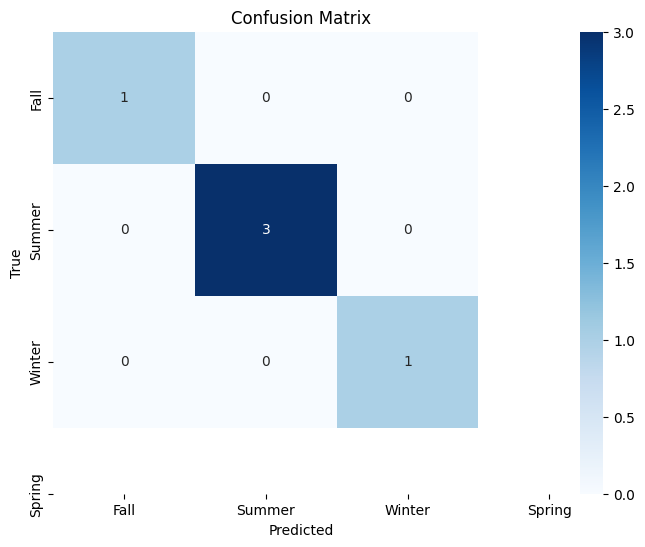

Accuracy: 1.0


In [ ]:

from sklearn import metrics

# Initialize the ResNet model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a new model with GlobalMaxPooling2D
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D()
])

def extract_features(path, model):
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

# Specify the path to your image directory
path_images = '/content/drive/MyDrive/DST/khkh_projects/dataset_DST_Project/images2'

filenames = []
for file in os.listdir(path_images):
    filenames.append(os.path.join(path_images, file))

feature_list = []

# Process images and extract features
for file in tqdm(filenames):
    feature_list.append(extract_features(file, model))

# Randomly select a test image from your dataset
test_image_path = random.choice(filenames)

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image_array = image.img_to_array(test_image)
expanded_test_image_array = np.expand_dims(test_image_array, axis=0)
preprocessed_test_image = preprocess_input(expanded_test_image_array)

# Extract features from the test image
test_result = model.predict(preprocessed_test_image).flatten()
normalized_test_result = test_result / norm(test_result)

# Fit the Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

# Find the nearest neighbors of the test image
distances, indices = neighbors.kneighbors([normalized_test_result])

# Create a dictionary to map image filenames to their corresponding season or category
filename_to_season = {}

# Load the styles.csv file into a DataFrame

styles_df = df.dropna(subset=['baseColour','season','usage','productDisplayName'])
for index, row in styles_df.iterrows():
    filename = str(row['id']) + '.jpg'
    season_or_category = row['season']  # Change this to the appropriate column name in your CSV
    filename_to_season[filename] = season_or_category

# Extract true labels from filenames of nearest neighbors
true_labels = [filename_to_season[os.path.basename(filenames[i])] for i in indices[0]]

# Predicted labels (seasons or categories) based on KNN
predicted_labels = [filename_to_season[os.path.basename(filenames[i])] for i in indices[0]]

# Calculate evaluation metrics (e.g., accuracy)
accuracy = metrics.accuracy_score(true_labels, predicted_labels)

# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=styles_df['season'].unique(), yticklabels=styles_df['season'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
